In [1]:
import pandas as pd
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

C:\Users\choij\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\choij\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\choij\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
base_dir = os.getcwd()
zip_file_path = os.path.join(base_dir, '--')

extracted_dir = os.path.join(base_dir, 'extracted_files')

In [3]:
first_path = os.path.join(extracted_dir, 'EMR/001/433')
csv_list = os.listdir(os.path.join(extracted_dir, 'EMR/001/433'))

In [4]:
print(len(csv_list))   #### 25개의 csv 테이블
print(csv_list[:2])

25
['ADMISSIONS.csv', 'CHARTEVENTS.csv']


In [5]:
dataframes = {}  ## 커다란 데이터 프레임 안에 모든 csv 파일 할당
for file in csv_list:
    var_name = os.path.splitext(file)[0]
    file_path = os.path.join(first_path, file)
    dataframes[var_name] = pd.read_csv(file_path)

    print(f"{var_name} 데이터프레임이 생성되었습니다.")

ADMISSIONS 데이터프레임이 생성되었습니다.
CHARTEVENTS 데이터프레임이 생성되었습니다.
DATETIMEEVENTS 데이터프레임이 생성되었습니다.
DIAGNOSES_ICD 데이터프레임이 생성되었습니다.
D_ITEMS 데이터프레임이 생성되었습니다.
D_LABITEMS 데이터프레임이 생성되었습니다.
D_TESTITEMS 데이터프레임이 생성되었습니다.
EDSTAY 데이터프레임이 생성되었습니다.
EMAR 데이터프레임이 생성되었습니다.
EMAR_DETAIL 데이터프레임이 생성되었습니다.
HOSPITAL 데이터프레임이 생성되었습니다.
ICUSTAYS 데이터프레임이 생성되었습니다.
INPUTEVENTS 데이터프레임이 생성되었습니다.
LABEVENTS 데이터프레임이 생성되었습니다.
MEDRECON 데이터프레임이 생성되었습니다.
MICROBIOLOGYEVENTS 데이터프레임이 생성되었습니다.
OUTPUTEVENTS 데이터프레임이 생성되었습니다.
PATIENTS 데이터프레임이 생성되었습니다.
PRESCRIPTIONS 데이터프레임이 생성되었습니다.
PROCEDUREEVENTS 데이터프레임이 생성되었습니다.
PROCEDURES_ICD 데이터프레임이 생성되었습니다.
SERVICES 데이터프레임이 생성되었습니다.
TESTEVENTS 데이터프레임이 생성되었습니다.
TRANSFERS 데이터프레임이 생성되었습니다.
TRIAGE 데이터프레임이 생성되었습니다.


In [6]:
yes = 0
no = 0
for var_name, df in dataframes.items():
    if 'VALUENUM' in df.columns:
        yes += 1
        print(var_name)
    else:
        no += 1
print(f'LABEL col 존재 : {yes} csv 파일')
print(f'LABEL col 존재하지 않음 : {no} 개의 csv 파일')  

CHARTEVENTS
LABEVENTS
LABEL col 존재 : 2 csv 파일
LABEL col 존재하지 않음 : 23 개의 csv 파일


In [7]:
# first_path = os.path.join(extracted_dir, 'EMR/001/433')
# csv_list = os.listdir(os.path.join(extracted_dir, 'EMR/001/433'))

# dataframes = {}  ## 커다란 데이터 프레임 안에 모든 csv 파일 할당
# for file in csv_list:
#     var_name = os.path.splitext(file)[0]
#     file_path = os.path.join(first_path, file)
#     dataframes[var_name] = pd.read_csv(file_path)

# col = ['ITEMID', 'VALUE', 'STAY_ID', 'CHARTTIME', 'SUBJECT_ID']

# x1 = dataframes['CHARTEVENTS'][col]  


# x2 = dataframes['EMAR']  
# x2['VALUE'] = x2['MEDICATION']
# x2['VALUE'] = 1 ## binary 를 나타내는 1
# x2 = x2[col]  ## 이 부분 value를 그냥 자연어로 두는 것이 좋을 듯


# x3 = dataframes['INPUTEVENTS']  
# x3['STAY_ID'] = x3['ICUSTAY_ID']  ## 다른 테이블간의 통일성위해 컬럼명 변경
# x3['CHARTTIME'] = x3['STARTTIME'] 
# x3['VALUE'] = x3['AMOUNT']
# x3 = x3[col]


# x4 = dataframes['MICROBIOLOGYEVENTS']
# x4['ITEMID'] = x4['AB_ITEMID']
# x4['VALUE'] = x4['QUANTITY']
# x4 = x4[col]


# x5 = dataframes['OUTPUTEVENTS']
# x5['STAY_ID'] = x5['ICUSTAY_ID']
# x5 = x5[col]

# x6 = dataframes['PRESCRIPTIONS']
# x6['CHARTTIME'] = x6['STARTTIME']
# x6['VALUE'] = x6['DOSE_VAL_RX']
# x6 = x6[col]

# x7 = dataframes['LABEVENTS']
# x7['VALUE'] = x7['VALUENUM']
# x7 = dataframes['LABEVENTS'][col]

# x8 = dataframes['MICROBIOLOGYEVENTS']
# x8['ITEMID'] = dataframes['MICROBIOLOGYEVENTS']['TEST_ITEMID'] # test item id
# x8 = x8[col]

# df = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8], ignore_index = True)
# # print(len(df))
# # df.head()  

In [8]:
# df

## Item ID, Value, Stay ICU ID, Chart time 있는 테이블들 가져옴
#### --> 이러한 col 있다면 환자가 어떠한, 언제 진료를 받고 처방받았는지에 대한 정확한 측정 가능하기 때문
### Subject ID 가져오는 이유는 환자의 개인정보 추가로 병합위해
### EMAR 테이블의 Value 값은 binary 를 나타내는 1로 저장
### Micro Biology Table 에서는 Item ID 를 사용하는 것이 아니라 Test item ID 사용

In [9]:
# ## lactate 있는지 확인하는 셀
# x1 = dataframes['D_LABITEMS']
# code = x1[x1['LABEL'].str.contains('LACTATE', case = False)]['ITEMID']
# df[df['ITEMID'] == '001L3442']['VALUE'].unique()

In [10]:
col = ['ITEMID', 'VALUE', 'STAY_ID', 'CHARTTIME', 'SUBJECT_ID']

x1 = dataframes['CHARTEVENTS'][col]  


x2 = dataframes['EMAR']
x2['VALUE'] = x2['MEDICATION']
x2['VALUE'] = 1 ## binary 를 나타내는 1
x2 = x2[col]


x3 = dataframes['INPUTEVENTS']  
x3['STAY_ID'] = x3['ICUSTAY_ID']  ## 다른 테이블간의 통일성위해 컬럼명 변경
x3['CHARTTIME'] = x3['STARTTIME'] 
x3['VALUE'] = x3['AMOUNT']
x3 = x3[col]


x4 = dataframes['MICROBIOLOGYEVENTS']
x4['ITEMID'] = x4['AB_ITEMID']
x4['VALUE'] = x4['QUANTITY']
x4 = x4[col]


x5 = dataframes['OUTPUTEVENTS']
x5['STAY_ID'] = x5['ICUSTAY_ID']
x5 = x5[col]

x6 = dataframes['PRESCRIPTIONS']
x6['CHARTTIME'] = x6['STARTTIME']
x6['VALUE'] = x6['DOSE_VAL_RX']
x6 = x6[col]

x7 = dataframes['LABEVENTS']
x7['VALUE'] = x7['VALUENUM']
x7 = x7[col]

x8 = dataframes['MICROBIOLOGYEVENTS']
x8['ITEMID'] = dataframes['MICROBIOLOGYEVENTS']['TEST_ITEMID'] # test item id
x8 = x8[col]


In [11]:
df = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8], ignore_index = True)
print(len(df))
df.head()   ## 끝

5854019


,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID
0,001C_1775_21185,양호함,164328.0,2411-05-19T00:00:00,10900038639
1,001C_1775_21185,양호함,164328.0,2411-05-19T08:00:00,10900038639
2,001C_1961_20350,음성,164328.0,2411-05-19T00:00:00,10900038639
3,001C_1961_26610,음성,164328.0,2411-05-19T00:00:00,10900038639
4,001C_1961_20370,평가가능,164328.0,2411-05-19T00:00:00,10900038639


### Stay ID : 병실에 대한 고유 ID
### ICU stays table 에서는 ICU 환자에 대한 것만 담고 있으니 해당 Stay ID로만 활용

In [12]:
dataframes['ICUSTAYS'].head()

,SUBJECT_ID,HADM_ID,STAY_ID,FIRST_CAREUNIT,LAST_CAREUNIT,INTIME,OUTTIME,LOS,OP_FLAG
0,10900031317,00110900031317267A8C84B3E742A9,165710.0,EICU,115,2575-05-22T20:06:00,2575-05-29T17:38:00,6.90,0
1,10900015661,0011090001566186F03EA1584D6B6E,165817.0,CCU,NaN,2026-10-07T13:01:00,2026-10-07T14:05:00,0.04,0
2,10900017698,00110900017698691BCD9944D3636F,165496.0,RICU,074,2744-04-04T14:20:00,2744-04-15T21:00:00,11.28,0
3,10900026180,00110900026180490AB95D2DE67366,166269.0,SICU2,052,2138-09-20T17:48:00,2138-09-21T15:20:00,0.90,0
4,10900010079,00110900010079E998FDF7FBB3E952,165531.0,EICU,NaN,2638-05-04T08:55:00,2638-05-26T16:05:00,22.30,0


In [13]:
icu = dataframes['ICUSTAYS']['STAY_ID']
df = df[df['STAY_ID'].isin(icu)]
print(len(df))
df.head(10)

4579772


,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID
0,001C_1775_21185,양호함,164328.0,2411-05-19T00:00:00,10900038639
1,001C_1775_21185,양호함,164328.0,2411-05-19T08:00:00,10900038639
2,001C_1961_20350,음성,164328.0,2411-05-19T00:00:00,10900038639
3,001C_1961_26610,음성,164328.0,2411-05-19T00:00:00,10900038639
4,001C_1961_20370,평가가능,164328.0,2411-05-19T00:00:00,10900038639
5,001C_1961_20350,음성,164328.0,2411-05-19T04:00:00,10900038639
6,001C_1961_26610,음성,164328.0,2411-05-19T04:00:00,10900038639
7,001C_1961_20370,평가가능,164328.0,2411-05-19T04:00:00,10900038639
8,001C_1014_27095,98,164328.0,2411-05-19T00:00:00,10900038639
9,001C_1014_27095,114,164328.0,2411-05-19T01:00:00,10900038639


### Admission 30분 이후 데이터 사용 위한 Admission 시간 병합

In [14]:
icu = dataframes['ICUSTAYS'][['STAY_ID', 'INTIME']]
df = pd.merge(df, icu, on = 'STAY_ID')
df

,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME
0,001C_1775_21185,양호함,164328.0,2411-05-19T00:00:00,10900038639,2411-05-18T10:51:00
1,001C_1775_21185,양호함,164328.0,2411-05-19T08:00:00,10900038639,2411-05-18T10:51:00
2,001C_1961_20350,음성,164328.0,2411-05-19T00:00:00,10900038639,2411-05-18T10:51:00
3,001C_1961_26610,음성,164328.0,2411-05-19T00:00:00,10900038639,2411-05-18T10:51:00
4,001C_1961_20370,평가가능,164328.0,2411-05-19T00:00:00,10900038639,2411-05-18T10:51:00
...,...,...,...,...,...,...
4579767,001880644913271350132,1.0,166465.0,2289-08-22T00:00:00,10900083970,2289-08-22T13:35:00
4579768,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,10900083970,2289-08-22T13:35:00
4579769,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,10900083970,2289-08-22T13:35:00
4579770,001880100768053850130,100.0,166465.0,2289-08-22T00:00:00,10900083970,2289-08-22T13:35:00


## 환자들 몸무게 넣기

In [15]:
weight = dataframes['INPUTEVENTS'][['ICUSTAY_ID', 'PATIENTWEIGHT']]
weight['STAY_ID'] = weight['ICUSTAY_ID']
weight = weight.drop('ICUSTAY_ID', axis = 1)
weight = weight.drop_duplicates(['STAY_ID'])
weight

,PATIENTWEIGHT,STAY_ID
0,59.8,NaN
68,59.4,164182.0
146,59.2,163526.0
351,70.3,165129.0
418,65.8,165120.0
...,...,...
107562,56.3,166550.0
107609,61.2,166602.0
107649,67.1,166586.0
107670,67.5,166598.0


In [16]:
df = pd.merge(df, weight, on = 'STAY_ID', how = 'outer')
df

,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT
0,001C_1775_21185,양호함,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
1,001C_1775_21185,양호함,164328.0,2411-05-19T08:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
2,001C_1961_20350,음성,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
3,001C_1961_26610,음성,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
4,001C_1961_20370,평가가능,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
...,...,...,...,...,...,...,...
4579768,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579769,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579770,001880100768053850130,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579771,001880100768068250130,50.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN


## Definition table 정의
### D _ Items table: Item ID, Label, Abbreviation 가져옴, 편의성 위해 Label, Abbreviation은 문자열로 합침
### D _ LabItems table: Item ID, Label, Fluid 가져옴. 편의성 위해 Label, Fluid 문자열로 합침
### D _ TestItem: Item ID, Label 가져옴
#### -> 문자열 병합 이유: 관련 Feature 서칭 과정에서 최대한 캐치 위해

In [17]:
ditem = dataframes['D_ITEMS']
print(len(ditem))
ditem.head()

65850


,ITEMID,LABEL,ABBREVIATION,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,LOWNORMALVALUE,HIGHNORMALVALUE
0,001C_1001_20640,EKG > EKG 분류,NaN,chartevents,NaN,NaN,Coded Text,0,0
1,001C_1001_22445,EKG > 각차단 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0
2,001C_1001_23435,EKG > 기타 부정맥 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0
3,001C_1001_23705,EKG > 동성 부정맥 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0
4,001C_1001_23900,EKG > 방실 접합부 부정맥 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0


In [18]:
ditem['LABEL'] = ditem[['LABEL', 'ABBREVIATION']].apply(lambda x: ' |||| '.join(x.dropna()), axis=1)
print(len(ditem))
ditem.head()

65850


,ITEMID,LABEL,ABBREVIATION,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,LOWNORMALVALUE,HIGHNORMALVALUE
0,001C_1001_20640,EKG > EKG 분류,NaN,chartevents,NaN,NaN,Coded Text,0,0
1,001C_1001_22445,EKG > 각차단 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0
2,001C_1001_23435,EKG > 기타 부정맥 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0
3,001C_1001_23705,EKG > 동성 부정맥 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0
4,001C_1001_23900,EKG > 방실 접합부 부정맥 종류,NaN,chartevents,NaN,NaN,Coded Text,0,0


In [19]:
labitem = dataframes['D_LABITEMS']
print(len(labitem))
labitem.head()

4183


,ITEMID,LABEL,FLUID,CATEGORY,EDI_CODE
0,001L2232,Factor assay (VII),Citrate BLD(B),진단검사의학과및 기타 검체검사 > 혈액응고,D113103D
1,001L2250,(검사중단)Protein S,Citrate BLD,진단검사의학과및 기타 검체검사 > 혈액응고,D1151002
2,001L2694,"(검사중단)MPD panel, FISH",Heparin BM,진단검사의학과및 기타 검체검사 > FISH검사,"C584104B,C584104D,C584112B,C584112D,C584114B,C..."
3,001L4065,"Infection control test, dental unit water culture",Dental water,진단검사의학과및 기타 검체검사 > 일반미생물,KMM90000
4,001L2619,"Williams, FISH",Heparin PB,진단검사의학과및 기타 검체검사 > FISH검사,C5841


In [20]:
labitem = dataframes['D_LABITEMS']
labitem['LABEL'] = labitem[['LABEL', 'FLUID']].apply(lambda x: ' |||| '.join(x.dropna()), axis=1)
print(len(labitem))
labitem.head()

4183


,ITEMID,LABEL,FLUID,CATEGORY,EDI_CODE
0,001L2232,Factor assay (VII) |||| Citrate BLD(B),Citrate BLD(B),진단검사의학과및 기타 검체검사 > 혈액응고,D113103D
1,001L2250,(검사중단)Protein S |||| Citrate BLD,Citrate BLD,진단검사의학과및 기타 검체검사 > 혈액응고,D1151002
2,001L2694,"(검사중단)MPD panel, FISH |||| Heparin BM",Heparin BM,진단검사의학과및 기타 검체검사 > FISH검사,"C584104B,C584104D,C584112B,C584112D,C584114B,C..."
3,001L4065,"Infection control test, dental unit water cult...",Dental water,진단검사의학과및 기타 검체검사 > 일반미생물,KMM90000
4,001L2619,"Williams, FISH |||| Heparin PB",Heparin PB,진단검사의학과및 기타 검체검사 > FISH검사,C5841


In [21]:
testitem = dataframes['D_TESTITEMS']
print(len(testitem))
testitem.head()

7934


,ITEMID,LABEL,CATEGORY,EDI_CODE
0,001RC3042,"Chest HRCT (local, nodule densitometry)",영상의학과 > CT > Chest,KMM90000
1,001RG8061,Read Outside Film (단순촬영3매이내),영상의학과 > 일반촬영 > Others,KMM90000
2,001RG8062,Read Outside Film (단순촬영4-10매),영상의학과 > 일반촬영 > Others,KMM90000
3,001RG8063,Read Outside Film (단순촬영11매이상),영상의학과 > 일반촬영 > Others,KMM90000
4,001RG807,Portable (일반),영상의학과 > 일반촬영 > Others,KMM90000


 ### Code book 완성

In [22]:
df

,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT
0,001C_1775_21185,양호함,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
1,001C_1775_21185,양호함,164328.0,2411-05-19T08:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
2,001C_1961_20350,음성,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
3,001C_1961_26610,음성,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
4,001C_1961_20370,평가가능,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
...,...,...,...,...,...,...,...
4579768,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579769,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579770,001880100768053850130,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579771,001880100768068250130,50.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN


In [23]:
item1 = ditem[['ITEMID', 'LABEL']]
item2 = labitem[['ITEMID', 'LABEL']]
item3 = testitem[['ITEMID', 'LABEL']]


base_df = pd.concat([item1, item2, item3], ignore_index = True)
base_df      ## 최종 code book

,ITEMID,LABEL
0,001C_1001_20640,EKG > EKG 분류
1,001C_1001_22445,EKG > 각차단 종류
2,001C_1001_23435,EKG > 기타 부정맥 종류
3,001C_1001_23705,EKG > 동성 부정맥 종류
4,001C_1001_23900,EKG > 방실 접합부 부정맥 종류
...,...,...
77962,001RG5088,Whole Spine AP(supine) (PED 5+yrs)
77963,001RC100360,CT Angio + 3D Valve (EKG gated) (contrast)
77964,001RM61668,MRI Research - LHY (measure-HF)
77965,001RU5021,"SONO Liver, GB, Pancreas,spleen & Female GU (P..."


In [24]:
# base_df[base_df['LABEL'].str.contains('젖산', case = False)]  

In [25]:
# item_book_path = './Desktop/circ_fail_item.csv'
# ref_df = pd.read_csv(item_book_path)
# ref_df

In [26]:
# new_ref_df = ref_df[['variable(BERN)', 'variable(ENG)']]
# new_ref_df

In [27]:
new_df = pd.DataFrame(columns = ['ITEMID', 'LABEL'])

In [28]:
base_df[base_df['LABEL'].str.contains('lactate', case = False)] 

,ITEMID,LABEL
67726,001L3442,Lactate(검사24시간가능) |||| NaF


In [29]:
# for var in ref_df['variable(ENG)']:
#     var = ['HR' ,'heart rate']
#     var = '|'.join(var)
#     new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)] #case : 
#     new_df = new_df.append(new_var)
#     print(new_var)
#     break

### 알맞은 Feature 및 코드 찾기
#### 1. 기본적으로 대소문자 구분 없이 찾음 (case  = False)
#### 너무 흔한 철자 및 약자라면 대문자 구분 (e.g., HR, BE)

#### 2. supplementary table 에서 괄호가 있는 경우 없앤 상태로 추가로 서칭 (e.g., Carboxyhemoglobin (blood gas) )
#### 3. 특수문자가 있을 경우 이를 제외하고도 추가로 서칭 (e.g., a_HCO3-)
#### 4. 관련 Feature 많을 경우 일일이 구분하기 힘듦. 확인 결과 자연어로 이루어진 많은 값들이 환자들에게는 해당 되지 않는 경우가 많았음. 따라서 이를 일단 병합한 후, 나중에 숫자 값, 범위안에 없다면 한번에 없애는 것이 편리해보임
#### e.g., HR > 심박동수HR(회/분)HR(회/분) ,  부정맥 있음 > 부정맥 > 심박동수HR(회/분)HR(회/분)
#### Q: [POCT, 에볼라용]Lymphocyte 이런 수식어
#### Q: Others 는 어떻게 처리? 
#### Q: Troponin 을 찾았는데, Troponin T(검사24시간가능) + Serum 일 경우 포함 x?  ++ creatine , urea

In [30]:
new_df = pd.DataFrame(columns = ['ITEMID', 'LABEL'])
var = 'HR'
new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var ## 관련 Label 이 많은데 

,ITEMID,LABEL
28,001C_1021_25105,HR > 심박동수 |||| HR(회/분)
710,001C_1655_80245,HR > HR
2049,001D_18_25105,가슴이 뛴다고 호소함 > 심계항진 > 심박동수 |||| HR(회/분)
5193,001D_709_25105,부정맥 있음 > 부정맥 > 심박동수 |||| HR(회/분)
7005,001D_1066_25105,수혈 중 심계항진 있음 > 심계항진 > 심박동수 |||| HR(회/분)
...,...,...
74880,001R3008B0,PCD Tube Change SUBPHRENIC
76053,001RM61606,MRI Research -KJS-CCNC(HR)
76478,001RM61707,MRI Research - HR DCE_CEST
77075,001RM615014,MRI Research - HR DCE_CEST


In [31]:
new_var[:50]

,ITEMID,LABEL
28,001C_1021_25105,HR > 심박동수 |||| HR(회/분)
710,001C_1655_80245,HR > HR
2049,001D_18_25105,가슴이 뛴다고 호소함 > 심계항진 > 심박동수 |||| HR(회/분)
5193,001D_709_25105,부정맥 있음 > 부정맥 > 심박동수 |||| HR(회/분)
7005,001D_1066_25105,수혈 중 심계항진 있음 > 심계항진 > 심박동수 |||| HR(회/분)
7071,001D_1075_25105,수혈 후 심계항진 있음 > 심계항진 > 심박동수 |||| HR(회/분)
9311,001D_1580_25105,저혈당으로 인해 맥박수 증가함 > 맥박 > 심박동수 |||| HR(회/분)
9334,001D_1587_25105,저혈당으로 인해 심계항진 있음 > 심계항진 > 심박동수 |||| HR(회/분)
12333,001D_2221_25105,atrial fibrillation 있음 > 부정맥 > 심박동수 |||| HR(회/분)
12344,001D_2223_25105,atrial fibrillation with rapid ventricular res...


In [32]:
target_row = new_var.loc[:50914]
target_row = target_row.drop([12333, 12344], axis=0)
target_row['LABEL'] = var
new_df = new_df.append(target_row)

# 결과 출력
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
7071,001D_1075_25105,HR
9311,001D_1580_25105,HR
9334,001D_1587_25105,HR
12355,001D_2225_25105,HR
12790,001D_2337_25105,HR


In [33]:
var = 'heart rate'
new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var   ## fetal heart rate : 태아 심장 박동수  --> 사용x

,ITEMID,LABEL
15587,001D_2875_11585,fetal heart rate 감소함 > 심박동수
15588,001D_2875_22940,fetal heart rate 감소함 > 심박동수 > 개인
15589,001D_2875_26320,fetal heart rate 감소함 > 심박동수 > 증감
15590,001D_2875_26805,fetal heart rate 감소함 > 심박동수 > 태아심박동수 |||| FHT(...
15591,001D_2875_34125,fetal heart rate 감소함 > 심박동수 > 증감 > 감소함
15592,001D_2875_38390,fetal heart rate 감소함 > 심박동수 > 개인 > 태아
15593,001D_2876_11585,fetal heart rate 증가함 > 심박동수
15594,001D_2876_22940,fetal heart rate 증가함 > 심박동수 > 개인
15595,001D_2876_26320,fetal heart rate 증가함 > 심박동수 > 증감
15596,001D_2876_26805,fetal heart rate 증가함 > 심박동수 > 태아심박동수 |||| FHT(...


In [34]:
var = 'ABPs'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [35]:
var = 'ABP systolic'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [36]:
var = 'ABPd'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [37]:
var = 'ABP diastolic'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [38]:
var = 'ABPm'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [39]:
var = 'ABP mean'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [40]:
var = 'CO'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL
215,001C_1250_20665,ETCO2 > ETCO2 |||| mmHg
216,001C_1251_21400,PcCO2 > PcCO2
432,001C_1452_80700,inCO2 > inCO2
630,001C_1594_20330,Bath HCO3 > Bath HCO3
1285,001C_2042_80180,EtCO2 > EtCO2
...,...,...
77076,001RA60211,Transarterial Radioembolization (COIL 1)
77077,001RA60212,Transarterial Radioembolization (COIL 2)
77078,001RA60213,Transarterial Radioembolization (COIL 3)
77367,00118403,FLUOROSCOPY C


In [41]:
new_var[:50]

,ITEMID,LABEL
215,001C_1250_20665,ETCO2 > ETCO2 |||| mmHg
216,001C_1251_21400,PcCO2 > PcCO2
432,001C_1452_80700,inCO2 > inCO2
630,001C_1594_20330,Bath HCO3 > Bath HCO3
1285,001C_2042_80180,EtCO2 > EtCO2
1406,001C_2150_80080,CO > CO
1769,001C_20218_100476,DCO2 > DCO2
1802,001C_20196_100367,PtCO2 > PtCO2
1812,001C_20217_100476,DCO2 > DCO2
14018,001D_2548_10125,CO2 narcosis 없음 > 가스교환


In [42]:
new_var[50:100]

,ITEMID,LABEL
51156,001D_20315_22685,ETCO2 monitor 시작함 > 모니터링함 > 간호활동 : 시작
51157,001D_20315_36330,ETCO2 monitor 시작함 > 모니터링함 > 간호활동 : 시작 > 시작함
51312,001D_106630,ETCO2 monitoring
51636,001D_110368,ETCO2 monitoring line 교환
52439,001P_H4212,COTREL견인술
52658,001P_OPFN091271,ARTHROSCOPY
55426,001P_OPFZ050309,supracondylar osteotomy(SCO)
60603,001P_OPFE070505,COMMANDO operation
61352,001P_OPFI081007,RECTOSCOPY + 내시경 세척·소독료
62011,001P_OPFL100405,Pelviscopic cauterization of Ovarian Follicle ...


In [43]:
target_row = new_var.loc[1406]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
7071,001D_1075_25105,HR
9311,001D_1580_25105,HR
9334,001D_1587_25105,HR
12355,001D_2225_25105,HR
12790,001D_2337_25105,HR


In [44]:
var = 'SpO2'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
10,001C_1003_24480,SpO2 > 산소포화도 |||| %
1259,001C_2017_80640,SpO2 > SpO2
1740,001C_20109_23745,PR(SpO2연동) > 맥박수 |||| PR(회/분)
1805,001C_20210_24480,SpO2 II > 산소포화도 |||| %
11712,001D_2098_10125,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11714,001D_2098_24480,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11715,001D_2098_26320,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11716,001D_2098_34125,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11717,001D_2099_10125,manual resuscitator(ambu 등) bagging 해도 SpO2 변화...
11718,001D_2099_23125,manual resuscitator(ambu 등) bagging 해도 SpO2 변화...


In [45]:
target_row = new_var
target_row = target_row.drop([1740], axis = 0)
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
32307,001D_6586_10125,SpO2
32700,001D_6586_22900,SpO2
32701,001D_6586_24520,SpO2
32702,001D_6586_38770,SpO2


In [46]:
var = 'RASS'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [47]:
var = 'Spitzendruck'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [48]:
var = 'Ventilator peak pressure'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [49]:
var = 'a_Lac'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [50]:
var = 'Lactate (blood gas)'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [51]:
var = 'Lactate'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
67726,001L3442,Lactate(검사24시간가능) |||| NaF


In [52]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
32700,001D_6586_22900,SpO2
32701,001D_6586_24520,SpO2
32702,001D_6586_38770,SpO2
51325,001D_106760,SpO2


In [53]:
var = 'v-Lac'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [54]:
var = 'vLac'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [55]:
var = 'venous lactate'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [56]:
var = 'INR'

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL
777,001C_1706_21350,PT INR (em) > PT INR (em)
1320,001C_2078_21345,PT INR > PT INR
17210,001D_3173_10305,INR 수치 : > 검사결과
17211,001D_3173_24520,INR 수치 : > 검사결과 > 상세내용 |||| 상세내용
36786,001D_7609_10305,INR 검사결과 확인함 > 검사결과
36787,001D_7609_22900,INR 검사결과 확인함 > 검사결과 > 간호활동 : 확인
36788,001D_7609_23045,INR 검사결과 확인함 > 검사결과 > 검사종류
36789,001D_7609_24520,INR 검사결과 확인함 > 검사결과 > 상세내용 |||| 상세내용
36790,001D_7609_38675,INR 검사결과 확인함 > 검사결과 > 검사종류 > 혈액
36791,001D_7609_38770,INR 검사결과 확인함 > 검사결과 > 간호활동 : 확인 > 확인함


In [57]:
target_row = new_var.iloc[:-4]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
36787,001D_7609_22900,INR
36788,001D_7609_23045,INR
36789,001D_7609_24520,INR
36790,001D_7609_38675,INR


In [58]:
var = 'glucose'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
977,001C_1843_22335,urine glucose > urine glucose
6720,001D_1002_11310,소변에서 glucose 검출되지 않음 > 소변
6721,001D_1002_23105,소변에서 glucose 검출되지 않음 > 소변 > 결과판독 |||| 결과
6722,001D_1002_37120,소변에서 glucose 검출되지 않음 > 소변 > 결과판독 > 음성
6723,001D_1003_11310,소변에서 glucose 검출됨 > 소변
6724,001D_1003_22990,소변에서 glucose 검출됨 > 소변 > 검사결과정도 |||| 정도
6725,001D_1003_23105,소변에서 glucose 검출됨 > 소변 > 결과판독 |||| 결과
6726,001D_1003_36640,소변에서 glucose 검출됨 > 소변 > 결과판독 > 양성
46853,001D_10065_10790,Continuous Glucose Monitoring System 시작함 > 모니터링장치
46854,001D_10065_22685,Continuous Glucose Monitoring System 시작함 > 모니터...


In [59]:
target_row = new_var.loc[:46862]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
46857,001D_10066_23125,glucose
46858,001D_10066_37085,glucose
46859,001D_10067_10790,glucose
46860,001D_10067_22775,glucose


In [60]:
var = 'Blood Glucose'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [61]:
var = 'C-reactive protein'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
35405,001D_7290_10305,C-reactive protein 검사결과 확인함 > 검사결과
35406,001D_7290_22900,C-reactive protein 검사결과 확인함 > 검사결과 > 간호활동 : 확인
35407,001D_7290_23045,C-reactive protein 검사결과 확인함 > 검사결과 > 검사종류
35408,001D_7290_24520,C-reactive protein 검사결과 확인함 > 검사결과 > 상세내용 ||||...
35409,001D_7290_38675,C-reactive protein 검사결과 확인함 > 검사결과 > 검사종류 > 혈액
35410,001D_7290_38770,C-reactive protein 검사결과 확인함 > 검사결과 > 간호활동 : 확인...
44391,001D_9549_10305,C-reactive protein 수치 증가함 > 검사결과
44392,001D_9549_23045,C-reactive protein 수치 증가함 > 검사결과 > 검사종류
44393,001D_9549_24520,C-reactive protein 수치 증가함 > 검사결과 > 상세내용 |||| 상세내용
44394,001D_9549_26320,C-reactive protein 수치 증가함 > 검사결과 > 증감


In [62]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
50558,001D_10832_10305,C-reactive protein
50559,001D_10832_23045,C-reactive protein
50560,001D_10832_26160,C-reactive protein
50561,001D_10832_34565,C-reactive protein


In [63]:
var = 'dobutamine' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
40249,001D_8470_12710,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함
40250,001D_8470_22110,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함 > mix내역 |||...
40251,001D_8470_22880,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함 > 간호활동 : 투여
40252,001D_8470_25165,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함 > 약물주입속도 ||...
40253,001D_8470_25300,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함 > 오더형태종류 ||...
40254,001D_8470_25580,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함 > 의사명 |||| 의사명
40255,001D_8470_38440,처방에 의해 Dobutamine을 지속적으로 투여함 > 투여함 > 간호활동 : 투여...


In [64]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
40251,001D_8470_22880,dobutamine
40252,001D_8470_25165,dobutamine
40253,001D_8470_25300,dobutamine
40254,001D_8470_25580,dobutamine


In [65]:
var = 'milrinone' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [66]:
var = 'levosimendan' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [67]:
var = 'theophyllin' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
67040,001L3454,Theophylline TDM Panel(농도+자문) |||| TDM(Serum)
67109,001L344611,Theophylline - TDM |||| Serum
68002,001L71039,Theophylline |||| Serum씨젠
68902,001L3411,[검사중단]Theophylline (serum level) |||| Serum


In [68]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
40255,001D_8470_38440,dobutamine
67040,001L3454,theophyllin
67109,001L344611,theophyllin
68002,001L71039,theophyllin


In [69]:
var = 'Non-opioide' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [70]:
var = 'Other pain killers' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [71]:
var = 'RelDatetime' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [72]:
var = 'time since admission' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [73]:
var = 'static_Age' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [74]:
var = 'age' 

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
266,001C_1287_20230,NIHSS > 9. Best Language
581,001C_1546_21875,Air Leakage Rt3 > air leakage 정도 |||| 정도
793,001O_1722_21420,PTBD3 > Percutaneous Transhepatic Biliary Drai...
802,001C_1731_21875,Air Leakage Rt4 > air leakage 정도 |||| 정도
803,001C_1732_21875,Air Leakage med1 > air leakage 정도 |||| 정도
...,...,...
76443,001L999904,PET-MRI Research image matching
76495,001RM9999,PET/MRI Research image matching
76499,001RM9997,PET/MRI Research image matching
76650,001RM61679,MRI Research _ BMI (mortor imagery)


In [75]:
var = 'age' 

new_var = base_df[base_df['LABEL'].apply(lambda x: x =='age')]
new_var

,ITEMID,LABEL


In [76]:
var = 'T Central'   ## 전혀 관련 없으므로 포함 x

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
74947,001RC1005103,Ped CT Chest Central vein thrombosis (contrast)
74951,001RC30103,Ped CT Chest Central vein thrombosis (contrast)


In [77]:
var = 'NIBPs'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [78]:
var = 'NIBP systolic'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [79]:
var = 'NIBPd'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [80]:
var = 'NIBP disatolic'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [81]:
var = 'NIBPm'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [82]:
var = 'NIBP mean'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [83]:
var = 'PAPm'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [84]:
var = 'PAP mean'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [85]:
var = 'PAP mean'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [86]:
var = 'PAPs'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [87]:
var = 'PAP systolic'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [88]:
var = 'PAPd'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [89]:
var = 'PAP diastolic'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [90]:
var = 'PCWP'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
54,001C_1047_27115,PCWP > 폐모세혈관쐐기압 |||| PCWP(mmHg)
21752,001D_3965_27115,Pulmonary Capillary Wedge Pressure 감소함 > 심기능상태...
21756,001D_3966_27115,Pulmonary Capillary Wedge Pressure 증가함 > 심기능상태...
38364,001D_7963_27115,Pulmonary Capillary Wedge Pressure 측정함 > 심기능상태...


In [91]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
68902,001L3411,theophyllin
54,001C_1047_27115,PCWP
21752,001D_3965_27115,PCWP
21756,001D_3966_27115,PCWP


In [92]:
var = 'SvO2(m)'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [93]:
var = 'SvO2'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
58,001C_1051_21730,SVO2 > SvO2 |||| %
1260,001C_2018_80695,cSvO2 > cSvO2
23277,001D_4257_12350,SvO2 감소함 > 조직관류
23278,001D_4257_21730,SvO2 감소함 > 조직관류 > SvO2 |||| %
23279,001D_4257_26320,SvO2 감소함 > 조직관류 > 증감
23280,001D_4257_34125,SvO2 감소함 > 조직관류 > 증감 > 감소함
23281,001D_4258_12350,SvO2 증가함 > 조직관류
23282,001D_4258_21730,SvO2 증가함 > 조직관류 > SvO2 |||| %
23283,001D_4258_26320,SvO2 증가함 > 조직관류 > 증감
23284,001D_4258_37980,SvO2 증가함 > 조직관류 > 증감 > 증가함


In [94]:
target_row = new_var
target_row = target_row.drop([1260], axis = 0)
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
23280,001D_4257_34125,SvO2
23281,001D_4258_12350,SvO2
23282,001D_4258_21730,SvO2
23283,001D_4258_26320,SvO2


In [95]:
var = 'mixed venous oxygen saturation'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [96]:
var = 'ZVD'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [97]:
var = 'CVP'  ### 단위가 mmhg 만 저장

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
44,001C_1037_20455,Cent CVP > Cent CVP
45,001C_1038_21615,SG CVP > SG CVP
46,001C_1039_20420,CVP > CVP(mmHg) |||| mmHg
47,001C_1040_20415,CVP > CVP(cmH2O) |||| CmH2O
753,001C_1681_80090,CVP > CVP
9550,001D_1646_20415,중심정맥압 : > 체액량 > CVP(cmH2O) |||| CmH2O
9551,001D_1646_20420,중심정맥압 : > 체액량 > CVP(mmHg) |||| mmHg
9553,001D_1647_20415,중심정맥압 상승함 > 체액량 > CVP(cmH2O) |||| CmH2O
9554,001D_1647_20420,중심정맥압 상승함 > 체액량 > CVP(mmHg) |||| mmHg
9558,001D_1648_20415,중심정맥압 하강됨 > 체액량 > CVP(cmH2O) |||| CmH2O


In [98]:
target_row = new_var.iloc[:-3]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
22143,001D_4043_20420,CVP
35095,001D_7211_20415,CVP
35096,001D_7211_20420,CVP
35100,001D_7213_20420,CVP


In [99]:
var = 'ST1'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
69836,001L3787,Post 10min.iPTH(수술장용) |||| Post10분


In [100]:
var = 'ECG ST1 deviation'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [101]:
var = 'ST3'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [102]:
var = 'ECG ST3 deviation'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [103]:
var = 'Rhythmus'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [104]:
var = 'ECG rhythm'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [105]:
var = 'ETCO2'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
215,001C_1250_20665,ETCO2 > ETCO2 |||| mmHg
1285,001C_2042_80180,EtCO2 > EtCO2
35802,001D_7384_10125,ETCO2 monitor함 > 가스교환
35803,001D_7384_20665,ETCO2 monitor함 > 가스교환 > ETCO2 |||| mmHg
35804,001D_7384_22590,ETCO2 monitor함 > 가스교환 > 간호활동 : 모니터링
35805,001D_7384_35135,ETCO2 monitor함 > 가스교환 > 간호활동 : 모니터링 > 모니터링함
51155,001D_20315_10795,ETCO2 monitor 시작함 > 모니터링함
51156,001D_20315_22685,ETCO2 monitor 시작함 > 모니터링함 > 간호활동 : 시작
51157,001D_20315_36330,ETCO2 monitor 시작함 > 모니터링함 > 간호활동 : 시작 > 시작함
51312,001D_106630,ETCO2 monitoring


In [106]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
51155,001D_20315_10795,ETCO2
51156,001D_20315_22685,ETCO2
51157,001D_20315_36330,ETCO2
51312,001D_106630,ETCO2


In [107]:
var = 'RR'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL
30,001C_1023_27310,RR > 호흡수 |||| RR(회/분)
31,001C_1024_27310,RR(연동) > 호흡수 |||| RR(회/분)
32,001C_1025_27310,RR-vent > 호흡수 |||| RR(회/분)
166,001C_1200_22250,spont RR > spont RR
1338,001C_2087_22250,spont RR > spont RR
1441,001C_2200_81175,RR(/min) > RR(/min)
1731,001C_20100_100071,RR(Hz) > 호흡수(Hz) |||| RR(Hz)
2531,001D_133_27310,고혈당과 관련된 호흡곤란 있음 > 호흡곤란 > 호흡수 |||| RR(회/분)
2648,001D_166_27310,과다호흡 있음 > 과환기 > 호흡수 |||| RR(회/분)
6986,001D_1063_27310,수혈 중 호흡곤란 있음 > 호흡곤란 > 호흡수 |||| RR(회/분)


In [108]:
new_var.loc[23269]['LABEL']

'Surgical cricothyrotomy 시행 후 자발호흡 돌아옴 > 자발환기 > 호흡수 |||| RR(회/분)'

In [109]:
target_row = new_var.loc[:50918]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
34121,001D_6976_27310,RR
43723,001D_9407_27310,RR
47722,001D_10272_27310,RR
48023,001D_10380_27310,RR


In [110]:
var = 'Respiratory rate'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [111]:
var = 'supplemental oxygen'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [112]:
var = 'supplemental oxygen'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [113]:
var = 'OUTurine/h'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [114]:
var = 'OUTurine'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [115]:
var = 'OUT Urine/h'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [116]:
var = 'OUT Urine'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [117]:
var = 'OUT Urine'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [118]:
var = 'GCS Antwort'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [119]:
var = 'GCS verbal'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [120]:
var = 'GCS Motorik'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [121]:
var = 'GCS motor'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [122]:
var = 'GCS Augenöffnen'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [123]:
var = 'GCS eye'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [124]:
var = 'ICP'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
122,001C_1163_24705,EVDRt1 ICP > 수동적ICP |||| CmCSF
126,001C_1167_24705,EVDRt2 ICP > 수동적ICP |||| CmCSF
130,001C_1171_24705,EVDLt1 ICP > 수동적ICP |||| CmCSF
134,001C_1175_24705,EVDLt2 ICP > 수동적ICP |||| CmCSF
578,001C_1543_23395,장비 ICP > 기계적ICP |||| mmHg
621,001C_1587_24705,EVD1 ICP > 수동적ICP |||| CmCSF
981,001C_1848_24705,EVD2 ICP > 수동적ICP |||| CmCSF
1003,001C_1872_24705,EVD3 ICP > 수동적ICP |||| CmCSF
13039,001D_2382_10635,ICP catheter 빠져 있음 > 뇌실튜브
13040,001D_2382_24520,ICP catheter 빠져 있음 > 뇌실튜브 > 상세내용 |||| 상세내용


In [125]:
target_row = new_var.iloc[:-2]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
44882,001D_9645_23395,ICP
44883,001D_9645_35135,ICP
49883,001D_10686_24705,ICP
51320,001D_106710,ICP


In [126]:
var = 'OUT'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL
72881,001382A0,CHEST ROUTINE
74040,00118101,READ OUTSIDE (A)
74041,00118102,READ OUTSIDE (B)
74042,00118103,READ OUTSIDE (C)
74329,00170100,BRAIN ROUTINE
74663,00190606,PELVIS AP(OUTLET)


In [127]:
var = 'Balance OUT/24h'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [128]:
var = 'Balance OUT'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [129]:
var = 'Incrys'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [130]:
var = 'Crystalloid infusion/24h'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [131]:
var = 'Crystalloid infusion'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [132]:
var = 'Incolloid'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [133]:
var = 'Colloid infusion/24h'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [134]:
var = 'Colloid infusion'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [135]:
var = 'FIO2'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
101,001C_1094_20720,FIO2 > FiO2 |||| Fio2(%)
183,001C_1218_20720,FIO2 > FiO2 |||| Fio2(%)
204,001C_1239_20720,FIO2 > FiO2 |||| Fio2(%)
210,001C_1245_20720,FiO2 > FiO2 |||| Fio2(%)
441,001C_1461_20720,FiO2 > FiO2 |||| Fio2(%)
769,001C_1698_20720,FIO2 > FiO2 |||| Fio2(%)
1023,001C_1894_20720,FIO2 > FiO2 |||| Fio2(%)
12472,001D_2265_20720,Bilevel Positive Airway Pressure 적용 중임 > Venti...
19607,001D_3595_20720,산소 흡입 중임 > 산소요법 > FiO2 |||| Fio2(%)
34651,001D_7111_20720,Bilevel Positive Airway Pressure mode 변경함 > Ve...


In [136]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
39265,001D_8205_20720,FIO2
40323,001D_8484_20720,FIO2
44488,001D_9567_20720,FIO2
44748,001D_9617_20720,FIO2


In [137]:
var = 'Ventilator FiO2'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [138]:
var = 'Peep'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
184,001C_1219_21330,set PEEP > PEEP level |||| PEEP(CmH2O)
209,001C_1244_21330,PEEP > PEEP level |||| PEEP(CmH2O)
439,001C_1459_80445,PEEP > PEEP
601,001C_1567_21330,set PEEP > PEEP level |||| PEEP(CmH2O)
1446,001C_2205_81180,auto PEEP > auto PEEP
1448,001C_2207_81182,intrinsic PEEP > intrinsic PEEP
1451,001C_2210_81185,total PEEP > total PEEP
1481,001C_2424_81368,set PEEP > set PEEP
1495,001C_2439_81182,intrinsic PEEP > intrinsic PEEP
1498,001C_2442_81185,total PEEP > total PEEP


In [139]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
39250,001D_8202_21330,Peep
39266,001D_8205_21330,Peep
40313,001D_8482_21330,Peep
40325,001D_8484_21330,Peep


In [140]:
var = 'Ventilator Peep'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [141]:
var = 'Ventilator mode'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
39215,001D_8198_10110,ventilator mode 변경함 > Ventilator
39216,001D_8198_20720,ventilator mode 변경함 > Ventilator > FiO2 |||| F...
39217,001D_8198_21330,ventilator mode 변경함 > Ventilator > PEEP level ...
39218,001D_8198_22300,ventilator mode 변경함 > Ventilator > tidal volum...
39219,001D_8198_22350,ventilator mode 변경함 > Ventilator > venitlator ...
39220,001D_8198_22365,ventilator mode 변경함 > Ventilator > ventilator ...
39221,001D_8198_22370,ventilator mode 변경함 > Ventilator > ventilator ...
39222,001D_8198_22385,ventilator mode 변경함 > Ventilator > ventilator ...
39223,001D_8198_22610,ventilator mode 변경함 > Ventilator > 간호활동 : 변경
39224,001D_8198_35495,ventilator mode 변경함 > Ventilator > 간호활동 : 변경 >...


In [142]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
39230,001D_8199_22365,Ventilator mode
39231,001D_8199_22370,Ventilator mode
39232,001D_8199_22385,Ventilator mode
39233,001D_8199_22900,Ventilator mode


In [143]:
var = 'TV'  

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL
26801,001D_5070_12285,"독서, 라디오 청취, TV 시청을 격려함 > 전환요법"
26802,001D_5070_22495,"독서, 라디오 청취, TV 시청을 격려함 > 전환요법 > 간호활동 : 격려"
26803,001D_5070_34235,"독서, 라디오 청취, TV 시청을 격려함 > 전환요법 > 간호활동 : 격려 > 격려함"
45553,001D_9810_12795,CC TV monitor 통해 행동 관찰함 > 행동
45554,001D_9810_22530,CC TV monitor 통해 행동 관찰함 > 행동 > 간호활동 : 관찰
45556,001D_9810_24520,CC TV monitor 통해 행동 관찰함 > 행동 > 상세내용 |||| 상세내용
45557,001D_9810_34445,CC TV monitor 통해 행동 관찰함 > 행동 > 간호활동 : 관찰 > 관찰함
51623,001D_110090,CC-TV monitoring
52498,001P_OPFN091249,TVT tape release
54062,001P_OPFL010551,TVT/TOT tape cutting


In [144]:
var = 'tidal'    ### 과연 알맞게 한 것인가?

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
170,001C_1204_22300,set back VT > tidal volume setting |||| set ti...
175,001C_1210_22300,set VT > tidal volume setting |||| set tidal v...
205,001C_1240_22300,set VT > tidal volume setting |||| set tidal v...
248,001C_1283_27285,tidal volume > 호기량 |||| 호기량(ml)
711,001C_1656_22300,set VT > tidal volume setting |||| set tidal v...
1004,001C_1874_22300,set back VT > tidal volume setting |||| set ti...
1813,001C_20219_22300,set HFO VT > tidal volume setting |||| set tid...
1815,001C_20221_22300,set HFO VT > tidal volume setting |||| set tid...
23544,001D_4322_10110,tidal volume 안 걸림 > Ventilator
23545,001D_4322_26195,tidal volume 안 걸림 > Ventilator > 정상상태


In [145]:
var = 'TV'
target_row = new_var.iloc[:-2]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
44976,001D_9666_12920,TV
44977,001D_9666_22860,TV
44978,001D_9666_27285,TV
44979,001D_9666_27515,TV


In [146]:
var = 'Ventilator tidal volume'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL


In [147]:
var = 'Plateaudruck'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [148]:
var = 'Ventilator plateau pressure'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [149]:
var = 'AWPmean'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [150]:
var = 'Ventilator mean airway pressure'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [151]:
var = 'RR set'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [152]:
var = 'Ventilator RR set'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [153]:
var = 'AiwayCode'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [154]:
var = 'Ventilator AirwayCode'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [155]:
var = 'Haemofiltration'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [156]:
var = 'CVVHDF'

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
692,001C_1636_26975,CVVHDF Replacement(전희석) > 투석 replacement(전희석)
764,001C_1693_26980,CVVHDF Replacement(후희석) > 투석 replacement(후희석)
853,001C_1771_26940,CVVHDF balance > 투석 balance |||| balance
887,001O_1804_26960,CVVHDF-fluid removal > 투석 fluid removal
901,001C_1818_26965,CVVHDF PBP(preblood pump) > 투석 preblood pump rate
1019,001O_1890_26955,CVVHDF-effluent > 투석 effluent
1501,001C_2446_81378,CVVHDF Replacement rate > CVVHDF Replacement ...
51455,001D_108380,CVVHDF filter 교환
51456,001D_108390,CVVHDF priming
51457,001D_108400,CVVHDF sheath 삽입


In [157]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
51457,001D_108400,CVVHDF
51458,001D_108410,CVVHDF
51459,001D_108420,CVVHDF
51460,001D_108430,CVVHDF


In [158]:
var = 'Liquor/h'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [159]:
var = 'Liquor'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [160]:
var = 'Liquor drain ml/h'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [161]:
var = 'Liquor drain'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [162]:
var = 'Weight'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL
44289,001D_9525_10985,nonweight bearing crutch gait에 대해 교육함 > 보행기법
44290,001D_9525_22535,nonweight bearing crutch gait에 대해 교육함 > 보행기법 >...
44291,001D_9525_23795,nonweight bearing crutch gait에 대해 교육함 > 보행기법 >...
44292,001D_9525_33260,nonweight bearing crutch gait에 대해 교육함 > 보행기법 >...
44293,001D_9525_34465,nonweight bearing crutch gait에 대해 교육함 > 보행기법 >...
44294,001D_9526_10985,Partial weight bearing crutch gait에 대해 교육함 > 보행기법
44295,001D_9526_22535,Partial weight bearing crutch gait에 대해 교육함 > 보...
44296,001D_9526_23795,Partial weight bearing crutch gait에 대해 교육함 > 보...
44297,001D_9526_31700,Partial weight bearing crutch gait에 대해 교육함 > 보...
44298,001D_9526_34465,Partial weight bearing crutch gait에 대해 교육함 > 보...


In [163]:
var = 'a-BE'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=False, na=False)]
new_var

,ITEMID,LABEL


In [164]:
var = 'BE'    

new_var = base_df[base_df['LABEL'].str.contains(var, case=True, na=False)]
new_var

,ITEMID,LABEL
51948,001P_H1864,U-TUBE 삽관술
52045,001P_H9845,MONTGOMERY T-TUBE삽관술
65981,001L30825,BE
66085,001L301025,BE(Cord) |||| Cord-ABGA
66549,001L2359,Nonspecific esterase 염색(ANBE) |||| BM biopsy
66815,001L2353,Epstein-Barr Virus Encoded RNA (EBER) 염색 |||| ...
66997,001L00055,BE[POCT]
67142,001L25582,"가족검사, Angelman syndrome,UBE3A sequencing |||| ..."
67258,001L00058,BEecf[POCT]
68270,001L81105,[처방불가]BE


In [165]:
target_row = new_var.loc[[65981, 66997, 68270]]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
51460,001D_108430,CVVHDF
51461,001D_108440,CVVHDF
65981,001L30825,BE
66997,001L00055,BE


In [166]:
var = 'a_COHb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [167]:
var = 'COHb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
68632,001L81203,[처방불가]% COHb
68975,001L30830,% COHb
69953,001L00923,COHb |||| Heparin PB


In [168]:
target_row = new_var.iloc[:2]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
65981,001L30825,BE
66997,001L00055,BE
68270,001L81105,BE
68632,001L81203,COHb


In [169]:
var = 'Carboxyhemoglobin (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [170]:
var = 'Carboxyhemoglobin'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [171]:
var = 'a_Hb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [172]:
var = 'Hb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
689,001C_1633_20815,Hb(em) > Hb(em)
1010,001C_1880_20810,Hb > Hb
1918,001C_20193_100364,SpHb > SpHb
65874,001L3311,Hb A1c |||| EDTA BLD
65909,001L81201,[처방불가]Total Hb
...,...,...
69892,001L25445,"가족검사, Hereditary Paraganglioma-Pheochromocytom..."
69953,001L00923,COHb |||| Heparin PB
69957,001L00925,HHb |||| Heparin PB
69973,001L74875,HBs Ag Quantitation(외주) |||| SerumSML


In [173]:
var = 'Hemoglobin'
target_row = new_var.iloc[:2]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
68270,001L81105,BE
68632,001L81203,COHb
68975,001L30830,COHb
689,001C_1633_20815,Hemoglobin


In [174]:
var = 'Hemoglobin (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [175]:
var = 'Hemoglobin'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
10690,001D_1895_10305,혈중 hemoglobin 수치 정상 이하임 > 검사결과
10691,001D_1895_23005,혈중 hemoglobin 수치 정상 이하임 > 검사결과 > 검사수치(g/dl) ||...
10692,001D_1895_23045,혈중 hemoglobin 수치 정상 이하임 > 검사결과 > 검사종류
10693,001D_1895_26160,혈중 hemoglobin 수치 정상 이하임 > 검사결과 > 절대수준
10694,001D_1895_34685,혈중 hemoglobin 수치 정상 이하임 > 검사결과 > 절대수준 > 낮음
10695,001D_1895_38675,혈중 hemoglobin 수치 정상 이하임 > 검사결과 > 검사종류 > 혈액
36456,001D_7530_10305,hemoglobin 검사결과 확인함 > 검사결과
36457,001D_7530_22900,hemoglobin 검사결과 확인함 > 검사결과 > 간호활동 : 확인
36458,001D_7530_23005,hemoglobin 검사결과 확인함 > 검사결과 > 검사수치(g/dl) |||| g/dl
36459,001D_7530_23045,hemoglobin 검사결과 확인함 > 검사결과 > 검사종류


In [176]:
target_row = new_var.loc[:36462]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
36457,001D_7530_22900,Hemoglobin
36458,001D_7530_23005,Hemoglobin
36459,001D_7530_23045,Hemoglobin
36460,001D_7530_38675,Hemoglobin


In [177]:
var = 'a_HCO3-'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [178]:
var = 'a_HCO3'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [179]:
var = 'aHCO3'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [180]:
var = 'Bicarbonate (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [181]:
var = 'Bicarbonate'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
10648,001D_1888_10305,혈중 bicarbonate 수치 정상 이상임 > 검사결과
10649,001D_1888_23025,혈중 bicarbonate 수치 정상 이상임 > 검사결과 > 검사수치(mmol/L)...
10650,001D_1888_23045,혈중 bicarbonate 수치 정상 이상임 > 검사결과 > 검사종류
10651,001D_1888_26160,혈중 bicarbonate 수치 정상 이상임 > 검사결과 > 절대수준
10652,001D_1888_34725,혈중 bicarbonate 수치 정상 이상임 > 검사결과 > 절대수준 > 높음
10653,001D_1888_38675,혈중 bicarbonate 수치 정상 이상임 > 검사결과 > 검사종류 > 혈액
10654,001D_1889_10305,혈중 bicarbonate 수치 정상 이하임 > 검사결과
10655,001D_1889_23025,혈중 bicarbonate 수치 정상 이하임 > 검사결과 > 검사수치(mmol/L)...
10656,001D_1889_23045,혈중 bicarbonate 수치 정상 이하임 > 검사결과 > 검사종류
10657,001D_1889_26160,혈중 bicarbonate 수치 정상 이하임 > 검사결과 > 절대수준


In [182]:
target_row = new_var.loc[:10660]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
10655,001D_1889_23025,Bicarbonate
10656,001D_1889_23045,Bicarbonate
10657,001D_1889_26160,Bicarbonate
10658,001D_1889_34685,Bicarbonate


In [183]:
var = 'a_MetHb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [184]:
var = 'aMetHb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [185]:
var = 'MetHb'    # 추가 x

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
69865,001L00924,MetHb |||| Heparin PB


In [186]:
var = 'Met Hb (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [187]:
var = 'Met Hb'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [188]:
var = 'a_pH'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [189]:
var = 'apH'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [190]:
var = 'pH'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
1282,001C_2039_22345,urine pH > urine pH
1918,001C_20193_100364,SpHb > SpHb
3411,001D_356_10305,동맥혈 pH 수치 정상 이상임 > 검사결과
3412,001D_356_23045,동맥혈 pH 수치 정상 이상임 > 검사결과 > 검사종류
3413,001D_356_24745,동맥혈 pH 수치 정상 이상임 > 검사결과 > 수소이온농도 |||| pH
3414,001D_356_26160,동맥혈 pH 수치 정상 이상임 > 검사결과 > 절대수준
3415,001D_356_34725,동맥혈 pH 수치 정상 이상임 > 검사결과 > 절대수준 > 높음
3416,001D_356_38675,동맥혈 pH 수치 정상 이상임 > 검사결과 > 검사종류 > 혈액
3417,001D_357_10305,동맥혈 pH 수치 정상 이하임 > 검사결과
3418,001D_357_23045,동맥혈 pH 수치 정상 이하임 > 검사결과 > 검사종류


In [191]:
var = 'pH (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [192]:
var = 'pH'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
1282,001C_2039_22345,urine pH > urine pH
1918,001C_20193_100364,SpHb > SpHb
3411,001D_356_10305,동맥혈 pH 수치 정상 이상임 > 검사결과
3412,001D_356_23045,동맥혈 pH 수치 정상 이상임 > 검사결과 > 검사종류
3413,001D_356_24745,동맥혈 pH 수치 정상 이상임 > 검사결과 > 수소이온농도 |||| pH
3414,001D_356_26160,동맥혈 pH 수치 정상 이상임 > 검사결과 > 절대수준
3415,001D_356_34725,동맥혈 pH 수치 정상 이상임 > 검사결과 > 절대수준 > 높음
3416,001D_356_38675,동맥혈 pH 수치 정상 이상임 > 검사결과 > 검사종류 > 혈액
3417,001D_357_10305,동맥혈 pH 수치 정상 이하임 > 검사결과
3418,001D_357_23045,동맥혈 pH 수치 정상 이하임 > 검사결과 > 검사종류


In [193]:
var = 'ph(blood gas)'

index=  [66452, 68970]
target_row = pd.concat([new_var.loc[3411:3423], new_var.loc[50578:50593]])
target_row = pd.concat([target_row,  new_var.loc[index]])
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
50590,001D_10838_26160,ph(blood gas)
50591,001D_10838_34565,ph(blood gas)
50592,001D_10838_38675,ph(blood gas)
66452,001L81101,ph(blood gas)


In [194]:
var = 'a_pCO2'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [195]:
var = 'pCO2 (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [196]:
var = 'pCO2'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [197]:
var = 'a_PO2'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [198]:
var = 'PO2 (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [199]:
var = 'PO2'      ## spo2 는 이전에 추가했으므로 pass

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
10,001C_1003_24480,SpO2 > 산소포화도 |||| %
1259,001C_2017_80640,SpO2 > SpO2
1740,001C_20109_23745,PR(SpO2연동) > 맥박수 |||| PR(회/분)
1805,001C_20210_24480,SpO2 II > 산소포화도 |||| %
11712,001D_2098_10125,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11714,001D_2098_24480,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11715,001D_2098_26320,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11716,001D_2098_34125,manual resuscitator(ambu 등) bagging 해도 SpO2 감소...
11717,001D_2099_10125,manual resuscitator(ambu 등) bagging 해도 SpO2 변화...
11718,001D_2099_23125,manual resuscitator(ambu 등) bagging 해도 SpO2 변화...


In [200]:
var = 'a_SO2'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [201]:
var = 'SO2 (blood gas)'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [202]:
var = 'SO2'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
797,001C_1726_80570,SO2 > SO2
1749,001C_20119_100073,rSO2 우 > rSO2 우
1950,001C_20120_100074,rSO2 좌 > rSO2 좌


In [203]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
66452,001L81101,ph(blood gas)
68970,001L30821,ph(blood gas)
797,001C_1726_80570,SO2
1749,001C_20119_100073,SO2


In [204]:
var = 'Zentral venöse sättigung'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [205]:
var = 'Central venous oxygen saturation'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [206]:
var = 'Troponin-T'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [207]:
var = 'Troponin T'     ### 

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
67757,001L3553,Troponin T(검사24시간가능) |||| Serum


In [208]:
var = 'creatine kinase'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [209]:
var = 'Creatine kinase'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [210]:
var = 'creatine kinase-MB'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [211]:
var = 'creatine kinaseMB'    

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [212]:
var = r'K\+'  ## 정규식 사용해서 k+ 찾음 

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
1165,001C_1989_20960,K+(em) > K+(em)
1307,001C_2064_20335,Bath K+ > Bath K+
1368,001C_2110_22215,Mix K+ > potassium 용량(mEq)
1369,001C_2111_20955,K+ > K+
68700,001L6156,7종U/A Panel(7종Stick+Microscopy)(검사24시간가능) |||| 소변


In [213]:
var = 'K+'
target_row = new_var.loc[[1165, 1369]]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
797,001C_1726_80570,SO2
1749,001C_20119_100073,SO2
1950,001C_20120_100074,SO2
1165,001C_1989_20960,K+


In [214]:
var = r'Na\+'  ## 정규식 사용해서 N+ 찾음 

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
879,001C_1797_20340,Bath Na++ > Bath Na++
1305,001C_2062_22235,Mix Na+ > sodium 용량(mEq)


In [215]:
# var = 'Na+'
# target_row = new_var.loc[1305]
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [216]:
var = r'Cl\-'  ## 정규식 사용

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
67453,001L2363,BCL-2염색 |||| BM biopsy
67454,001L2364,BCL-6염색 |||| BM biopsy


In [217]:
var = 'Ca2+ ionizied' 

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [218]:
var = r'Ca2\+'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [219]:
var = 'phosphate'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
36677,001D_7582_12280,hyperphosphatemia 증상이 있는지 확인함 > 전해질불균형
36678,001D_7582_22900,hyperphosphatemia 증상이 있는지 확인함 > 전해질불균형 > 간호활동 ...
36679,001D_7582_38770,hyperphosphatemia 증상이 있는지 확인함 > 전해질불균형 > 간호활동 ...
36695,001D_7588_12280,hypophosphatemia 증상이 있는지 확인함 > 전해질불균형
36696,001D_7588_22900,hypophosphatemia 증상이 있는지 확인함 > 전해질불균형 > 간호활동 : 확인
36697,001D_7588_38770,hypophosphatemia 증상이 있는지 확인함 > 전해질불균형 > 간호활동 :...
67701,001L3125,tubular reabsorption of phosphate(TRP) |||| 소변
68432,001L31255,tubular reabsorption of phosphate(TRP) |||| 소변
68494,001L31256,tubular maximum for phosphate corrected for gl...
68823,001L74582,Pyridoxal-5-phosphate(PLP)(외주) |||| EDTA BLD


In [220]:
var = 'Mg'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
62063,001P_OPFM040902,MgSO4 injection
69605,001L25535,Ca-Pi-Mg gene panel |||| EDTA 6 mL


In [221]:
var = 'Magnesium'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
66139,001L3105,Magnesium (24hrs urine) |||| 24h UR
66689,001L3069,Magnesium(검사24시간가능) |||| Serum
66700,001L3417,Magnesium (serum) |||| Serum
66712,001L31050,Magnesium (random urine) |||| 소변


In [222]:
# target_row = new_var
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [223]:
var = 'Urea'  ## blood urea, urea nitrogen 다른 것?

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
66566,001L2514,Ureaplasma urealyticum PCR |||| Amniotic
66631,001L3113,Urea nitrogen (24hrs urine) |||| 24h UR
66716,001L31130,Urea nitrogen (random urine) |||| 소변
66741,001L312111,PET Urea nitrogen(투석액 4hr) |||| PET-4hrs
66742,001L312112,PET Urea nitrogen(정맥혈) |||| PET-serum
67680,001L312110,PET Urea nitrogen(투석액 2hr) |||| PET-2hrs
67690,001L31219,PET Urea nitrogen(투석액 0hr) |||| PET-0hrs
67693,001L31226,KT/V Urea nitrogen (Dialysate) |||| KT/V-D
67847,001L4412,Ureaplasma culture |||| Amniotic
68464,001Z0038,UREA NITROGEN |||| Serum


In [224]:
var = 'Blood Ureau'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [225]:
var = 'creatinine'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
65858,001L31123,Urine creatinine (24hrs urine) |||| 24h UR
65878,001L00896,"(본인부담80%)Creatinine [i-STAT,과내간이] |||| Heparin PB"
65919,001L00877,"Creatinine [piccolo, 과내간이] |||| Heparin PB"
66108,001L3111,Creatinine (24hrs urine) |||| 24h UR
66133,001L31093,Protein/Creatinine Ratio PANEL(24hrs urine) ||...
66148,001L8147,"[처방불가]Creatinine (urine, em) |||| 소변(화학)"
66372,001L311702,Microalbumin/Creatinine Ratio (random urine) |...
66398,001L31233,Urine creatinine (random urine) |||| 소변
66465,001L749921,Oxalate/Creatinine Ratio (EDTA plasma) |||| ED...
66499,001L31221,KT/V Creatinine Clerarance (Ccr) (24hrs Urine)...


In [226]:
# target_row = new_var.loc[[74460, 74467]]
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [227]:
var = 'ASAT'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [228]:
var = 'ALAT'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [229]:
var = 'bilirubine, total'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [230]:
var = 'bilirubine total'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [231]:
var = 'bilirubine'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [232]:
var = 'Bilirubin, direct'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
67634,001L3018,"Bilirubin, direct(검사24시간가능) |||| Serum"


In [233]:
# target_row = new_var
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [234]:
var = 'alkaline phosphatase'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
65924,001L00871,"Alkaline phosphatase [piccolo, 과내간이] |||| Hepa..."
66970,001L0028,"[POCT, 에볼라용]Alkaline phosphatase |||| Serum"
67631,001L3012,Alkaline phosphatase(검사24시간가능) |||| Serum
68285,001L8166,[처방불가]Alkaline phosphatase (em) |||| Serum
69192,001L3747,Bone Specific Alkaline Phosphatase |||| Serum


In [235]:
# target_row = new_var
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [236]:
var = 'gamma-GT'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [237]:
var = 'gamma GT'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [238]:
var = 'GGT'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
66554,001L25253,가족검사 Low GGT familial intrahepatic cholestasis...
66567,001L25254,가족검사 Low GGT familial intrahepatic cholestasis...
67369,001HPCL3016,(HPC) GGT |||| Serum
67633,001L3016,GGT(검사24시간가능) |||| Serum
68286,001L8167,[처방불가]GGT (em) |||| Serum
68763,001L25227,"Low GGT familial intrahepatic cholestasis, ATP..."
68923,001L0036,"[POCT, 에볼라용]GGT |||| Serum"
69790,001L25228,"Low GGT familial intrahepatic cholestasis, ABC..."


In [239]:
# target_row = new_var.loc[[75303, 75567, 76220]]
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [240]:
var = 'aPTT'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
867,001C_1785_21865,aPTT > aPTT
1404,001C_2148_21870,aPTT(em) > aPTT(em)
12154,001D_2185_10305,aPTT 수치 : > 검사결과
12155,001D_2185_24875,aPTT 수치 : > 검사결과 > 시간(초) |||| 초
34472,001D_7063_10305,aPTT 검사결과 확인함 > 검사결과
34473,001D_7063_22900,aPTT 검사결과 확인함 > 검사결과 > 간호활동 : 확인
34474,001D_7063_23045,aPTT 검사결과 확인함 > 검사결과 > 검사종류
34475,001D_7063_24875,aPTT 검사결과 확인함 > 검사결과 > 시간(초) |||| 초
34476,001D_7063_38675,aPTT 검사결과 확인함 > 검사결과 > 검사종류 > 혈액
34477,001D_7063_38770,aPTT 검사결과 확인함 > 검사결과 > 간호활동 : 확인 > 확인함


In [241]:
target_row = new_var.loc[:34478]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
34473,001D_7063_22900,aPTT
34474,001D_7063_23045,aPTT
34475,001D_7063_24875,aPTT
34476,001D_7063_38675,aPTT


In [242]:
var = 'FII'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [243]:
var = 'Blood FII'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [244]:
var = 'albumin'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
296,001I_1316_20115,20% Albumin > 20% Albumin(cc)
297,001I_1317_20145,5% Albumin > 5% Albumin(cc)-혈액
321,001I_1341_20140,5% Albumin > 5% Albumin(cc)-replace
335,001C_1355_20120,20% Albumin > 20% Albumin(ml)
336,001C_1356_20155,5% Albumin > 5% Albumin(ml)-혈액
...,...,...
69261,001L74034,Specific IgE F232 (Ovalbumin) |||| Serum녹십자
69284,001L74364,Glycoalbumin(외주) |||| SerumSCL
69735,001L25448,"Analbuminemia, ALB sequencing |||| EDTA 6 mL"
69739,001L25455,"가족검사, Analbuminemia, ALB sequencing |||| EDTA ..."


In [245]:
new_var[:50]

,ITEMID,LABEL
296,001I_1316_20115,20% Albumin > 20% Albumin(cc)
297,001I_1317_20145,5% Albumin > 5% Albumin(cc)-혈액
321,001I_1341_20140,5% Albumin > 5% Albumin(cc)-replace
335,001C_1355_20120,20% Albumin > 20% Albumin(ml)
336,001C_1356_20155,5% Albumin > 5% Albumin(ml)-혈액
397,001C_1417_20150,5% Albumin > 5% Albumin(ml)-replace
716,001C_1661_22325,urine albumin > urine albumin
6713,001D_1000_11310,소변에서 albumin 검출되지 않음 > 소변
6714,001D_1000_23105,소변에서 albumin 검출되지 않음 > 소변 > 결과판독 |||| 결과
6715,001D_1000_37120,소변에서 albumin 검출되지 않음 > 소변 > 결과판독 > 음성


In [246]:
target_row = pd.concat([new_var.loc[:398], new_var.loc[10744:33789], new_var.loc[50420:]]) 
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
69261,001L74034,albumin
69284,001L74364,albumin
69735,001L25448,albumin
69739,001L25455,albumin


In [247]:
var = 'Ammoniak'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [248]:
var = 'Blood Ammonia'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [249]:
var = 'lymphocyte'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
38984,001D_8143_10305,total lymphocyte count 검사결과 확인함 > 검사결과
38985,001D_8143_22900,total lymphocyte count 검사결과 확인함 > 검사결과 > 간호활동 ...
38986,001D_8143_23045,total lymphocyte count 검사결과 확인함 > 검사결과 > 검사종류
38987,001D_8143_24520,total lymphocyte count 검사결과 확인함 > 검사결과 > 상세내용 ...
38988,001D_8143_38675,total lymphocyte count 검사결과 확인함 > 검사결과 > 검사종류 ...
38989,001D_8143_38770,total lymphocyte count 검사결과 확인함 > 검사결과 > 간호활동 ...
50996,001D_20144_12055,Donor lymphocyte infusion 방법 및 과정에 대해 설명함 > 이식
50997,001D_20144_22645,Donor lymphocyte infusion 방법 및 과정에 대해 설명함 > 이식...
50998,001D_20144_36075,Donor lymphocyte infusion 방법 및 과정에 대해 설명함 > 이식...
50999,001D_20145_12055,Donor lymphocyte infusion과 관련된 투약에 대해 교육함 > 이식


In [250]:
index = [65889, 67946]
target_row = new_var.loc[index]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
69735,001L25448,albumin
69739,001L25455,albumin
69987,001L0083,albumin
65889,001L20125,lymphocyte


In [251]:
var = 'Segm. Neut.'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [252]:
var = 'Segm. Neut'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [253]:
var = 'Segm Neut'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [254]:
var = 'segmented neutrophils'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [255]:
var = 'Stabk. Neut.'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [256]:
var = 'Stabk Neut.'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [257]:
var = 'Stabk Neut'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [258]:
var = 'band neutrophils'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [259]:
var = 'Hb'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
689,001C_1633_20815,Hb(em) > Hb(em)
1010,001C_1880_20810,Hb > Hb
1918,001C_20193_100364,SpHb > SpHb
65874,001L3311,Hb A1c |||| EDTA BLD
65909,001L81201,[처방불가]Total Hb
65910,001L81202,[처방불가]% O₂Hb
65969,001L3543,Hb IEF |||| EDTA BLD
65974,001L2107,"Hb F, quantitation |||| EDTA(full)"
65994,001L30828,Total Hb
66448,001L8002,[처방불가]Hb (em) |||| EDTA BLD


In [260]:
var = 'haemoglobin'
index = [689, 1010]
target_row = new_var.loc[index]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
69987,001L0083,albumin
65889,001L20125,lymphocyte
67946,001L62062,lymphocyte
689,001C_1633_20815,haemoglobin


In [261]:
var = 'haemoglobin'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [262]:
var = 'platelet count'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [263]:
var = 'MCV'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
66180,001L2021,MCV |||| EDTA BLD
66267,001L8033,[처방불가]MCV |||| EDTA BLD
68927,001L0074,"[POCT, 에볼라용]MCV |||| EDTA BLD"


In [264]:
# target_row = new_var
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [265]:
var = 'pH Liquor'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [266]:
var = 'Phosphat'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
66025,001L3713,Bone Alkaline Phosphatse |||| Serum
68614,001L7362,PAP(Prostatic Acid Phosphatase)(외주) |||| Serum녹십자
68692,001L7486,[검사중단]Bone Alkaline Phosphatse(외주) |||| SerumSML
68788,001L8169,[처방불가]Bone Alkaline Phosphatse (em) |||| Serum
69192,001L3747,Bone Specific Alkaline Phosphatase |||| Serum
69252,001L74873,Acid Phosphatase Stain(외주) |||| Slide씨젠


In [267]:
var = 'Phosphate substitution'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [268]:
var = 'Antiepileptica'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [269]:
var = 'Muskelrelaxans'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [270]:
var = 'Muscle relaxants'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [271]:
var = 'Parkinson Medikaiton'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [272]:
var = 'Parkinson medication'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [273]:
var = 'norepinephrine'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [274]:
var = 'vasodilatators'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [275]:
var = 'ACE Inhibitors'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [276]:
var = 'Ca Antagonists'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [277]:
var = 'B-Blocker'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [278]:
var = 'Blocker'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [279]:
var = 'BBlocker'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [280]:
var = 'Other antihypertensive medicine'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [281]:
var = 'Other'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL
51670,001P_H4284,"Resection of rib(s), Others"
51742,001P_OPFL030204,Other cervical biopsy
51743,001P_OPFL030207,Other diagnostic procedures on cervix
51800,001P_OPFN110305,Other suture of muscle or fascia
51834,001P_OPFN110304,Other suture of tendon
...,...,...
75808,001EZC0BR1016,(건증)SONO Others
77123,001RU305,SONO Abdomen & Others(PEDIATRIC용)
77665,001RA408,G.D.C.& Other coil treatment
77680,001RA4059,Others A.V.M. embolization


In [282]:
var = 'antihypertensive'

new_var = base_df[base_df['LABEL'].str.contains(var, case= True, na=False)]
new_var

,ITEMID,LABEL


In [283]:
var = 'Administriation of antibiotics'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [284]:
var = 'Antibiotics'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
1476,001C_2419_81363,Antibiotics > Antibiotics
56552,001P_OPFC070805,Intravitreous antibiotics inj.


In [285]:
target_row = new_var.iloc[0]
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
65889,001L20125,lymphocyte
67946,001L62062,lymphocyte
689,001C_1633_20815,haemoglobin
1010,001C_1880_20810,haemoglobin


In [286]:
var = 'Propofol'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
1925,001C_20206_27015,Propofol > 투약용량 |||| 용량


In [287]:
target_row = new_var
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
67946,001L62062,lymphocyte
689,001C_1633_20815,haemoglobin
1010,001C_1880_20810,haemoglobin
1476,001C_2419_81363,Antibiotics


In [288]:
var = 'Insulin Kurzwirksam'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [289]:
var = 'Insulin short acting'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [290]:
var = 'Nimodipin'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [291]:
var = 'Opiate'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
67722,001L34402,opiates-국제진료센터 |||| 소변
68579,001L1229,opiates |||| 소변
68610,001L3440,Opiates screening (urine) |||| 소변


In [292]:
# target_row = new_var.iloc[:2]
# target_row['LABEL'] = var
# new_df = new_df.append(target_row)
# new_df

In [293]:
var = 'Opioids'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [294]:
var = 'Steroids'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [295]:
var = 'Thrombozytenhemmer'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [296]:
var = 'thrombocyte aggregation inhibitors'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [297]:
var = 'thrombocyte'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


In [298]:
var = 'Heparin'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
592,001C_1557_27180,Heparin bolus > 헤파린 용량 |||| unit
794,001C_1723_27190,Heparin > 헤파린 주입속도(cc/hr)
1112,001C_1940_21100,Low Molecular Heparin > Low Molecular Heparin
1151,001C_1974_27185,Heparin 잔량 > 헤파린 잔량
1388,001C_2131_20830,Heparin coating > Heparin coating
...,...,...
69950,001L00894,"CRP [piccolo, 과내간이] |||| Heparin PB"
69951,001L0048C,현장검사eGFR(MDRD) |||| Heparin PB
69952,001L0089,[POCT]i-STAT CHEM8+ PANEL |||| Heparin PB
69953,001L00923,COHb |||| Heparin PB


In [299]:
new_var[:50]

,ITEMID,LABEL
592,001C_1557_27180,Heparin bolus > 헤파린 용량 |||| unit
794,001C_1723_27190,Heparin > 헤파린 주입속도(cc/hr)
1112,001C_1940_21100,Low Molecular Heparin > Low Molecular Heparin
1151,001C_1974_27185,Heparin 잔량 > 헤파린 잔량
1388,001C_2131_20830,Heparin coating > Heparin coating
1394,001C_2137_27195,Heparin 주입 > 헤파린 주입속도(unit/hr)
1435,001C_2194_81165,Heparin > Heparin
16833,001D_3096_12660,heparin cap 유지 중임 > 카테터
16834,001D_3096_23125,heparin cap 유지 중임 > 카테터 > 경과
16835,001D_3096_25075,heparin cap 유지 중임 > 카테터 > 신체부위(free text) |||| 부위


In [300]:
target_row = pd.concat([new_var.loc[:1152], new_var.loc[1394:1436], new_var.loc[26222: 36524]])
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
36520,001D_7546_25580,Heparin
36521,001D_7546_27010,Heparin
36522,001D_7546_27015,Heparin
36523,001D_7546_38440,Heparin


In [301]:
var = 'height'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL


### MAP 계산 위한 feature 서칭 및 계산
#### MAP = DBP + (SBP + DBP) / 3

In [302]:
var = 'DBP'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
20,001C_1013_25640,DBP > 이완기혈압 |||| DBP(mmHg)
23,001C_1016_25640,ADBP > 이완기혈압 |||| DBP(mmHg)
26,001C_1019_25640,ADBP2 > 이완기혈압 |||| DBP(mmHg)
37,001C_1030_25660,Rt. U/E DBP > 이완기혈압(RUE) |||| RUE DBP(mmHg)
39,001C_1032_25650,Lt. U/E DBP > 이완기혈압(LUE) |||| LUE DBP(mmHg)
41,001C_1034_25655,Rt. L/E DBP > 이완기혈압(RLE) |||| RLE DBP(mmHg)
43,001C_1036_25645,Lt. L/E DBP > 이완기혈압(LLE) |||| LLE DBP(mmHg)
51,001C_1044_25635,diastolic PAP > 이완기폐동맥압 |||| DBP(mmHg)
619,001C_1585_80265,IDBP3 > IDBP3
667,001C_1610_80260,IDBP2 > IDBP2


In [303]:
target_row = pd.concat([new_var.loc[[20]], new_var.loc[[1125]], new_var.loc[3772: 10635], new_var.loc[33724:]], ignore_index = True)
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
11,001D_9407_25640,DBP
12,001D_10272_25640,DBP
13,001D_10337_25640,DBP
14,001D_10380_25640,DBP


In [304]:
var = 'SBP'

new_var = base_df[base_df['LABEL'].str.contains(var, case= False, na=False)]
new_var

,ITEMID,LABEL
19,001C_1012_24795,SBP > 수축기혈압 |||| SBP(mmHg)
22,001C_1015_24795,ASBP > 수축기혈압 |||| SBP(mmHg)
25,001C_1018_24795,ASBP2 > 수축기혈압 |||| SBP(mmHg)
36,001C_1029_24815,Rt. U/E SBP > 수축기혈압(RUE) |||| RUE SBP(mmHg)
38,001C_1031_24805,Lt. U/E SBP > 수축기혈압(LUE) |||| LUE SBP(mmHg)
40,001C_1033_24810,Rt. L/E SBP > 수축기혈압(RLE) |||| RLE SBP(mmHg)
42,001C_1035_24800,Lt. L/E SBP > 수축기혈압(LLE) |||| LLE SBP(mmHg)
50,001C_1043_24790,systolic PAP > 수축기폐동맥압 |||| SBP(mmHg)
762,001C_1689_80295,ISBP1 > ISBP1
841,001C_1759_80305,ISBP3 > ISBP3


In [305]:
target_row = pd.concat([new_var.loc[[19]], new_var.loc[[50]], new_var.loc[[1013]], new_var.loc[3371:10634], new_var.loc[33722:]])
target_row['LABEL'] = var
new_df = new_df.append(target_row)
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
43719,001D_9407_24795,SBP
47717,001D_10272_24795,SBP
47807,001D_10337_24795,SBP
48019,001D_10380_24795,SBP


## 최종 Code book 
###  다음 과정: 환자들 있는 df 에서 해당 item id 해당 되지 않는 데이터 삭제


In [306]:
new_df

,ITEMID,LABEL
28,001C_1021_25105,HR
710,001C_1655_80245,HR
2049,001D_18_25105,HR
5193,001D_709_25105,HR
7005,001D_1066_25105,HR
...,...,...
43719,001D_9407_24795,SBP
47717,001D_10272_24795,SBP
47807,001D_10337_24795,SBP
48019,001D_10380_24795,SBP


In [307]:
df

,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT
0,001C_1775_21185,양호함,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
1,001C_1775_21185,양호함,164328.0,2411-05-19T08:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
2,001C_1961_20350,음성,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
3,001C_1961_26610,음성,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
4,001C_1961_20370,평가가능,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
...,...,...,...,...,...,...,...
4579768,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579769,001880678900701653727,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579770,001880100768053850130,100.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579771,001880100768068250130,50.0,166465.0,2289-08-22T00:00:00,1.090008e+10,2289-08-22T13:35:00,NaN


## Code book 에 없는 데이터 삭제 및 Item ID 를 Label 로 교체

In [308]:
df1 = df[df['ITEMID'].isin(new_df['ITEMID'])]
df1  ## 457만 -> 68만

,ITEMID,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT
62,001C_1023_27310,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
63,001C_1023_27310,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
64,001C_1023_27310,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
65,001C_1023_27310,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
66,001C_1023_27310,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0
...,...,...,...,...,...,...,...
4579590,001C_1894_20720,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579591,001C_1894_20720,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579592,001C_1894_20720,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN
4579593,001C_1894_20720,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN


In [309]:
df2 = pd.merge(df1, new_df, on='ITEMID', how='left')
df2 = df2.drop('ITEMID', axis = 1)
df2

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR
...,...,...,...,...,...,...,...
842251,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2
842252,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2
842253,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2
842254,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2


## 2009 년 이전의 데이터 있는지 확인

In [310]:
year = dataframes['PATIENTS']['ANCHOR_YEAR_GROUP']
year = year.apply(lambda x: x[:4])
year = year.apply(lambda x: int(x) < 2009)
sum(year)  ## 논문에서 말한 2008 년 이전의 데이터는 없음을 확인

0

In [311]:
age = dataframes['PATIENTS'][['SUBJECT_ID', 'ANCHOR_AGE']]
df3 = pd.merge(df2, age, on = 'SUBJECT_ID')
df3

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61 years
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61 years
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61 years
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61 years
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61 years
...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63 years
849602,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63 years
849603,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63 years
849604,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63 years


## 16세 미만, 100세 환자 삭제

In [312]:
df3['ANCHOR_AGE'] = df3['ANCHOR_AGE'].apply(lambda x: x[:2])
df3

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849602,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849603,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849604,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63


In [313]:
df4 = df3[df3['ANCHOR_AGE'].apply(lambda x: int(x) >= 16 and int(x) <= 100 )]
df4   

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849602,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849603,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849604,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63


## Stay ID  없는 데이터 삭제
### --> ICU 환자의 데이터 필요

In [314]:
df5 = df4.dropna(axis =0, subset = 'STAY_ID')
df5  # 10만개의 데이터 삭제

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849602,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849603,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849604,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63


## 각 변수에 대해 범위 참고 필요
### 변수 고르는 과정에서 다른 코드, 같은 Label 있는데 이건 ? 이것도 일일이 찾아서 평균 취하거나 제거할 필요
### e.g.,  SpO2 가 실수범위인데 binary 가 있을 경우 그 code 삭제

In [315]:
feature_list = list(df5['LABEL'].unique())
feature_list

['RR',
 'DBP',
 'SBP',
 'SpO2',
 'HR',
 'ph(blood gas)',
 'BE',
 'lymphocyte',
 'Lactate',
 'albumin',
 'FIO2',
 'ICP',
 'Peep',
 'CVVHDF',
 'aPTT',
 'TV',
 'Heparin']

In [316]:
df_feature0 = df5[df5['LABEL'] == feature_list[1]]   ## DBP 에 대한 전처리 범위는 우선 KEEP
df_feature0  

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
15,65,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
16,94,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
17,65,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
18,58,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
19,52,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
...,...,...,...,...,...,...,...,...
849585,61,166465.0,2289-08-22T13:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,DBP,63
849586,65,166465.0,2289-08-22T14:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,DBP,63
849587,68,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,DBP,63
849588,45,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,DBP,63


In [317]:
df_feature1 = df5[df5['LABEL'] == feature_list[0]]  ## RR 에 대한 전처리: 범위 [0, 45]
df_feature1

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
...,...,...,...,...,...,...,...,...
849579,0.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63
849580,0.0,166465.0,2289-08-22T16:08:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63
849581,0.0,166465.0,2289-08-22T16:10:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63
849582,0.0,166465.0,2289-08-22T17:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63


In [318]:
df_feature1 = df_feature1[df_feature1['VALUE'].apply(lambda x: float(x) >= 0 and float(x) <= 45)]
df_feature1

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
...,...,...,...,...,...,...,...,...
849579,0.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63
849580,0.0,166465.0,2289-08-22T16:08:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63
849581,0.0,166465.0,2289-08-22T16:10:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63
849582,0.0,166465.0,2289-08-22T17:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,RR,63


In [319]:
df_feature2 = df5[df5['LABEL'] == feature_list[2]]  ## SBP 에 대한 전처리는 우선 keep
df_feature2

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
36,141,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SBP,61
37,148,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SBP,61
38,132,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SBP,61
39,142,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SBP,61
40,135,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SBP,61
...,...,...,...,...,...,...,...,...
849535,82,166465.0,2289-08-22T13:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,SBP,63
849536,84,166465.0,2289-08-22T14:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,SBP,63
849537,88,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,SBP,63
849538,64,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,SBP,63


In [320]:
df_feature3 = df5[df5['LABEL'] == feature_list[3]]  ## SpO2 에 대한 전처리: 범위 [10, 100]
df_feature3

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
78,95,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
79,97,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
80,94,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
81,95,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
82,97,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
...,...,...,...,...,...,...,...,...
849591,78,166465.0,2289-08-22T13:35:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63
849592,96,166465.0,2289-08-22T13:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63
849593,91,166465.0,2289-08-22T14:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63
849594,39,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63


In [321]:
df_feature3 = df_feature3[df_feature3['VALUE'].apply(lambda x: float(x) >= 10 and float(x) <= 100)]
df_feature3

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
78,95,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
79,97,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
80,94,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
81,95,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
82,97,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,SpO2,61
...,...,...,...,...,...,...,...,...
849590,89,166465.0,2289-08-22T13:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63
849591,78,166465.0,2289-08-22T13:35:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63
849592,96,166465.0,2289-08-22T13:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63
849593,91,166465.0,2289-08-22T14:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,SpO2,63


In [322]:
df_feature4 = df5[df5['LABEL'] == feature_list[4]]  ## HR에 대한 전처리: 범위 [0, 300]
df_feature4

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
100,92,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
101,112,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
102,92,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
103,104,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
104,106,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
...,...,...,...,...,...,...,...,...
849547,44,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63
849548,43,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63
849549,43,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63
849550,0,166465.0,2289-08-22T16:08:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63


In [323]:
df_feature4 = df_feature4[df_feature4['VALUE'].apply(lambda x: float(x) >= 0 and float(x) <= 300)]
df_feature4

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
100,92,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
101,112,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
102,92,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
103,104,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
104,106,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,HR,61
...,...,...,...,...,...,...,...,...
849547,44,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63
849548,43,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63
849549,43,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63
849550,0,166465.0,2289-08-22T16:08:00,1.090008e+10,2289-08-22T13:35:00,NaN,HR,63


In [324]:
df_feature5 = df5[df5['LABEL'] == feature_list[5]]  ## ph (blood gas) 대한 전처리: 범위 [6.5, 7.8]
df_feature5

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
214,7.444,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,ph(blood gas),61
1399,7.417,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
1405,7.397,164439.0,2411-05-20T19:57:15,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
1407,7.428,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
1412,7.424,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
...,...,...,...,...,...,...,...,...
844507,7.478,165335.0,2309-07-22T22:45:03,1.090006e+10,2309-07-17T01:12:00,64.2,ph(blood gas),67
844511,7.488,165335.0,2309-07-24T23:31:59,1.090006e+10,2309-07-17T01:12:00,64.2,ph(blood gas),67
844518,7.43,165335.0,2309-07-18T23:21:23,1.090006e+10,2309-07-17T01:12:00,64.2,ph(blood gas),67
846212,7.49,166253.0,3013-02-19T23:03:16,1.090007e+10,3013-02-19T18:41:00,52.4,ph(blood gas),67


In [325]:
df_feature5 = df_feature5[df_feature5['VALUE'].apply(lambda x: float(x) >= 6.5 and float(x) <= 7.8)]
df_feature5

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
214,7.444,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,ph(blood gas),61
1399,7.417,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
1405,7.397,164439.0,2411-05-20T19:57:15,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
1407,7.428,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
1412,7.424,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,ph(blood gas),61
...,...,...,...,...,...,...,...,...
844507,7.478,165335.0,2309-07-22T22:45:03,1.090006e+10,2309-07-17T01:12:00,64.2,ph(blood gas),67
844511,7.488,165335.0,2309-07-24T23:31:59,1.090006e+10,2309-07-17T01:12:00,64.2,ph(blood gas),67
844518,7.43,165335.0,2309-07-18T23:21:23,1.090006e+10,2309-07-17T01:12:00,64.2,ph(blood gas),67
846212,7.49,166253.0,3013-02-19T23:03:16,1.090007e+10,3013-02-19T18:41:00,52.4,ph(blood gas),67


In [326]:
df_feature6 = df5[df5['LABEL'] == feature_list[6]]  ## BE 에 대한 전처리: [-30, 30]
df_feature6 

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
215,-0.3,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,BE,61
1400,-1.4,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
1406,-1.3,164439.0,2411-05-20T19:57:15,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
1408,-0.5,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
1413,-2.6,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
...,...,...,...,...,...,...,...,...
844508,0.3,165335.0,2309-07-22T22:45:03,1.090006e+10,2309-07-17T01:12:00,64.2,BE,67
844512,0.2,165335.0,2309-07-24T23:31:59,1.090006e+10,2309-07-17T01:12:00,64.2,BE,67
844519,0.8,165335.0,2309-07-18T23:21:23,1.090006e+10,2309-07-17T01:12:00,64.2,BE,67
846213,2.0,166253.0,3013-02-19T23:03:16,1.090007e+10,3013-02-19T18:41:00,52.4,BE,67


In [327]:
df_feature6 = df_feature6[df_feature6['VALUE'].apply(lambda x: float(x) >= -30 and float(x) <= 30)]
df_feature6  ## lactate 에 대해 모든값 Nan

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
215,-0.3,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,BE,61
1400,-1.4,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
1406,-1.3,164439.0,2411-05-20T19:57:15,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
1408,-0.5,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
1413,-2.6,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,BE,61
...,...,...,...,...,...,...,...,...
844508,0.3,165335.0,2309-07-22T22:45:03,1.090006e+10,2309-07-17T01:12:00,64.2,BE,67
844512,0.2,165335.0,2309-07-24T23:31:59,1.090006e+10,2309-07-17T01:12:00,64.2,BE,67
844519,0.8,165335.0,2309-07-18T23:21:23,1.090006e+10,2309-07-17T01:12:00,64.2,BE,67
846213,2.0,166253.0,3013-02-19T23:03:16,1.090007e+10,3013-02-19T18:41:00,52.4,BE,67


In [328]:
df_feature7 = df5[df5['LABEL'] == feature_list[7]]   ## lymphocyte 의 범위: [0, 100]
df_feature7 

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
216,8.4,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,lymphocyte,61
1409,5.5,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1414,16.9,164439.0,2411-05-23T23:08:57,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1417,10.0,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1418,9.3,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
...,...,...,...,...,...,...,...,...
846570,6.1,166301.0,2105-10-01T15:44:29,1.090001e+10,2105-10-01T11:34:00,62.8,lymphocyte,64
846571,12.8,166301.0,2105-10-01T23:42:24,1.090001e+10,2105-10-01T11:34:00,62.8,lymphocyte,64
849185,30.7,166361.0,2792-04-20T00:45:23,1.090009e+10,2792-04-19T03:49:00,13.4,lymphocyte,26
849526,2.0,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,lymphocyte,71


In [329]:
df_feature7['VALUE'] = pd.to_numeric(df_feature7['VALUE'], errors='coerce')
df_feature7

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
216,8.4,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,lymphocyte,61
1409,5.5,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1414,16.9,164439.0,2411-05-23T23:08:57,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1417,10.0,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1418,9.3,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
...,...,...,...,...,...,...,...,...
846570,6.1,166301.0,2105-10-01T15:44:29,1.090001e+10,2105-10-01T11:34:00,62.8,lymphocyte,64
846571,12.8,166301.0,2105-10-01T23:42:24,1.090001e+10,2105-10-01T11:34:00,62.8,lymphocyte,64
849185,30.7,166361.0,2792-04-20T00:45:23,1.090009e+10,2792-04-19T03:49:00,13.4,lymphocyte,26
849526,2.0,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,lymphocyte,71


In [330]:
df_feature7 = df_feature7[df_feature7['VALUE'].notna() & (df_feature7['VALUE'] >= 0) & (df_feature7['VALUE'] <= 100)]
df_feature7

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
216,8.4,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,lymphocyte,61
1409,5.5,164439.0,2411-05-21T01:12:14,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1414,16.9,164439.0,2411-05-23T23:08:57,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1417,10.0,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
1418,9.3,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,lymphocyte,61
...,...,...,...,...,...,...,...,...
846570,6.1,166301.0,2105-10-01T15:44:29,1.090001e+10,2105-10-01T11:34:00,62.8,lymphocyte,64
846571,12.8,166301.0,2105-10-01T23:42:24,1.090001e+10,2105-10-01T11:34:00,62.8,lymphocyte,64
849185,30.7,166361.0,2792-04-20T00:45:23,1.090009e+10,2792-04-19T03:49:00,13.4,lymphocyte,26
849526,2.0,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,lymphocyte,71


In [331]:
df_feature8 = df5[df5['LABEL'] == feature_list[8]]   ## lactate 의 범위: [0, 15]
df_feature8 

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
217,2.5,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,Lactate,61
1403,1.9,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,Lactate,61
1410,0.8,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,Lactate,61
2402,2.7,164322.0,2411-05-18T03:16:04,1.090004e+10,2411-05-18T02:31:00,69.0,Lactate,61
7225,4.3,164949.0,2244-07-19T21:49:53,1.090001e+10,2244-07-19T16:07:00,50.2,Lactate,79
...,...,...,...,...,...,...,...,...
844517,6.1,165335.0,2309-07-17T18:25:11,1.090006e+10,2309-07-17T01:12:00,64.2,Lactate,67
846219,6.4,166253.0,3013-02-19T23:01:51,1.090007e+10,3013-02-19T18:41:00,52.4,Lactate,67
846229,12.9,166253.0,3013-02-19T19:44:14,1.090007e+10,3013-02-19T18:41:00,52.4,Lactate,67
849530,1.1,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,Lactate,71


In [332]:
df_feature8['VALUE'] = pd.to_numeric(df_feature8['VALUE'], errors='coerce')
df_feature8

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
217,2.5,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,Lactate,61
1403,1.9,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,Lactate,61
1410,0.8,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,Lactate,61
2402,2.7,164322.0,2411-05-18T03:16:04,1.090004e+10,2411-05-18T02:31:00,69.0,Lactate,61
7225,4.3,164949.0,2244-07-19T21:49:53,1.090001e+10,2244-07-19T16:07:00,50.2,Lactate,79
...,...,...,...,...,...,...,...,...
844517,6.1,165335.0,2309-07-17T18:25:11,1.090006e+10,2309-07-17T01:12:00,64.2,Lactate,67
846219,6.4,166253.0,3013-02-19T23:01:51,1.090007e+10,3013-02-19T18:41:00,52.4,Lactate,67
846229,12.9,166253.0,3013-02-19T19:44:14,1.090007e+10,3013-02-19T18:41:00,52.4,Lactate,67
849530,1.1,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,Lactate,71


In [333]:
df_feature8 = df_feature8[df_feature8['VALUE'].notna() & (df_feature8['VALUE'] >= 0) & (df_feature8['VALUE'] <= 15)]
df_feature8

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
217,2.5,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,Lactate,61
1403,1.9,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,Lactate,61
1410,0.8,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,Lactate,61
2402,2.7,164322.0,2411-05-18T03:16:04,1.090004e+10,2411-05-18T02:31:00,69.0,Lactate,61
7225,4.3,164949.0,2244-07-19T21:49:53,1.090001e+10,2244-07-19T16:07:00,50.2,Lactate,79
...,...,...,...,...,...,...,...,...
844517,6.1,165335.0,2309-07-17T18:25:11,1.090006e+10,2309-07-17T01:12:00,64.2,Lactate,67
846219,6.4,166253.0,3013-02-19T23:01:51,1.090007e+10,3013-02-19T18:41:00,52.4,Lactate,67
846229,12.9,166253.0,3013-02-19T19:44:14,1.090007e+10,3013-02-19T18:41:00,52.4,Lactate,67
849530,1.1,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,Lactate,71


In [334]:
df_feature9 = df5[df5['LABEL'] == feature_list[9]]   ## albumin 의 범위: [0, 70]
df_feature9 

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
218,4.1,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,albumin,61
1401,2.9,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1402,2.9,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1404,3.0,164439.0,2411-05-25T00:12:50,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1411,0.0,164439.0,2411-05-22T10:36:08,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
...,...,...,...,...,...,...,...,...
849524,100,166450.0,2597-06-07T04:00:00,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849525,100,166450.0,2597-06-07T22:00:00,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849527,0.0,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849529,3.2,166450.0,2597-06-07T20:12:52,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71


In [335]:
df_feature9['VALUE'] = pd.to_numeric(df_feature9['VALUE'], errors='coerce')
df_feature9

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
218,4.1,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,albumin,61
1401,2.9,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1402,2.9,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1404,3.0,164439.0,2411-05-25T00:12:50,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1411,0.0,164439.0,2411-05-22T10:36:08,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
...,...,...,...,...,...,...,...,...
849524,100.0,166450.0,2597-06-07T04:00:00,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849525,100.0,166450.0,2597-06-07T22:00:00,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849527,0.0,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849529,3.2,166450.0,2597-06-07T20:12:52,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71


In [336]:
df_feature9 = df_feature9[df_feature9['VALUE'].apply(lambda x: float(x) >= 0 and float(x) <= 70)]
df_feature9

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
218,4.1,164328.0,2411-05-18T19:42:44,1.090004e+10,2411-05-18T10:51:00,70.0,albumin,61
1401,2.9,164439.0,2411-05-22T00:15:15,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1402,2.9,164439.0,2411-05-22T23:24:43,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1404,3.0,164439.0,2411-05-25T00:12:50,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
1411,0.0,164439.0,2411-05-22T10:36:08,1.090004e+10,2411-05-20T21:49:00,70.6,albumin,61
...,...,...,...,...,...,...,...,...
846567,3.7,166301.0,2105-10-01T23:42:24,1.090001e+10,2105-10-01T11:34:00,62.8,albumin,64
846569,4.0,166301.0,2105-10-01T10:28:29,1.090001e+10,2105-10-01T11:34:00,62.8,albumin,64
849527,0.0,166450.0,2597-06-07T01:52:10,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71
849529,3.2,166450.0,2597-06-07T20:12:52,1.090007e+10,2597-06-07T00:37:00,51.6,albumin,71


In [337]:
df_feature10 = df5[df5['LABEL'] == feature_list[10]]   ## FIO2 의 범위: [21, 50]
df_feature10

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
277,41,164439.0,2411-05-20T21:49:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
278,41,164439.0,2411-05-20T22:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
279,41,164439.0,2411-05-20T22:11:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
280,41,164439.0,2411-05-20T22:14:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
281,41,164439.0,2411-05-20T22:15:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
...,...,...,...,...,...,...,...,...
849600,100,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849601,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849602,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849603,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63


In [338]:
df_feature10 = df_feature10[df_feature10['VALUE'].apply(lambda x: float(x) >= 21 and float(x) <= 50)]
df_feature10

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
277,41,164439.0,2411-05-20T21:49:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
278,41,164439.0,2411-05-20T22:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
279,41,164439.0,2411-05-20T22:11:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
280,41,164439.0,2411-05-20T22:14:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
281,41,164439.0,2411-05-20T22:15:00,1.090004e+10,2411-05-20T21:49:00,70.6,FIO2,61
...,...,...,...,...,...,...,...,...
846361,31,166321.0,2712-05-07T17:45:00,1.090007e+10,2712-05-07T17:39:00,66.7,FIO2,52
846362,31,166321.0,2712-05-07T18:00:00,1.090007e+10,2712-05-07T17:39:00,66.7,FIO2,52
846363,21,166321.0,2712-05-07T18:15:00,1.090007e+10,2712-05-07T17:39:00,66.7,FIO2,52
846364,21,166321.0,2712-05-07T18:31:00,1.090007e+10,2712-05-07T17:39:00,66.7,FIO2,52


In [339]:
df_feature11 = df5[df5['LABEL'] == feature_list[11]]   ## FIO2 의 범위: [21, 50]
df_feature11

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
289,-1,164439.0,2411-05-20T22:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
290,-1,164439.0,2411-05-20T22:14:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
291,-1,164439.0,2411-05-20T22:15:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
292,-1,164439.0,2411-05-20T22:22:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
293,-2,164439.0,2411-05-20T22:25:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
...,...,...,...,...,...,...,...,...
777104,7,166470.0,2833-04-16T11:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64
777105,-3,166470.0,2833-04-16T12:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64
777106,-5,166470.0,2833-04-16T13:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64
777107,-5,166470.0,2833-04-16T14:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64


In [340]:
df_feature11 = df_feature11[df_feature11['VALUE'].apply(lambda x: float(x) >=0 and float(x) <= 150)]
df_feature11

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
297,1,164439.0,2411-05-20T23:15:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
298,0,164439.0,2411-05-20T23:30:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
585,4,164439.0,2411-05-24T00:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
586,5,164439.0,2411-05-24T01:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
587,6,164439.0,2411-05-24T02:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,ICP,61
...,...,...,...,...,...,...,...,...
776856,0,166470.0,2833-04-15T13:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64
776858,2,166470.0,2833-04-15T15:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64
777093,1,166470.0,2833-04-16T00:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64
777104,7,166470.0,2833-04-16T11:00:00,1.090009e+10,2833-04-13T04:06:00,48.2,ICP,64


In [341]:
df_feature12 = df5[df5['LABEL'] == feature_list[12]]   ## Peep 의 범위: [0, 25]
df_feature12

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
388,5,164439.0,2411-05-22T00:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
389,5,164439.0,2411-05-22T01:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
390,5,164439.0,2411-05-22T02:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
391,5,164439.0,2411-05-22T03:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
392,5,164439.0,2411-05-22T04:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
...,...,...,...,...,...,...,...,...
849556,11,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849557,11.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849558,11.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849559,11.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63


In [342]:
df_feature12['VALUE'] = pd.to_numeric(df_feature12['VALUE'], errors='coerce')
df_feature12

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
388,5.0,164439.0,2411-05-22T00:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
389,5.0,164439.0,2411-05-22T01:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
390,5.0,164439.0,2411-05-22T02:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
391,5.0,164439.0,2411-05-22T03:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
392,5.0,164439.0,2411-05-22T04:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
...,...,...,...,...,...,...,...,...
849556,11.0,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849557,11.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849558,11.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849559,11.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63


In [343]:
df_feature12 = df_feature12[df_feature12['VALUE'].apply(lambda x: float(x) >= 0 and float(x) <= 25)]
df_feature12

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
388,5.0,164439.0,2411-05-22T00:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
389,5.0,164439.0,2411-05-22T01:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
390,5.0,164439.0,2411-05-22T02:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
391,5.0,164439.0,2411-05-22T03:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
392,5.0,164439.0,2411-05-22T04:00:00,1.090004e+10,2411-05-20T21:49:00,70.6,Peep,61
...,...,...,...,...,...,...,...,...
849556,11.0,166465.0,2289-08-22T15:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849557,11.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849558,11.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63
849559,11.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,Peep,63


In [344]:
df_feature13 = df5[df5['LABEL'] == feature_list[13]]   ## CVVHDF 의 범위: binary
df_feature13

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
2941,700,165145.0,2967-01-26T00:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2942,700,165145.0,2967-01-26T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2943,2K,165145.0,2967-01-26T08:30:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2944,700,165145.0,2967-01-26T16:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2945,2k,165145.0,2967-01-26T16:30:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
...,...,...,...,...,...,...,...,...
846205,20.0,166253.0,3013-02-21T19:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846206,10.0,166253.0,3013-02-21T20:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846207,200.0,166253.0,3013-02-21T21:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846208,230.0,166253.0,3013-02-21T22:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67


In [345]:
df_feature13['VALUE'] = df_feature13['VALUE'].apply(lambda x: str(x))
df_feature13['VALUE'] = df_feature13['VALUE'].apply(lambda x: x.replace('K', '000') if 'K' in x else x)
df_feature13['VALUE'] = pd.to_numeric(df_feature13['VALUE'], errors = 'coerce')
df_feature13 = df_feature13[df_feature13['VALUE'].notna()]
df_feature13

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
2941,700.0,165145.0,2967-01-26T00:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2942,700.0,165145.0,2967-01-26T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2943,2000.0,165145.0,2967-01-26T08:30:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2944,700.0,165145.0,2967-01-26T16:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
3147,-500.0,165145.0,2967-01-28T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
...,...,...,...,...,...,...,...,...
846205,20.0,166253.0,3013-02-21T19:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846206,10.0,166253.0,3013-02-21T20:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846207,200.0,166253.0,3013-02-21T21:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846208,230.0,166253.0,3013-02-21T22:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67


In [346]:
df_feature13['VALUE'] = pd.to_numeric(df_feature13['VALUE'], errors = 'coerce')
df_feature13

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
2941,700.0,165145.0,2967-01-26T00:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2942,700.0,165145.0,2967-01-26T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2943,2000.0,165145.0,2967-01-26T08:30:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2944,700.0,165145.0,2967-01-26T16:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
3147,-500.0,165145.0,2967-01-28T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
...,...,...,...,...,...,...,...,...
846205,20.0,166253.0,3013-02-21T19:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846206,10.0,166253.0,3013-02-21T20:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846207,200.0,166253.0,3013-02-21T21:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846208,230.0,166253.0,3013-02-21T22:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67


In [347]:
df_feature13['VALUE'] = df_feature13['VALUE'].apply(lambda x: 1 if pd.notna(x) else x)
df_feature13

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
2941,1,165145.0,2967-01-26T00:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2942,1,165145.0,2967-01-26T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2943,1,165145.0,2967-01-26T08:30:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
2944,1,165145.0,2967-01-26T16:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
3147,1,165145.0,2967-01-28T08:00:00,1.090001e+10,2967-01-22T21:51:00,69.7,CVVHDF,75
...,...,...,...,...,...,...,...,...
846205,1,166253.0,3013-02-21T19:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846206,1,166253.0,3013-02-21T20:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846207,1,166253.0,3013-02-21T21:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67
846208,1,166253.0,3013-02-21T22:00:00,1.090007e+10,3013-02-19T18:41:00,52.4,CVVHDF,67


In [348]:
df_feature14 = df5[df5['LABEL'] == feature_list[14]]   ## aPTT 의 범위: [0, 300]
df_feature14

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
8105,33.7,165038.0,2244-07-25T18:00:00,1.090001e+10,2244-07-23T18:59:00,46.9,aPTT,79
62497,20% increase of previous dose,166621.0,2729-05-17T00:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62498,40.5,166621.0,2729-05-17T03:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62499,20% increase of previous dose,166621.0,2729-05-17T04:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62500,43,166621.0,2729-05-17T06:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
...,...,...,...,...,...,...,...,...
770279,48.2,165721.0,2823-04-20T20:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771603,48.3,165721.0,2823-04-18T01:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771604,47.9,165721.0,2823-04-18T07:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771605,48.8,165721.0,2823-04-18T13:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73


In [349]:
df_feature14['VALUE'] = pd.to_numeric(df_feature14['VALUE'], errors = 'coerce')
df_feature14

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
8105,33.7,165038.0,2244-07-25T18:00:00,1.090001e+10,2244-07-23T18:59:00,46.9,aPTT,79
62497,NaN,166621.0,2729-05-17T00:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62498,40.5,166621.0,2729-05-17T03:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62499,NaN,166621.0,2729-05-17T04:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62500,43.0,166621.0,2729-05-17T06:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
...,...,...,...,...,...,...,...,...
770279,48.2,165721.0,2823-04-20T20:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771603,48.3,165721.0,2823-04-18T01:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771604,47.9,165721.0,2823-04-18T07:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771605,48.8,165721.0,2823-04-18T13:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73


In [350]:
df_feature14 = df_feature14[df_feature14['VALUE'].apply(lambda x: float(x) >= 0 and float(x) <= 300)]
df_feature14

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
8105,33.7,165038.0,2244-07-25T18:00:00,1.090001e+10,2244-07-23T18:59:00,46.9,aPTT,79
62498,40.5,166621.0,2729-05-17T03:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62500,43.0,166621.0,2729-05-17T06:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62502,60.4,166621.0,2729-05-17T11:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
62658,41.2,166621.0,2729-05-16T23:00:00,1.090008e+10,2729-05-15T21:51:00,67.9,aPTT,70
...,...,...,...,...,...,...,...,...
770278,42.1,165721.0,2823-04-20T09:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
770279,48.2,165721.0,2823-04-20T20:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771603,48.3,165721.0,2823-04-18T01:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73
771604,47.9,165721.0,2823-04-18T07:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,aPTT,73


In [351]:
df_feature15 = df5[df5['LABEL'] == feature_list[15]]   ## TV 의 범위: [50, 1500]
df_feature15

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
13344,350,165729.0,2957-02-21T10:37:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
13345,350,165729.0,2957-02-21T10:38:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
13346,350,165729.0,2957-02-21T10:40:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
130565,400,166507.0,2700-05-17T19:57:00,1.090002e+10,2700-05-17T19:57:00,54.4,TV,69
130566,400,166507.0,2700-05-17T20:00:00,1.090002e+10,2700-05-17T19:57:00,54.4,TV,69
...,...,...,...,...,...,...,...,...
819134,100,166534.0,2410-07-28T10:00:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
819135,100,166534.0,2410-07-28T10:30:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
819136,100,166534.0,2410-07-28T11:00:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
834496,170,165674.0,2664-04-30T03:00:00,1.090002e+10,2664-04-22T12:12:00,49.9,TV,82


In [352]:
df_feature15['VALUE'] = df_feature15['VALUE'].apply(lambda x: str(x))
df_feature15['VALUE'] = df_feature15['VALUE'].apply(lambda x: x.replace('K', '000') if 'K' in x else x)
df_feature15['VALUE'] = pd.to_numeric(df_feature15['VALUE'], errors = 'coerce')
df_feature15 = df_feature15[df_feature15['VALUE'].notna()]
df_feature15

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
13344,350,165729.0,2957-02-21T10:37:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
13345,350,165729.0,2957-02-21T10:38:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
13346,350,165729.0,2957-02-21T10:40:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
130565,400,166507.0,2700-05-17T19:57:00,1.090002e+10,2700-05-17T19:57:00,54.4,TV,69
130566,400,166507.0,2700-05-17T20:00:00,1.090002e+10,2700-05-17T19:57:00,54.4,TV,69
...,...,...,...,...,...,...,...,...
819134,100,166534.0,2410-07-28T10:00:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
819135,100,166534.0,2410-07-28T10:30:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
819136,100,166534.0,2410-07-28T11:00:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
834496,170,165674.0,2664-04-30T03:00:00,1.090002e+10,2664-04-22T12:12:00,49.9,TV,82


In [353]:
df_feature15 = df_feature15[df_feature15['VALUE'].apply(lambda x: float(x) >= 50 and float(x) <= 1500)]
df_feature15

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
13344,350,165729.0,2957-02-21T10:37:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
13345,350,165729.0,2957-02-21T10:38:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
13346,350,165729.0,2957-02-21T10:40:00,1.090005e+10,2957-02-20T16:11:00,92.3,TV,82
130565,400,166507.0,2700-05-17T19:57:00,1.090002e+10,2700-05-17T19:57:00,54.4,TV,69
130566,400,166507.0,2700-05-17T20:00:00,1.090002e+10,2700-05-17T19:57:00,54.4,TV,69
...,...,...,...,...,...,...,...,...
819134,100,166534.0,2410-07-28T10:00:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
819135,100,166534.0,2410-07-28T10:30:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
819136,100,166534.0,2410-07-28T11:00:00,1.090009e+10,2410-07-27T19:12:00,14.1,TV,42
834496,170,165674.0,2664-04-30T03:00:00,1.090002e+10,2664-04-22T12:12:00,49.9,TV,82


### Drug 관련 feature는 acting period 활용해 전처리
#### heparin 경우 acting period 가 1이므로 1h 만큼의 데이터 복사

In [354]:
df_feature16 = df5[df5['LABEL'] == feature_list[16]]   ## Heparin 의 범위: all (drug)
df_feature16

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
516451,"ⓢ12u/58kg/hr=13.9cc/hr(HPR 25000u+D5w 500cc, 5...",164820.0,2814-03-02T14:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516452,"12u/58kg/hr=13.9cc/hr(HPR 25000u+D5W 500cc, 50...",164820.0,2814-03-02T16:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516453,"line ch & mix ch) HPR 25000u + N/S 500cc, 50u/cc",164820.0,2814-03-02T17:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516454,↑14.4u/kg/hr=16.7cc/hr,164820.0,2814-03-02T19:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
768389,"5.9u/63kg/hr=7.4cc/hr (HPR 25000u + N/S 500cc,...",165721.0,2823-04-15T00:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
...,...,...,...,...,...,...,...,...
771645,"6.4u/68kg/hr=8.7cc/hr(HPR 25000u + N/S 500cc, ...",165721.0,2823-04-18T08:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
771646,kg 변)6.4u/72kg/hr=9.2cc/hr,165721.0,2823-04-18T09:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
771647,no ch),165721.0,2823-04-18T13:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
771648,6.4u/72kg/hr=9.2cc/hr(Heparin 25000u+ N/S 500...,165721.0,2823-04-18T16:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73


In [355]:
import re

In [356]:
def extract_value(value):
    match = re.search(r'=(.*?)cc', value)  # '='과 'cc' 사이의 값 찾기
    return match.group(1).strip() if match else None  # 값이 있을 경우 반환, 없으면 None

df_feature16['VALUE'] = df_feature16['VALUE'].apply(extract_value)

In [357]:
df_feature16

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
516451,13.9,164820.0,2814-03-02T14:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516452,13.9,164820.0,2814-03-02T16:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516453,None,164820.0,2814-03-02T17:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516454,16.7,164820.0,2814-03-02T19:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
768389,7.4,165721.0,2823-04-15T00:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
...,...,...,...,...,...,...,...,...
771645,8.7,165721.0,2823-04-18T08:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
771646,9.2,165721.0,2823-04-18T09:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
771647,None,165721.0,2823-04-18T13:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
771648,9.2,165721.0,2823-04-18T16:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73


In [358]:
# mask_charttime = df_feature16['CHARTTIME']
# mask_intime = df_feature16['INTIME']
             
df_feature16['CHARTTIME'] = df_feature16['CHARTTIME'].str.replace('T', ' ')
df_feature16['CHARTTIME'] = df_feature16['CHARTTIME'].apply(lambda x: x[5:])
df_feature16['CHARTTIME'] = pd.to_datetime(df_feature16['CHARTTIME'], format = '%m-%d %H:%M:%S')

df_feature16.head()

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
516451,13.9,164820.0,1900-03-02 14:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516452,13.9,164820.0,1900-03-02 16:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516453,None,164820.0,1900-03-02 17:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
516454,16.7,164820.0,1900-03-02 19:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
768389,7.4,165721.0,1900-04-15 00:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73


In [359]:
from datetime import datetime, timedelta

In [360]:
new_rows = []
for index, row in df_feature16.iterrows():
    start_time = row['CHARTTIME']
    
#     new_time = start_time + timedelta(minutes=i * 30)
    new_rows.extend([{
        **row,  
        'CHARTTIME': (start_time + timedelta(minutes=i * 30)).isoformat()  # 30분씩 더하기
    } for i in range(3)])

In [361]:
df_feature16 = pd.DataFrame(new_rows)
df_feature16 

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,13.9,164820.0,1900-03-02T14:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
1,13.9,164820.0,1900-03-02T14:30:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
2,13.9,164820.0,1900-03-02T15:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
3,13.9,164820.0,1900-03-02T16:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
4,13.9,164820.0,1900-03-02T16:30:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
...,...,...,...,...,...,...,...,...
199,9.2,165721.0,1900-04-18T16:30:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
200,9.2,165721.0,1900-04-18T17:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
201,None,165721.0,1900-04-18T19:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
202,None,165721.0,1900-04-18T19:30:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73


In [362]:
df_feature16['VALUE'] = df_feature16['VALUE'].replace({None: 0})
df_feature16

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,13.9,164820.0,1900-03-02T14:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
1,13.9,164820.0,1900-03-02T14:30:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
2,13.9,164820.0,1900-03-02T15:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
3,13.9,164820.0,1900-03-02T16:00:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
4,13.9,164820.0,1900-03-02T16:30:00,1.090003e+10,2814-02-26T21:00:00,59.6,Heparin,77
...,...,...,...,...,...,...,...,...
199,9.2,165721.0,1900-04-18T16:30:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
200,9.2,165721.0,1900-04-18T17:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
201,0,165721.0,1900-04-18T19:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
202,0,165721.0,1900-04-18T19:30:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73


In [363]:
dfs = [globals()[f'df_feature{i}'] for i in range(17)]

merged_df = pd.concat(dfs, ignore_index=True)
merged_df

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,65,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
1,94,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
2,65,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
3,58,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
4,52,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,DBP,61
...,...,...,...,...,...,...,...,...
427270,9.2,165721.0,1900-04-18T16:30:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
427271,9.2,165721.0,1900-04-18T17:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
427272,0,165721.0,1900-04-18T19:00:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73
427273,0,165721.0,1900-04-18T19:30:00,1.090009e+10,2823-03-25T01:23:00,47.0,Heparin,73


In [364]:
merged_df['CHARTTIME'] = merged_df['CHARTTIME'].str.replace('T', ' ')
merged_df['INTIME'] = merged_df['INTIME'].str.replace('T', ' ')

merged_df['CHARTTIME'] = merged_df['CHARTTIME'].apply(lambda x: x[5:])
merged_df['INTIME'] = merged_df['INTIME'].apply(lambda x: x[5:])

merged_df['CHARTTIME'] = pd.to_datetime(merged_df['CHARTTIME'], format = '%m-%d %H:%M:%S')
merged_df['INTIME'] = pd.to_datetime(merged_df['INTIME'], format = '%m-%d %H:%M:%S')

merged_df['Time_since_ICU_admission'] = merged_df['CHARTTIME'] - merged_df['INTIME']


merged_df = merged_df.drop(['CHARTTIME', 'INTIME'], axis = 1)
merged_df.head()

,VALUE,STAY_ID,SUBJECT_ID,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission
0,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 13:09:00
1,94,164328.0,1.090004e+10,70.0,DBP,61,0 days 14:09:00
2,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 15:09:00
3,58,164328.0,1.090004e+10,70.0,DBP,61,0 days 16:09:00
4,52,164328.0,1.090004e+10,70.0,DBP,61,0 days 17:09:00


In [365]:
merged_df1 = merged_df[merged_df['Time_since_ICU_admission'] >= pd.Timedelta(minutes=30)]
merged_df1

,VALUE,STAY_ID,SUBJECT_ID,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission
0,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 13:09:00
1,94,164328.0,1.090004e+10,70.0,DBP,61,0 days 14:09:00
2,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 15:09:00
3,58,164328.0,1.090004e+10,70.0,DBP,61,0 days 16:09:00
4,52,164328.0,1.090004e+10,70.0,DBP,61,0 days 17:09:00
...,...,...,...,...,...,...,...
427270,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:07:00
427271,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:37:00
427272,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 17:37:00
427273,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 18:07:00


# 전처리 체크리스트

## 인원에 대한 전처리
#### 데이터 동의x -> 확인가능 x
#### 관련있는 변수x -> 위에서 Mapping 통해 완료
#### 2008년 이전 데이터x -> 완료 
#### 16세 미만-100세 초과 인원x -> 완료
#### MAP, Lactate 데이터없는 인원 -> 그룹화된 데이터에서 추가적으로 전처리 필요
#### mechanical circulatory support 여부 확인가능x

## 변수에 대한 전처리
#### 모든 인원에 대해 아무도 기록되지 않는 변수 -> 위에서 Mapping 통해 완료
#### 의학적으로 필요 없는 변수 -> 위에서 Mapping 통해 완료
#### 변수 병합, 환자 특징을 나타내는 변수 추가 (Feature generation) -> 미완

In [366]:
merged_df1

,VALUE,STAY_ID,SUBJECT_ID,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission
0,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 13:09:00
1,94,164328.0,1.090004e+10,70.0,DBP,61,0 days 14:09:00
2,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 15:09:00
3,58,164328.0,1.090004e+10,70.0,DBP,61,0 days 16:09:00
4,52,164328.0,1.090004e+10,70.0,DBP,61,0 days 17:09:00
...,...,...,...,...,...,...,...
427270,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:07:00
427271,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:37:00
427272,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 17:37:00
427273,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 18:07:00


In [367]:
merged_df2 = merged_df1[merged_df1['Time_since_ICU_admission'] <= pd.Timedelta(days=30)]  ## 30일 이상의 데이터는 사용 x
merged_df2 ## 논문에서는 28 days

,VALUE,STAY_ID,SUBJECT_ID,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission
0,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 13:09:00
1,94,164328.0,1.090004e+10,70.0,DBP,61,0 days 14:09:00
2,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 15:09:00
3,58,164328.0,1.090004e+10,70.0,DBP,61,0 days 16:09:00
4,52,164328.0,1.090004e+10,70.0,DBP,61,0 days 17:09:00
...,...,...,...,...,...,...,...
427270,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:07:00
427271,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:37:00
427272,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 17:37:00
427273,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 18:07:00


### 변수 중에 drug 있는지 확인
#### heparin 존재

### 중복 Stay ID, Label, Time 경우
#### 1. Value 도 같다면 중복값 유지
#### 2. Value 다르다면, 모든 환자에 대해 해당 변수 표준편차 계산. 중복 표준편차가 낮으면 평균, 높으면 삭제

In [368]:
merged_df3 =  merged_df2.drop_duplicates(subset=['STAY_ID', 'Time_since_ICU_admission', 'LABEL', 'VALUE'], keep='first')

In [369]:
merged_df3 ## 최종 df

,VALUE,STAY_ID,SUBJECT_ID,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission
0,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 13:09:00
1,94,164328.0,1.090004e+10,70.0,DBP,61,0 days 14:09:00
2,65,164328.0,1.090004e+10,70.0,DBP,61,0 days 15:09:00
3,58,164328.0,1.090004e+10,70.0,DBP,61,0 days 16:09:00
4,52,164328.0,1.090004e+10,70.0,DBP,61,0 days 17:09:00
...,...,...,...,...,...,...,...
427270,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:07:00
427271,9.2,165721.0,1.090009e+10,47.0,Heparin,73,24 days 15:37:00
427272,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 17:37:00
427273,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 18:07:00


In [370]:
dupli =  merged_df3[merged_df3.duplicated(subset=['STAY_ID', 'Time_since_ICU_admission', 'LABEL'], keep= False)]
dupli  ## stay id, 시간, label 같은 행들

,VALUE,STAY_ID,SUBJECT_ID,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission
54226,19,164328.0,1.090004e+10,70.0,RR,61,0 days 13:09:00
54227,20,164328.0,1.090004e+10,70.0,RR,61,0 days 14:09:00
54228,17,164328.0,1.090004e+10,70.0,RR,61,0 days 15:09:00
54229,23,164328.0,1.090004e+10,70.0,RR,61,0 days 16:09:00
54230,17,164328.0,1.090004e+10,70.0,RR,61,0 days 17:09:00
...,...,...,...,...,...,...,...
427254,0,165721.0,1.090009e+10,47.0,Heparin,73,23 days 23:37:00
427259,0,165721.0,1.090009e+10,47.0,Heparin,73,24 days 06:37:00
427260,8.7,165721.0,1.090009e+10,47.0,Heparin,73,24 days 06:37:00
427262,8.7,165721.0,1.090009e+10,47.0,Heparin,73,24 days 07:37:00


In [371]:
import numpy as np
import statistics as st

In [372]:
custom_dict = {}
for feature in feature_list:
    std = st.stdev(merged_df3[merged_df3['LABEL'] == feature]['VALUE'].values.astype(float))
    custom_dict[feature] = std
custom_dict

{'RR': 8.227644014857125,
 'DBP': 14.41698943784012,
 'SBP': 23.448740612422956,
 'SpO2': 4.128229728595883,
 'HR': 20.840018954500618,
 'ph(blood gas)': 0.07463464045759749,
 'BE': 4.9760638017720895,
 'lymphocyte': 9.06486897319209,
 'Lactate': 2.083398558869437,
 'albumin': 6.575002126908837,
 'FIO2': 7.861818442744326,
 'ICP': 8.634377462064505,
 'Peep': 2.5324197326672007,
 'CVVHDF': 0.0,
 'aPTT': 31.458006420392238,
 'TV': 108.32972323254201,
 'Heparin': 4.6081802345806055}

In [373]:
# dupli = dupli[-10000:]

In [374]:
dupli = dupli.drop(['ANCHOR_AGE', 'SUBJECT_ID', 'PATIENTWEIGHT'], axis = 1)
dupli['VALUE'] = pd.to_numeric(dupli['VALUE'], errors = 'coerce')
dupli

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission
54226,19.0,164328.0,RR,0 days 13:09:00
54227,20.0,164328.0,RR,0 days 14:09:00
54228,17.0,164328.0,RR,0 days 15:09:00
54229,23.0,164328.0,RR,0 days 16:09:00
54230,17.0,164328.0,RR,0 days 17:09:00
...,...,...,...,...
427254,0.0,165721.0,Heparin,23 days 23:37:00
427259,0.0,165721.0,Heparin,24 days 06:37:00
427260,8.7,165721.0,Heparin,24 days 06:37:00
427262,8.7,165721.0,Heparin,24 days 07:37:00


In [375]:
result_rows = []
for _, group in dupli.groupby(['STAY_ID', 'Time_since_ICU_admission', 'LABEL']):
    feature = group['LABEL'].iloc[0]
    dupli_values = group['VALUE']##.apply(pd.to_numeric, errors='coerce')
    valid_values = dupli_values.dropna()
    if len(valid_values) >= 2:
        dupli_std = st.stdev(valid_values)

    else:
        dupli_std = 0  # 유효한 값이 2개 미만인 경우 표준편차를 0으로 설정
        
    feature_std = custom_dict[feature]
    
    if dupli_std < feature_std:
        avg_value = group['VALUE'].mean()  ## 시간, label, stay id 같은 그룹의 평균
        result_rows.append({
            'STAY_ID': group['STAY_ID'].iloc[0],  # STAY_ID
            'Time_since_ICU_admission': group['Time_since_ICU_admission'].iloc[0],  # 시간
            'LABEL': feature,  # LABEL
            'VALUE': avg_value  # 평균 VALUE
        })
    else:
        continue

In [376]:
result_df = pd.DataFrame(result_rows)  ### 겹치는 feature 삭제 및 평균 취하기
result_df

,STAY_ID,Time_since_ICU_admission,LABEL,VALUE
0,161817.0,0 days 22:52:00,RR,21.50
1,161817.0,3 days 21:32:00,RR,9.70
2,161817.0,3 days 21:45:00,RR,13.00
3,161817.0,4 days 07:28:00,RR,12.95
4,161817.0,8 days 18:08:00,RR,15.00
...,...,...,...,...
23348,167114.0,0 days 09:42:00,RR,40.10
23349,167114.0,0 days 09:45:00,RR,42.15
23350,167114.0,0 days 09:46:00,RR,41.45
23351,167114.0,0 days 09:47:00,RR,41.85


In [377]:
merged_df4 = merged_df3.drop(['SUBJECT_ID', 'PATIENTWEIGHT', 'ANCHOR_AGE'], axis = 1)
merged_df4

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission
0,65,164328.0,DBP,0 days 13:09:00
1,94,164328.0,DBP,0 days 14:09:00
2,65,164328.0,DBP,0 days 15:09:00
3,58,164328.0,DBP,0 days 16:09:00
4,52,164328.0,DBP,0 days 17:09:00
...,...,...,...,...
427270,9.2,165721.0,Heparin,24 days 15:07:00
427271,9.2,165721.0,Heparin,24 days 15:37:00
427272,0,165721.0,Heparin,24 days 17:37:00
427273,0,165721.0,Heparin,24 days 18:07:00


In [378]:
merged_df5 = merged_df4.drop_duplicates(['STAY_ID', 'Time_since_ICU_admission', 'LABEL'], keep = False)
merged_df5

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission
0,65,164328.0,DBP,0 days 13:09:00
1,94,164328.0,DBP,0 days 14:09:00
2,65,164328.0,DBP,0 days 15:09:00
3,58,164328.0,DBP,0 days 16:09:00
4,52,164328.0,DBP,0 days 17:09:00
...,...,...,...,...
427270,9.2,165721.0,Heparin,24 days 15:07:00
427271,9.2,165721.0,Heparin,24 days 15:37:00
427272,0,165721.0,Heparin,24 days 17:37:00
427273,0,165721.0,Heparin,24 days 18:07:00


In [379]:
merged_df6 = pd.concat([merged_df5, result_df])
merged_df6

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission
0,65,164328.0,DBP,0 days 13:09:00
1,94,164328.0,DBP,0 days 14:09:00
2,65,164328.0,DBP,0 days 15:09:00
3,58,164328.0,DBP,0 days 16:09:00
4,52,164328.0,DBP,0 days 17:09:00
...,...,...,...,...
23348,40.1,167114.0,RR,0 days 09:42:00
23349,42.15,167114.0,RR,0 days 09:45:00
23350,41.45,167114.0,RR,0 days 09:46:00
23351,41.85,167114.0,RR,0 days 09:47:00


###  MAP 계산

In [380]:
sbp_values = merged_df6[merged_df6['LABEL'] == 'SBP'][['STAY_ID', 'Time_since_ICU_admission', 'VALUE']].rename(columns={'VALUE': 'SBP'})
dbp_values = merged_df6[merged_df6['LABEL'] == 'DBP'][['STAY_ID', 'Time_since_ICU_admission', 'VALUE']].rename(columns={'VALUE': 'DBP'})

# SBP와 DBP 컬럼을 숫자(float)로 변환
sbp_values['SBP'] = pd.to_numeric(sbp_values['SBP'], errors='coerce')
dbp_values['DBP'] = pd.to_numeric(dbp_values['DBP'], errors='coerce')

# SBP와 DBP 병합
bp_values = pd.merge(sbp_values, dbp_values, on=['STAY_ID', 'Time_since_ICU_admission'])

# MAP 계산
bp_values['MAP'] = bp_values['DBP'] + (bp_values['SBP'] - bp_values['DBP']) / 3

# MAP 값을 원래 데이터프레임에 추가
map_values = bp_values[['STAY_ID', 'Time_since_ICU_admission', 'MAP']].copy()
map_values['LABEL'] = 'MAP'
map_values = map_values.rename(columns={'MAP': 'VALUE'})

# 기존 데이터프레임에 MAP 레코드 추가
merged_df7 = pd.concat([merged_df6, map_values], ignore_index=True)

In [381]:
merged_df7[['start_days', 'dummy','start_hours']] = merged_df7['Time_since_ICU_admission'].astype('str').str.split(' ', -1, expand=True)
merged_df7[['start_hours','min','sec']] = merged_df7['start_hours'].str.split(':', -1, expand=True)


merged_df7['start_time'] = pd.to_numeric(merged_df7['start_days'])*24*60 + pd.to_numeric(merged_df7['start_hours'])*60 + pd.to_numeric(merged_df7['min'])
merged_df7['start_time'] = (merged_df7['start_time'] // 5) * 5
merged_df7.head()

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission,start_days,dummy,start_hours,min,sec,start_time
0,65,164328.0,DBP,0 days 13:09:00,0,days,13,09,00,785
1,94,164328.0,DBP,0 days 14:09:00,0,days,14,09,00,845
2,65,164328.0,DBP,0 days 15:09:00,0,days,15,09,00,905
3,58,164328.0,DBP,0 days 16:09:00,0,days,16,09,00,965
4,52,164328.0,DBP,0 days 17:09:00,0,days,17,09,00,1025


In [382]:
merged_df7 = merged_df7.drop(['start_days', 'dummy', 'start_hours', 'min', 'sec'], axis= 1)
merged_df7

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission,start_time
0,65,164328.0,DBP,0 days 13:09:00,785
1,94,164328.0,DBP,0 days 14:09:00,845
2,65,164328.0,DBP,0 days 15:09:00,905
3,58,164328.0,DBP,0 days 16:09:00,965
4,52,164328.0,DBP,0 days 17:09:00,1025
...,...,...,...,...,...
368954,77.666667,166450.0,MAP,0 days 21:23:00,1280
368955,71.0,166450.0,MAP,0 days 22:23:00,1340
368956,74.666667,166465.0,MAP,0 days 01:25:00,85
368957,51.333333,166465.0,MAP,0 days 02:12:00,130


In [383]:
merged_df8 = merged_df7[~merged_df7['LABEL'].isin(['DBP', 'SBP'])]
merged_df8

,VALUE,STAY_ID,LABEL,Time_since_ICU_admission,start_time
48242,20,164328.0,RR,0 days 22:09:00,1325
48243,18,164328.0,RR,1 days 01:09:00,1505
48244,24,164328.0,RR,1 days 03:09:00,1625
48245,33,164328.0,RR,0 days 19:43:00,1180
48246,41,164328.0,RR,0 days 20:58:00,1255
...,...,...,...,...,...
368954,77.666667,166450.0,MAP,0 days 21:23:00,1280
368955,71.0,166450.0,MAP,0 days 22:23:00,1340
368956,74.666667,166465.0,MAP,0 days 01:25:00,85
368957,51.333333,166465.0,MAP,0 days 02:12:00,130


In [384]:
# me =merged_df8[:150000]  ## 편의성위해 데이터의 일부만 가져옴

In [385]:
merged_df8['VALUE'] = pd.to_numeric(merged_df8['VALUE'], errors='coerce')

In [386]:
group_data_summed = merged_df8.groupby(['STAY_ID', 'start_time', 'LABEL'])['VALUE'].mean().reset_index()

group_data = group_data_summed.groupby(['STAY_ID', 'start_time']).apply(lambda x: x.set_index('LABEL')[['VALUE']]).unstack()

# 결과 확인
print(group_data)

                    VALUE                                                     \
LABEL                  BE CVVHDF  FIO2    HR Heparin ICP Lactate         MAP   
STAY_ID  start_time                                                            
161633.0 30           NaN    NaN  50.0  74.0     NaN NaN     NaN   96.666667   
         90           NaN    NaN  40.0  72.0     NaN NaN     NaN  102.333333   
         150          NaN    NaN   NaN  74.0     NaN NaN     NaN  103.666667   
         210          NaN    NaN   NaN  83.0     NaN NaN     NaN  101.000000   
         270          NaN    NaN   NaN  86.0     NaN NaN     NaN   90.666667   
...                   ...    ...   ...   ...     ...  ..     ...         ...   
167172.0 145          NaN    NaN   NaN  78.0     NaN NaN     NaN         NaN   
         150          NaN    NaN   NaN  63.0     NaN NaN     NaN         NaN   
         165          NaN    NaN   NaN  60.0     NaN NaN     NaN         NaN   
         225          NaN    NaN   NaN  

In [387]:
group_data

VALUE                                                     \
LABEL                  BE CVVHDF  FIO2    HR Heparin ICP Lactate         MAP   
STAY_ID  start_time                                                            
161633.0 30           NaN    NaN  50.0  74.0     NaN NaN     NaN   96.666667   
         90           NaN    NaN  40.0  72.0     NaN NaN     NaN  102.333333   
         150          NaN    NaN   NaN  74.0     NaN NaN     NaN  103.666667   
         210          NaN    NaN   NaN  83.0     NaN NaN     NaN  101.000000   
         270          NaN    NaN   NaN  86.0     NaN NaN     NaN   90.666667   
...                   ...    ...   ...   ...     ...  ..     ...         ...   
167172.0 145          NaN    NaN   NaN  78.0     NaN NaN     NaN         NaN   
         150          NaN    NaN   NaN  63.0     NaN NaN     NaN         NaN   
         165          NaN    NaN   NaN  60.0     NaN NaN     NaN         NaN   
         225          NaN    NaN   NaN  64.0     NaN NaN     NaN         NaN   
         285          NaN    NaN   NaN  63.0     NaN NaN     NaN         NaN   

                                                                   \
LABEL               Peep     RR  SpO2  TV aPTT albumin lymphocyte   
STAY_ID  start_time                                                 
161633.0 30          NaN  15.00  98.0 NaN  NaN     NaN        NaN   
         90          NaN  16.00  96.0 NaN  NaN     NaN        NaN   
         150         NaN  14.00  91.0 NaN  NaN     NaN        NaN   
         210         NaN  17.00  92.0 NaN  NaN     NaN        NaN   
         270         NaN  18.00  97.0 NaN  NaN     NaN        NaN   
...                  ...    ...   ...  ..  ...     ...        ...   
167172.0 145         NaN  23.00   NaN NaN  NaN     NaN        NaN   
         150         NaN  19.25   NaN NaN  NaN     NaN        NaN   
         165         NaN  21.00   NaN NaN  NaN     NaN        NaN   
         225         NaN  13.00   NaN NaN  NaN     NaN        NaN   
         285         NaN  21.00   NaN NaN  NaN     NaN        NaN   

                                   
LABEL               ph(blood gas)  
STAY_ID  start_time                
161633.0 30                   NaN  
         90                   NaN  
         150                  NaN  
         210                  NaN  
         270                  NaN  
...                           ...  
167172.0 145                  NaN  
         150                  NaN  
         165                  NaN  
         225                  NaN  
         285                  NaN  

[63154 rows x 16 columns]

### 논문에서 이러한 근거로 첫번째 값 없을 때 기본값으로 넣음

#### Prior to the first measurement of a given variable, or if the patient had no measurements, we filled it in using a normal value

In [388]:
default_values = {'HR': 70,
 'RR': 12,
'CVVHDF':0,
        'MAP':80     ,     
 'Lactate': 1,
 'MAP': 80,
 'FIO2': 21,
 'Peep': 0,
 'lymphocyte': 2,
 'SpO2': 98,
 'ph(blood gas)': 7,
 'albumin': 38,
 'BE': 0,
 'ICP': 10,
 'aPTT': 30,
 'TV': 0,
 'Heparin': 0}

In [389]:
def fill_nan_values_with_default(group):
    first_row_index = group.index[0]  # 첫 번째 행의 인덱스 가져오기
    for col in group.columns:  # 그룹의 모든 컬럼 순회
        if pd.isna(group.iloc[0][col]):  # 첫 번째 행의 NaN 확인
            feature = col[1]  # feature 값 가져오기 (VALUE, LABEL) 튜플에서 Label 값만 가져옴
            group.at[first_row_index, col] = default_values[feature]  # 기본값 할당
    return group

group_data2 = group_data.groupby('STAY_ID').apply(fill_nan_values_with_default)

group_data2   #### Imputation 제외 완료한 df

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           NaN    NaN  40.0  72.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  74.0     NaN   NaN     NaN   
         210          NaN    NaN   NaN  83.0     NaN   NaN     NaN   
         270          NaN    NaN   NaN  86.0     NaN   NaN     NaN   
...                   ...    ...   ...   ...     ...   ...     ...   
167172.0 145          NaN    NaN   NaN  78.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  63.0     NaN   NaN     NaN   
         165          NaN    NaN   NaN  60.0     NaN   NaN     NaN   
         225          NaN    NaN   NaN  64.0     NaN   NaN     NaN   
         285          NaN    NaN   NaN  63.0     NaN   NaN     NaN   

                                                                      \
LABEL                       MAP Peep     RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                    
161633.0 30           96.666667  0.0  15.00  98.0  0.0  30.0    38.0   
         90          102.333333  NaN  16.00  96.0  NaN   NaN     NaN   
         150         103.666667  NaN  14.00  91.0  NaN   NaN     NaN   
         210         101.000000  NaN  17.00  92.0  NaN   NaN     NaN   
         270          90.666667  NaN  18.00  97.0  NaN   NaN     NaN   
...                         ...  ...    ...   ...  ...   ...     ...   
167172.0 145                NaN  NaN  23.00   NaN  NaN   NaN     NaN   
         150                NaN  NaN  19.25   NaN  NaN   NaN     NaN   
         165                NaN  NaN  21.00   NaN  NaN   NaN     NaN   
         225                NaN  NaN  13.00   NaN  NaN   NaN     NaN   
         285                NaN  NaN  21.00   NaN  NaN   NaN     NaN   

                                              
LABEL               lymphocyte ph(blood gas)  
STAY_ID  start_time                           
161633.0 30                2.0           7.0  
         90                NaN           NaN  
         150               NaN           NaN  
         210               NaN           NaN  
         270               NaN           NaN  
...                        ...           ...  
167172.0 145               NaN           NaN  
         150               NaN           NaN  
         165               NaN           NaN  
         225               NaN           NaN  
         285               NaN           NaN  

[63154 rows x 16 columns]

In [390]:
for name, group in group_data2.groupby('STAY_ID'):  ## 확인결과 그룹의 모든 첫번째 값은 default 값으로 채워짐
    print(name)
    print(group.iloc[0])

161633.0
       LABEL        
VALUE  BE                0.000000
       CVVHDF            0.000000
       FIO2             50.000000
       HR               74.000000
       Heparin           0.000000
       ICP              10.000000
       Lactate           1.000000
       MAP              96.666667
       Peep              0.000000
       RR               15.000000
       SpO2             98.000000
       TV                0.000000
       aPTT             30.000000
       albumin          38.000000
       lymphocyte        2.000000
       ph(blood gas)     7.000000
Name: (161633.0, 30), dtype: float64
161817.0
       LABEL        
VALUE  BE                0.000000
       CVVHDF            0.000000
       FIO2             21.000000
       HR               85.000000
       Heparin           0.000000
       ICP              10.000000
       Lactate           1.000000
       MAP              85.666667
       Peep              0.000000
       RR               17.000000
       SpO2        

       LABEL        
VALUE  BE                 0.0
       CVVHDF             0.0
       FIO2              21.0
       HR                63.0
       Heparin            0.0
       ICP               10.0
       Lactate            1.0
       MAP               92.0
       Peep               0.0
       RR                 9.0
       SpO2             100.0
       TV                 0.0
       aPTT              30.0
       albumin           38.0
       lymphocyte         2.0
       ph(blood gas)      7.0
Name: (166429.0, 30), dtype: float64
166430.0
       LABEL        
VALUE  BE                 0.000000
       CVVHDF             0.000000
       FIO2              21.000000
       HR                55.000000
       Heparin            0.000000
       ICP               10.000000
       Lactate            1.000000
       MAP              130.333333
       Peep               0.000000
       RR                17.000000
       SpO2              98.000000
       TV                 0.000000
       aPTT 

In [391]:
time_stats = merged_df8.groupby('STAY_ID')['start_time'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])
time_stats.columns = ['median', 'IQR']  # 컬럼 이름 설정

# 확인
time_stats

,median,IQR
STAY_ID,,
161633.0,2970.0,2700.00
161817.0,22110.0,21045.00
161858.0,15960.0,20040.00
162514.0,10420.0,11100.00
162955.0,8150.0,9555.00
...,...,...
167035.0,1835.0,2580.00
167039.0,65.0,30.00
167114.0,495.0,295.00


In [392]:
group_data2

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           NaN    NaN  40.0  72.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  74.0     NaN   NaN     NaN   
         210          NaN    NaN   NaN  83.0     NaN   NaN     NaN   
         270          NaN    NaN   NaN  86.0     NaN   NaN     NaN   
...                   ...    ...   ...   ...     ...   ...     ...   
167172.0 145          NaN    NaN   NaN  78.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  63.0     NaN   NaN     NaN   
         165          NaN    NaN   NaN  60.0     NaN   NaN     NaN   
         225          NaN    NaN   NaN  64.0     NaN   NaN     NaN   
         285          NaN    NaN   NaN  63.0     NaN   NaN     NaN   

                                                                      \
LABEL                       MAP Peep     RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                    
161633.0 30           96.666667  0.0  15.00  98.0  0.0  30.0    38.0   
         90          102.333333  NaN  16.00  96.0  NaN   NaN     NaN   
         150         103.666667  NaN  14.00  91.0  NaN   NaN     NaN   
         210         101.000000  NaN  17.00  92.0  NaN   NaN     NaN   
         270          90.666667  NaN  18.00  97.0  NaN   NaN     NaN   
...                         ...  ...    ...   ...  ...   ...     ...   
167172.0 145                NaN  NaN  23.00   NaN  NaN   NaN     NaN   
         150                NaN  NaN  19.25   NaN  NaN   NaN     NaN   
         165                NaN  NaN  21.00   NaN  NaN   NaN     NaN   
         225                NaN  NaN  13.00   NaN  NaN   NaN     NaN   
         285                NaN  NaN  21.00   NaN  NaN   NaN     NaN   

                                              
LABEL               lymphocyte ph(blood gas)  
STAY_ID  start_time                           
161633.0 30                2.0           7.0  
         90                NaN           NaN  
         150               NaN           NaN  
         210               NaN           NaN  
         270               NaN           NaN  
...                        ...           ...  
167172.0 145               NaN           NaN  
         150               NaN           NaN  
         165               NaN           NaN  
         225               NaN           NaN  
         285               NaN           NaN  

[63154 rows x 16 columns]

In [393]:
# group_data2.index.get_level_values(1)

In [394]:
# for _, group in group_data2.groupby('STAY_ID'):
#     print(group.iloc[0].index[0][1])
#     break

In [395]:
def fill_nan_values_with_default(group):
    first_row_index = group.index[0]  # 첫 번째 행의 인덱스 가져오기
    for col in group.columns:  # 모든 컬럼 순회
        if pd.isna(group.iloc[0][col]):  # 첫 번째 행의 NaN 확인
            feature = col[1]  # feature 값 가져오기 (LABEL)
            group.at[first_row_index, col] = default_values[feature]  # 기본값 할당
    return group

# 그룹화된 데이터에서 첫 번째 값을 채우는 작업 수행
group_data3 = group_data2.groupby('STAY_ID').apply(fill_nan_values_with_default)

# 결과 확인
group_data3.head() 

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           NaN    NaN  40.0  72.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  74.0     NaN   NaN     NaN   
         210          NaN    NaN   NaN  83.0     NaN   NaN     NaN   
         270          NaN    NaN   NaN  86.0     NaN   NaN     NaN   

                                                                     \
LABEL                       MAP Peep    RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                   
161633.0 30           96.666667  0.0  15.0  98.0  0.0  30.0    38.0   
         90          102.333333  NaN  16.0  96.0  NaN   NaN     NaN   
         150         103.666667  NaN  14.0  91.0  NaN   NaN     NaN   
         210         101.000000  NaN  17.0  92.0  NaN   NaN     NaN   
         270          90.666667  NaN  18.0  97.0  NaN   NaN     NaN   

                                              
LABEL               lymphocyte ph(blood gas)  
STAY_ID  start_time                           
161633.0 30                2.0           7.0  
         90                NaN           NaN  
         150               NaN           NaN  
         210               NaN           NaN  
         270               NaN           NaN

In [396]:
for _, group in group_data3.groupby('STAY_ID'):
    for col in group.columns:
        if pd.isna(group.iloc[0][col]):
            print('첫번째 날짜에 Nan 값 존재')

In [397]:
group_data3

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           NaN    NaN  40.0  72.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  74.0     NaN   NaN     NaN   
         210          NaN    NaN   NaN  83.0     NaN   NaN     NaN   
         270          NaN    NaN   NaN  86.0     NaN   NaN     NaN   
...                   ...    ...   ...   ...     ...   ...     ...   
167172.0 145          NaN    NaN   NaN  78.0     NaN   NaN     NaN   
         150          NaN    NaN   NaN  63.0     NaN   NaN     NaN   
         165          NaN    NaN   NaN  60.0     NaN   NaN     NaN   
         225          NaN    NaN   NaN  64.0     NaN   NaN     NaN   
         285          NaN    NaN   NaN  63.0     NaN   NaN     NaN   

                                                                      \
LABEL                       MAP Peep     RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                    
161633.0 30           96.666667  0.0  15.00  98.0  0.0  30.0    38.0   
         90          102.333333  NaN  16.00  96.0  NaN   NaN     NaN   
         150         103.666667  NaN  14.00  91.0  NaN   NaN     NaN   
         210         101.000000  NaN  17.00  92.0  NaN   NaN     NaN   
         270          90.666667  NaN  18.00  97.0  NaN   NaN     NaN   
...                         ...  ...    ...   ...  ...   ...     ...   
167172.0 145                NaN  NaN  23.00   NaN  NaN   NaN     NaN   
         150                NaN  NaN  19.25   NaN  NaN   NaN     NaN   
         165                NaN  NaN  21.00   NaN  NaN   NaN     NaN   
         225                NaN  NaN  13.00   NaN  NaN   NaN     NaN   
         285                NaN  NaN  21.00   NaN  NaN   NaN     NaN   

                                              
LABEL               lymphocyte ph(blood gas)  
STAY_ID  start_time                           
161633.0 30                2.0           7.0  
         90                NaN           NaN  
         150               NaN           NaN  
         210               NaN           NaN  
         270               NaN           NaN  
...                        ...           ...  
167172.0 145               NaN           NaN  
         150               NaN           NaN  
         165               NaN           NaN  
         225               NaN           NaN  
         285               NaN           NaN  

[63154 rows x 16 columns]

In [398]:
# group_stats = merged_df7.groupby('STAY_ID')['Time_since_ICU_admission'].agg(
#     median_time='median',
#     iqr_time=lambda x: x.quantile(0.75) - x.quantile(0.25)
# )

In [399]:
# group_stats

In [400]:
# def fill_missing_values(group):
#     # 각 label 별로 결측치를 채우기 위해 group을 다시 label 별로 분리
#     for label in group.columns.levels[1]:  # label 목록 순회
#         # 각 label에 대해 결측치를 앞의 값으로 채우고, 그 후 interpolate 적용
#         group[('VALUE', label)] = group[('VALUE', label)].fillna(method='ffill')  # ffill로 결측치 채우기
#         group[('VALUE', label)] = group[('VALUE', label)].interpolate(method='linear', limit_direction='both')  # interpolate로 보간
#     return group

# # groupby로 stay_id, start_time으로 그룹화된 상태에서 각 그룹에 대해 결측치 채우기
# group_data_filled = group_data2.groupby(['STAY_ID']).apply(fill_missing_values)

# # 결과 확인
# group_data_filled.head()


In [401]:
time_stats_df = time_stats

In [402]:
# hi = group_data2[:1000]
# hi

In [403]:
# group_data2.head(6)

In [404]:
# def fill_missing_values_with_stats(group):
#     stay_id = group.name  # 현재 그룹의 환자 ID (STAY ID)
    
#     # group별 시간에 대한 median과 iqr 계산
#     time_stats = time_stats_df.loc[stay_id]  # 해당 환자의 median과 IQR 정보를 가져오기
#     median = time_stats['median']
#     iqr = time_stats['IQR']

#     # 각 label별로 결측치를 채우기 위해 label 목록 순회
#     for label in group.columns.levels[1]:  
#         time_diffs = group.index.get_level_values('start_time')  # 각 그룹의 시간 정보를 가져옴
#         prev_value_time = time_diffs[0] ## value 가 있는 시간 저장

#         for i, time in enumerate(time_diffs):

#             value = group.loc[(stay_id, time),('VALUE', label)]
#             time_diff = time - prev_value_time
            
#             if pd.isna(value):
                
#             # 해당 시간이 median + iqr 범위 안에 있는 경우에만 ffill을 적용
#                 if time_diff <= iqr + median: 
#                     group.loc[(stay_id, time),('VALUE', label)] = group.loc[(stay_id, prev_value_time), ('VALUE', label)]  ## 범위 안에 있을 경우 앞의 값으로
#                 else:
#                     prev_non_value_time = time
                    
# #                     print(value)
#                 # 그 외의 경우 interpolate를 적용
# #                     group.loc[(stay_id, time),('VALUE', label)] = group.loc[(stay_id, time),('VALUE', label)].interpolate(method='linear', limit_direction='both')
#             else:
#                 prev_value_time = time
#     return group

# hi2 = hi.groupby(['STAY_ID']).apply(fill_missing_values_with_stats).head(6)

In [405]:
# hi2

In [406]:
# for name, group in hi.groupby('STAY_ID'):
# #     print(name[0])   
# #     print(group)
# #     print(group.columns.levels[1])
# #     break
#     for label in group.columns.levels[1]:
        
#         time_diffs = group.index.get_level_values('start_time')
# #         print(time_diffs)
        
        
#         for i, time in enumerate(time_diffs):
# #             print(group[('VALUE', label)])
#             value = group.loc[(name, time), ('VALUE', label)]
#             print(value)
#             break

# # print(time)
            
# #             print(time)
# #             print((time - time_stats_df['median'].iloc[0]))
            

In [407]:
def fill_missing_values_with_stats(group):
    stay_id = group.name  # 현재 그룹의 환자 ID (STAY ID)
    
    # group별 시간에 대한 median과 iqr 계산
    time_stats = time_stats_df.loc[stay_id]  # 해당 환자의 median과 IQR 정보를 가져오기
    median = time_stats['median']
    iqr = time_stats['IQR']

    # 각 label별로 결측치를 채우기 위해 label 목록 순회
    for label in group.columns.levels[1]:  
        time_diffs = group.index.get_level_values('start_time')  # 각 그룹의 시간 정보를 가져옴
         ## value 가 있는 시간 저장. 첫 시점에는 무조건 채워넣기 때문에 존재

        for i, time in enumerate(time_diffs):
            prev_value_time = time_diffs[0]
            value = group.loc[(stay_id, time),('VALUE', label)]
            time_diff = time - prev_value_time
            
            if pd.isna(value):
                
            # 해당 시간이 median + iqr 범위 안에 있는 경우에만 ffill을 적용
                if time_diff <= iqr + median: 
                    group.loc[(stay_id, time),('VALUE', label)] = group.loc[(stay_id, prev_value_time), ('VALUE', label)]  ## 범위 안에 있을 경우 앞의 값으로
                else:
                    prev_non_value_time = time

            else:
                prev_value_time = time 
    return group
group_data_filled = group_data3.groupby('STAY_ID').apply(fill_missing_values_with_stats)

group_data_filled.head()

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           0.0    0.0  40.0  72.0     0.0  10.0     1.0   
         150          0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         210          0.0    0.0  50.0  83.0     0.0  10.0     1.0   
         270          0.0    0.0  50.0  86.0     0.0  10.0     1.0   

                                                                     \
LABEL                       MAP Peep    RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                   
161633.0 30           96.666667  0.0  15.0  98.0  0.0  30.0    38.0   
         90          102.333333  0.0  16.0  96.0  0.0  30.0    38.0   
         150         103.666667  0.0  14.0  91.0  0.0  30.0    38.0   
         210         101.000000  0.0  17.0  92.0  0.0  30.0    38.0   
         270          90.666667  0.0  18.0  97.0  0.0  30.0    38.0   

                                              
LABEL               lymphocyte ph(blood gas)  
STAY_ID  start_time                           
161633.0 30                2.0           7.0  
         90                2.0           7.0  
         150               2.0           7.0  
         210               2.0           7.0  
         270               2.0           7.0

In [408]:
# def fill_missing_values_with_stats(group):
#     stay_id = group.name[0]  # 현재 그룹의 환자 ID (STAY ID)

#     # group별 시간에 대한 median과 iqr 계산
#     time_stats = time_stats_df.loc[stay_id]  # 해당 환자의 median과 IQR 정보를 가져오기
#     median = time_stats['median']
#     iqr = time_stats['IQR']

#     # 각 label별로 결측치를 채우기 위해 label 목록 순회
#     for label in group.columns.levels[1]:  
#         time_diffs = group.index.get_level_values('start_time')  # 각 그룹의 시간 정보를 가져옴
#         for i, time in enumerate(time_diffs):
#             # 해당 시간이 median + iqr 범위 안에 있는 경우에만 ffill을 적용
#             if abs(time - median) <= iqr:
#                 group[('VALUE', label)] = group[('VALUE', label)].fillna(method='ffill')  ## 범위 안에 있을 경우 앞의 값으로
#             else:
#                 # 그 외의 경우 interpolate를 적용
#                 group[('VALUE', label)] = group[('VALUE', label)].interpolate(method='linear', limit_direction='both')
#     return group

# # 각 stay_id로 그룹화된 데이터에 대해 위에서 정의한 함수 적용
# group_data_filled = group_data3.groupby('STAY_ID').apply(fill_missing_values_with_stats)

# # 결과 확인
# group_data_filled.head()

### linear 하게 보간 한다는 것이 그대로 쓴다는 것인지?

In [409]:
def fill_missing_values_with_stats(group):
    stay_id = group.name  # 현재 그룹의 환자 ID (STAY ID)

    # group별 시간에 대한 median과 iqr 계산
    time_stats = time_stats_df.loc[stay_id]  # 해당 환자의 median과 IQR 정보를 가져오기
    median = time_stats['median']
    iqr = time_stats['IQR']

    # 각 label별로 결측치를 채우기 위해 label 목록 순회
    for label in group.columns.levels[1]:  
#         time_diffs = group.index.get_level_values('start_time')  # 각 그룹의 시간 정보를 가져옴

        group[('VALUE', label)] = group[('VALUE', label)].interpolate(method='linear', limit_direction='both')
    return group

# 각 stay_id로 그룹화된 데이터에 대해 위에서 정의한 함수 적용
group_data_filled2 = group_data_filled.groupby('STAY_ID').apply(fill_missing_values_with_stats)

# 결과 확인
group_data_filled2.head()

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           0.0    0.0  40.0  72.0     0.0  10.0     1.0   
         150          0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         210          0.0    0.0  50.0  83.0     0.0  10.0     1.0   
         270          0.0    0.0  50.0  86.0     0.0  10.0     1.0   

                                                                     \
LABEL                       MAP Peep    RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                   
161633.0 30           96.666667  0.0  15.0  98.0  0.0  30.0    38.0   
         90          102.333333  0.0  16.0  96.0  0.0  30.0    38.0   
         150         103.666667  0.0  14.0  91.0  0.0  30.0    38.0   
         210         101.000000  0.0  17.0  92.0  0.0  30.0    38.0   
         270          90.666667  0.0  18.0  97.0  0.0  30.0    38.0   

                                              
LABEL               lymphocyte ph(blood gas)  
STAY_ID  start_time                           
161633.0 30                2.0           7.0  
         90                2.0           7.0  
         150               2.0           7.0  
         210               2.0           7.0  
         270               2.0           7.0

In [410]:
group_data_filled2.tail(10)

VALUE                                                  \
LABEL                  BE CVVHDF  FIO2     HR Heparin   ICP Lactate   MAP   
STAY_ID  start_time                                                         
167124.0 340          0.0    0.0  21.0   47.0     0.0  10.0     1.0  80.0   
167172.0 45           0.0    0.0  21.0   74.0     0.0  10.0     1.0  80.0   
         55           0.0    0.0  21.0   89.0     0.0  10.0     1.0  80.0   
         65           0.0    0.0  21.0  100.0     0.0  10.0     1.0  80.0   
         105          0.0    0.0  21.0   78.0     0.0  10.0     1.0  80.0   
         145          0.0    0.0  21.0   78.0     0.0  10.0     1.0  80.0   
         150          0.0    0.0  21.0   63.0     0.0  10.0     1.0  80.0   
         165          0.0    0.0  21.0   60.0     0.0  10.0     1.0  80.0   
         225          0.0    0.0  21.0   64.0     0.0  10.0     1.0  80.0   
         285          0.0    0.0  21.0   63.0     0.0  10.0     1.0  80.0   

                                                                     \
LABEL               Peep     RR  SpO2   TV  aPTT albumin lymphocyte   
STAY_ID  start_time                                                   
167124.0 340         0.0  27.00  98.0  0.0  30.0    38.0        2.0   
167172.0 45          0.0  21.00  98.0  0.0  30.0    38.0        2.0   
         55          0.0  21.00  98.0  0.0  30.0    38.0        2.0   
         65          0.0  17.00  98.0  0.0  30.0    38.0        2.0   
         105         0.0  19.00  98.0  0.0  30.0    38.0        2.0   
         145         0.0  23.00  98.0  0.0  30.0    38.0        2.0   
         150         0.0  19.25  98.0  0.0  30.0    38.0        2.0   
         165         0.0  21.00  98.0  0.0  30.0    38.0        2.0   
         225         0.0  13.00  98.0  0.0  30.0    38.0        2.0   
         285         0.0  21.00  98.0  0.0  30.0    38.0        2.0   

                                   
LABEL               ph(blood gas)  
STAY_ID  start_time                
167124.0 340                  7.0  
167172.0 45                   7.0  
         55                   7.0  
         65                   7.0  
         105                  7.0  
         145                  7.0  
         150                  7.0  
         165                  7.0  
         225                  7.0  
         285                  7.0

In [411]:
# group_data_filled3 =group_data_filled2

## State 라벨링
### 모든 시점 다 False 에서 Lactate > 2, MAP <= 65 값들 True 변환
### 어느 시점에서 True, 그 시점에서 30분 동안 True 로 변환

In [412]:
group_data_filled2['STATE'] = False
group_data_filled2

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           0.0    0.0  40.0  72.0     0.0  10.0     1.0   
         150          0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         210          0.0    0.0  50.0  83.0     0.0  10.0     1.0   
         270          0.0    0.0  50.0  86.0     0.0  10.0     1.0   
...                   ...    ...   ...   ...     ...   ...     ...   
167172.0 145          0.0    0.0  21.0  78.0     0.0  10.0     1.0   
         150          0.0    0.0  21.0  63.0     0.0  10.0     1.0   
         165          0.0    0.0  21.0  60.0     0.0  10.0     1.0   
         225          0.0    0.0  21.0  64.0     0.0  10.0     1.0   
         285          0.0    0.0  21.0  63.0     0.0  10.0     1.0   

                                                                      \
LABEL                       MAP Peep     RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                    
161633.0 30           96.666667  0.0  15.00  98.0  0.0  30.0    38.0   
         90          102.333333  0.0  16.00  96.0  0.0  30.0    38.0   
         150         103.666667  0.0  14.00  91.0  0.0  30.0    38.0   
         210         101.000000  0.0  17.00  92.0  0.0  30.0    38.0   
         270          90.666667  0.0  18.00  97.0  0.0  30.0    38.0   
...                         ...  ...    ...   ...  ...   ...     ...   
167172.0 145          80.000000  0.0  23.00  98.0  0.0  30.0    38.0   
         150          80.000000  0.0  19.25  98.0  0.0  30.0    38.0   
         165          80.000000  0.0  21.00  98.0  0.0  30.0    38.0   
         225          80.000000  0.0  13.00  98.0  0.0  30.0    38.0   
         285          80.000000  0.0  21.00  98.0  0.0  30.0    38.0   

                                              STATE  
LABEL               lymphocyte ph(blood gas)         
STAY_ID  start_time                                  
161633.0 30                2.0           7.0  False  
         90                2.0           7.0  False  
         150               2.0           7.0  False  
         210               2.0           7.0  False  
         270               2.0           7.0  False  
...                        ...           ...    ...  
167172.0 145               2.0           7.0  False  
         150               2.0           7.0  False  
         165               2.0           7.0  False  
         225               2.0           7.0  False  
         285               2.0           7.0  False  

[63154 rows x 17 columns]

In [413]:
group_data_filled2['STATE'] = group_data_filled2[('VALUE', 'MAP')] <= 65
group_data_filled2['STATE'] = group_data_filled2[('VALUE', 'Lactate')] > 2

In [414]:
def update_state_for_30_min(group):
    # STATE가 True인 인덱스 찾기
    true_indices = group.index[group[('STATE',)] == True]

    for idx in true_indices:
        idx = idx[1]
        # 현재 인덱스 시간 이후 30분까지 True로 설정
        time_30min_later = idx + 30  # 30으로 설정

        # 30분 이내의 인덱스를 찾고 STATE를 True로 설정
        group.loc[(group.index.get_level_values('start_time') > idx) &
                   (group.index.get_level_values('start_time') <= time_30min_later), ('STATE',)] = True
    
    return group

# 각 STAY_ID로 그룹화된 데이터에 대해 위에서 정의한 함수 적용
group_data_filled2 = group_data_filled2.groupby('STAY_ID').apply(update_state_for_30_min)

# 결과 확인
group_data_filled2
        

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           0.0    0.0  40.0  72.0     0.0  10.0     1.0   
         150          0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         210          0.0    0.0  50.0  83.0     0.0  10.0     1.0   
         270          0.0    0.0  50.0  86.0     0.0  10.0     1.0   
...                   ...    ...   ...   ...     ...   ...     ...   
167172.0 145          0.0    0.0  21.0  78.0     0.0  10.0     1.0   
         150          0.0    0.0  21.0  63.0     0.0  10.0     1.0   
         165          0.0    0.0  21.0  60.0     0.0  10.0     1.0   
         225          0.0    0.0  21.0  64.0     0.0  10.0     1.0   
         285          0.0    0.0  21.0  63.0     0.0  10.0     1.0   

                                                                      \
LABEL                       MAP Peep     RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                    
161633.0 30           96.666667  0.0  15.00  98.0  0.0  30.0    38.0   
         90          102.333333  0.0  16.00  96.0  0.0  30.0    38.0   
         150         103.666667  0.0  14.00  91.0  0.0  30.0    38.0   
         210         101.000000  0.0  17.00  92.0  0.0  30.0    38.0   
         270          90.666667  0.0  18.00  97.0  0.0  30.0    38.0   
...                         ...  ...    ...   ...  ...   ...     ...   
167172.0 145          80.000000  0.0  23.00  98.0  0.0  30.0    38.0   
         150          80.000000  0.0  19.25  98.0  0.0  30.0    38.0   
         165          80.000000  0.0  21.00  98.0  0.0  30.0    38.0   
         225          80.000000  0.0  13.00  98.0  0.0  30.0    38.0   
         285          80.000000  0.0  21.00  98.0  0.0  30.0    38.0   

                                              STATE  
LABEL               lymphocyte ph(blood gas)         
STAY_ID  start_time                                  
161633.0 30                2.0           7.0  False  
         90                2.0           7.0  False  
         150               2.0           7.0  False  
         210               2.0           7.0  False  
         270               2.0           7.0  False  
...                        ...           ...    ...  
167172.0 145               2.0           7.0  False  
         150               2.0           7.0  False  
         165               2.0           7.0  False  
         225               2.0           7.0  False  
         285               2.0           7.0  False  

[63154 rows x 17 columns]

In [415]:
group_data_filled2

VALUE                                           \
LABEL                  BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
STAY_ID  start_time                                                  
161633.0 30           0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         90           0.0    0.0  40.0  72.0     0.0  10.0     1.0   
         150          0.0    0.0  50.0  74.0     0.0  10.0     1.0   
         210          0.0    0.0  50.0  83.0     0.0  10.0     1.0   
         270          0.0    0.0  50.0  86.0     0.0  10.0     1.0   
...                   ...    ...   ...   ...     ...   ...     ...   
167172.0 145          0.0    0.0  21.0  78.0     0.0  10.0     1.0   
         150          0.0    0.0  21.0  63.0     0.0  10.0     1.0   
         165          0.0    0.0  21.0  60.0     0.0  10.0     1.0   
         225          0.0    0.0  21.0  64.0     0.0  10.0     1.0   
         285          0.0    0.0  21.0  63.0     0.0  10.0     1.0   

                                                                      \
LABEL                       MAP Peep     RR  SpO2   TV  aPTT albumin   
STAY_ID  start_time                                                    
161633.0 30           96.666667  0.0  15.00  98.0  0.0  30.0    38.0   
         90          102.333333  0.0  16.00  96.0  0.0  30.0    38.0   
         150         103.666667  0.0  14.00  91.0  0.0  30.0    38.0   
         210         101.000000  0.0  17.00  92.0  0.0  30.0    38.0   
         270          90.666667  0.0  18.00  97.0  0.0  30.0    38.0   
...                         ...  ...    ...   ...  ...   ...     ...   
167172.0 145          80.000000  0.0  23.00  98.0  0.0  30.0    38.0   
         150          80.000000  0.0  19.25  98.0  0.0  30.0    38.0   
         165          80.000000  0.0  21.00  98.0  0.0  30.0    38.0   
         225          80.000000  0.0  13.00  98.0  0.0  30.0    38.0   
         285          80.000000  0.0  21.00  98.0  0.0  30.0    38.0   

                                              STATE  
LABEL               lymphocyte ph(blood gas)         
STAY_ID  start_time                                  
161633.0 30                2.0           7.0  False  
         90                2.0           7.0  False  
         150               2.0           7.0  False  
         210               2.0           7.0  False  
         270               2.0           7.0  False  
...                        ...           ...    ...  
167172.0 145               2.0           7.0  False  
         150               2.0           7.0  False  
         165               2.0           7.0  False  
         225               2.0           7.0  False  
         285               2.0           7.0  False  

[63154 rows x 17 columns]

## 머신러닝 모델 훈련

In [491]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import TimeSeriesSplit

import seaborn as sns
import matplotlib.pyplot as plt

In [417]:
group_data_filled2 = group_data_filled2.reset_index()

In [418]:
group_data_filled2

STAY_ID start_time VALUE                                           \
LABEL                         BE CVVHDF  FIO2    HR Heparin   ICP Lactate   
0      161633.0         30   0.0    0.0  50.0  74.0     0.0  10.0     1.0   
1      161633.0         90   0.0    0.0  40.0  72.0     0.0  10.0     1.0   
2      161633.0        150   0.0    0.0  50.0  74.0     0.0  10.0     1.0   
3      161633.0        210   0.0    0.0  50.0  83.0     0.0  10.0     1.0   
4      161633.0        270   0.0    0.0  50.0  86.0     0.0  10.0     1.0   
...         ...        ...   ...    ...   ...   ...     ...   ...     ...   
63149  167172.0        145   0.0    0.0  21.0  78.0     0.0  10.0     1.0   
63150  167172.0        150   0.0    0.0  21.0  63.0     0.0  10.0     1.0   
63151  167172.0        165   0.0    0.0  21.0  60.0     0.0  10.0     1.0   
63152  167172.0        225   0.0    0.0  21.0  64.0     0.0  10.0     1.0   
63153  167172.0        285   0.0    0.0  21.0  63.0     0.0  10.0     1.0   

                                                                   \
LABEL         MAP Peep     RR  SpO2   TV  aPTT albumin lymphocyte   
0       96.666667  0.0  15.00  98.0  0.0  30.0    38.0        2.0   
1      102.333333  0.0  16.00  96.0  0.0  30.0    38.0        2.0   
2      103.666667  0.0  14.00  91.0  0.0  30.0    38.0        2.0   
3      101.000000  0.0  17.00  92.0  0.0  30.0    38.0        2.0   
4       90.666667  0.0  18.00  97.0  0.0  30.0    38.0        2.0   
...           ...  ...    ...   ...  ...   ...     ...        ...   
63149   80.000000  0.0  23.00  98.0  0.0  30.0    38.0        2.0   
63150   80.000000  0.0  19.25  98.0  0.0  30.0    38.0        2.0   
63151   80.000000  0.0  21.00  98.0  0.0  30.0    38.0        2.0   
63152   80.000000  0.0  13.00  98.0  0.0  30.0    38.0        2.0   
63153   80.000000  0.0  21.00  98.0  0.0  30.0    38.0        2.0   

                     STATE  
LABEL ph(blood gas)         
0               7.0  False  
1               7.0  False  
2               7.0  False  
3               7.0  False  
4               7.0  False  
...             ...    ...  
63149           7.0  False  
63150           7.0  False  
63151           7.0  False  
63152           7.0  False  
63153           7.0  False  

[63154 rows x 19 columns]

In [419]:
group_data_filled2.columns = ['_'.join(col).strip() for col in group_data_filled2.columns.values]

In [420]:
drop_col = ['STAY_ID_', 'start_time_', 'STATE_']
drop_col

['STAY_ID_', 'start_time_', 'STATE_']

In [421]:
X = group_data_filled2.drop(drop_col, axis=1)
y = group_data_filled2['STATE_']

In [471]:
y_pred_list = []
y_pred_list.append(y_pred_proba)

In [475]:
len(y_pred_list[0])

21050

In [490]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

In [477]:
tscv = TimeSeriesSplit(n_splits=5)
y_pred_proba_list = []
y_test_list = []

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf = lgb.LGBMClassifier(n_estimators = 4000)
    clf.fit(X_train, y_train, eval_metric = 'binary')
    print(f'{i+1} 번째 split')
    print(f'훈련 총 데이터 : {len(y_train)}')
    print(f'총 True 의 개수 : {(y_train == True).sum()}')
#     print('-' * 30)
    print(f'테스트 총 데이터 : {len(y_test)}')
    print(f'총 True 의 개수 : {(y_test == True).sum()}')
    
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    
    y_pred_proba_list.append(y_pred_proba)
    y_test_list.append(y_test) 
    
    auroc = roc_auc_score(y_test, y_pred_proba)
      
    precision, recall, threshold_recall = precision_recall_curve(y_test, y_pred_proba)
    aupr = auc(recall, precision)
    
    print(f'AUROC : {auroc}')
    print(f'AUPR : {aupr}')
    print('-' * 30)

1 번째 split
훈련 총 데이터 : 10529
총 True 의 개수 : 63
테스트 총 데이터 : 10525
총 True 의 개수 : 219
AUROC : 0.9353854251679431
AUPR : 0.8808300683492979
------------------------------
2 번째 split
훈련 총 데이터 : 21054
총 True 의 개수 : 282
테스트 총 데이터 : 10525
총 True 의 개수 : 350
AUROC : 0.9676416988416988
AUPR : 0.9323042431870976
------------------------------
3 번째 split
훈련 총 데이터 : 31579
총 True 의 개수 : 632
테스트 총 데이터 : 10525
총 True 의 개수 : 85
AUROC : 0.9025343700698669
AUPR : 0.7742828341391044
------------------------------
4 번째 split
훈련 총 데이터 : 42104
총 True 의 개수 : 717
테스트 총 데이터 : 10525
총 True 의 개수 : 72
AUROC : 0.7823285712767201
AUPR : 0.55483426361668
------------------------------
5 번째 split
훈련 총 데이터 : 52629
총 True 의 개수 : 789
테스트 총 데이터 : 10525
총 True 의 개수 : 127
AUROC : 0.9214245471191462
AUPR : 0.7905566040353785
------------------------------


In [483]:
auroc = roc_auc_score(y_test_list[0], y_pred_proba_list[0])
      
precision, recall, threshold_recall = precision_recall_curve(y_test_list[0], y_pred_proba_list[0])
aupr = auc(recall, precision)

    
print(f'AUROC : {auroc}')
print(f'AUPR : {aupr}')

AUROC : 0.9353854251679431
AUPR : 0.8808300683492979


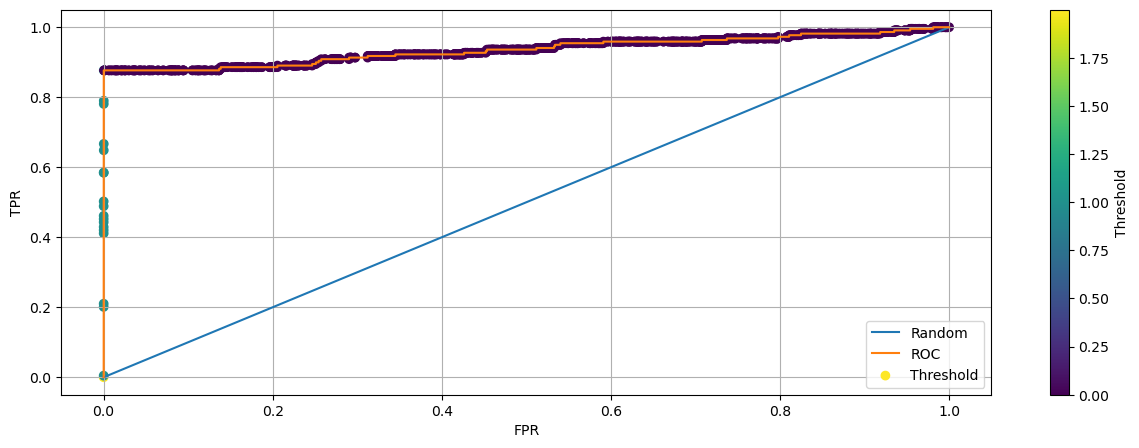

In [486]:
fprs, tprs, thresholds = roc_curve(y_test_list[0], y_pred_proba_list[0])
# precisions, recalss, thresholds = roc_curve(y_test, y_pred_proba)

plt.style.use('default')
plt.figure(figsize = (15, 5))
plt.plot([0, 1], [0, 1], label = 'Random')
plt.plot(fprs, tprs, label = 'ROC')

plt.scatter(fprs, tprs, c=thresholds, cmap='viridis', label='Threshold')
plt.colorbar(label='Threshold')

plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.xlabel('FPR')
plt.show()

## AUROC : x축 FPR, y축 TPR

### Threshold 가 낮다 --> Positive probability 에 대해 후함 --> Positive 로 많이 예측한다
### Threshold 가 높다 --> Positive probability 에 엄격함 --> Negative 로 많이 예측한다
### 기존 : 0.5

## 그래프 해석

### 1. AUROC 가 기존 모델보다 약간 낮다 (Base: 0.94, my: 0.92)
### 2. FPR 이 낮을 때 TPR 이 그만큼 높지가 않다

### Threshold가 엄청 낮으면 True 로 많이 예측됨 --> 그런데도 TPR이 0.8정도 밖에 되지 않음 --> True를 Negative 로 예측한 것이 꽤 있다 (127개의 Positive 에서 25개 정도를 Negative 0.99 로 예측)
### Threshold 엄청 낮으면 False 로 예측되는 양 적음 --> 그런데도 FPR 낮음 --> Negative 에 대해서는 확신가짐

### True 데이터에 대해 기존 Base 모델보다 더 예측을 못해서 AUROC 가 낮은 것으로 해석

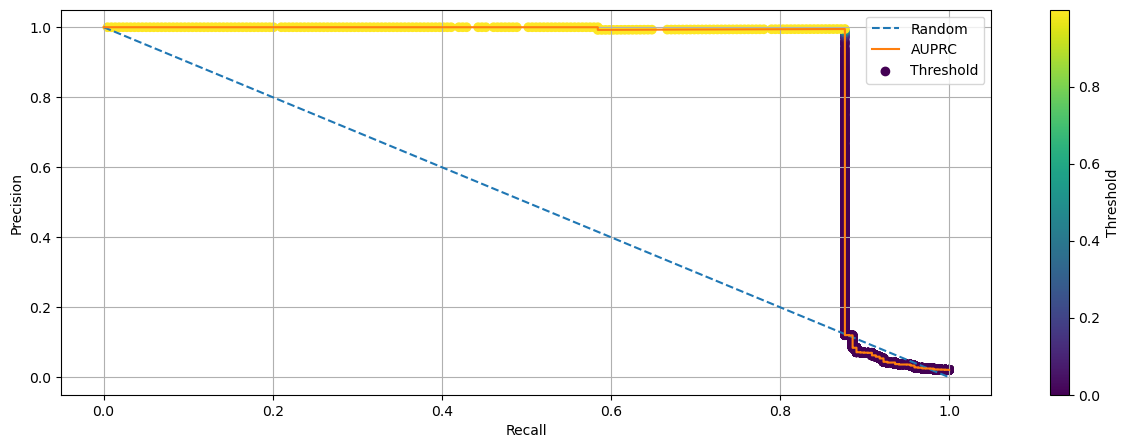

In [488]:
plt.figure(figsize=(15, 5))
plt.plot([0, 1], [1, 0], label='Random', linestyle='--')
plt.plot(recall, precision, label='AUPRC')  # Use 'recall' and 'precision' from above

plt.scatter(recall[:-1], precision[:-1], c=threshold_recall, cmap='viridis', label='Threshold')
plt.colorbar(label='Threshold')

plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.xlabel('Recall')
plt.show()

## AUPR : x축 Recall (TPR), y축 Precision

### Threshold 높으면 Recall 낮고  precision 높음
### Threshold 낮으면 Recall 높고  precision 낮음

## 그래프 해석

### 1. AUPRC 가 기존 모델보다 높다 (Base: 0.63, my: 0.88)
### 2. recall이 높을 때 precision이 그만큼 높지가 않다 (Threshold 낮을 때 )

### 해석: Threshold 가 엄청 낮으면, True 로 예측 많아짐-> precision이 엄청나게 감소하지는 않음 -> Negative 데이터에 대해 확신을 가짐

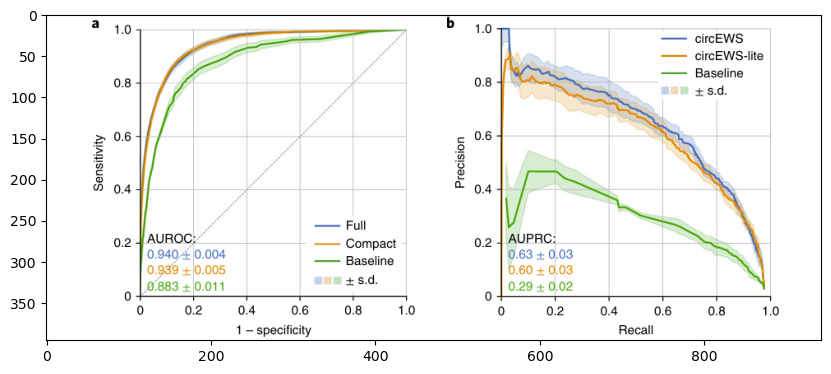

In [497]:
import cv2

plt.figure(figsize = (10, 20))
filename = './Desktop/AU.png'
image = cv2.imread(filename)
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image1)

## 최종 해석

### 기존 모델의 AUPR 은 내 모델의 AUPR보다 낮지만 더 나선형을 가짐 --> 더 많은 Feature 및 데이터를 가지고 있으므로 나의 모델이 0.99 , 0.01로 극단적으로 많이 예측한 것과는 달리 모델이 쉽게 학습하지 않은듯 함 --> 나의 모델은 Feature 도 적고 데이터도 적어서 모델이 쉽게 학습해서 과적합이 일어난 것으로 예상

### 1에 가까운 aupr : 모든 Positive 값은 1, Negative 는 0의 확률분포

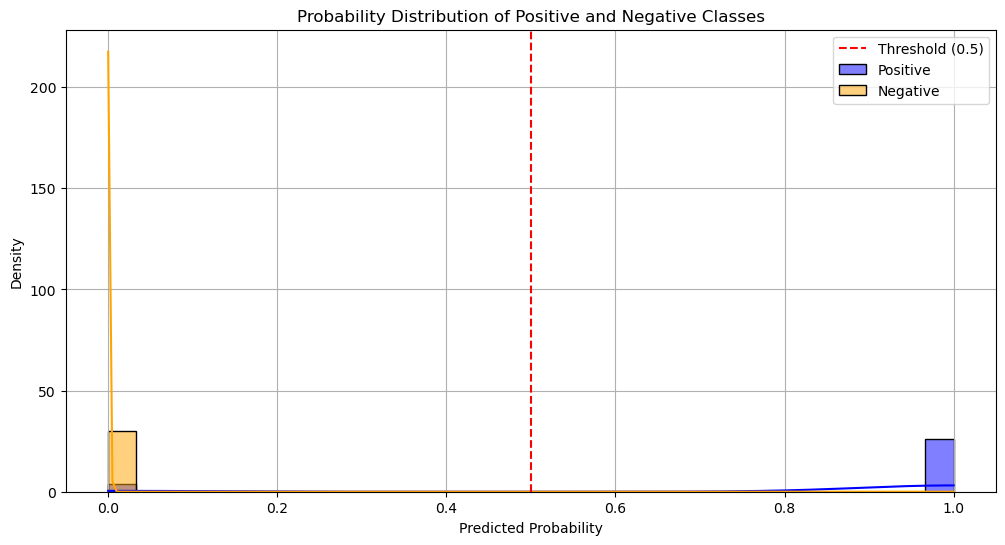

In [489]:
y_pred_proba_positive = y_pred_proba_list[0][y_test_list[0] == 1]
y_pred_proba_negative = y_pred_proba_list[0][y_test_list[0] == 0]

plt.figure(figsize=(12, 6))

sns.histplot(y_pred_proba_positive, color='blue', label='Positive', kde=True, stat="density", bins=30, alpha=0.5)
sns.histplot(y_pred_proba_negative, color='orange', label='Negative', kde=True, stat="density", bins=30, alpha=0.5)


plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')  # Threshold 선 그리기
plt.title('Probability Distribution of Positive and Negative Classes')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [467]:
# y_train == True

In [466]:
# print(f'훈련 총 데이터 : {len(y_train)}')
# print(f'총 True 의 개수 : {(y_train == True).sum()}')
# print('-' * 30)
# print(f'테스트 총 데이터 : {len(y_test)}')
# print(f'총 True 의 개수 : {(y_test == True).sum()}')

In [462]:
from matplotlib.patches import Patch

cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
plt.style.use('fivethirtyeight')

def plot_cv_indices(cv, X, n_splits, lw=10):
    
    fig, ax = plt.subplots()


    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X)):

        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0


        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

        
    yticklabels = list(range(n_splits))
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.1, -.1], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
          ['Testing set', 'Training set'], loc=(1.02, .8))

### Q: 어차피 각 시점의 데이터의 True, False 예측하는 것인데 아래 방법으로 나눌 필요가 있을까? 
### 아래 방법으로 나누게 되면 데이터 불균형 더 심해질 가능성 있을듯

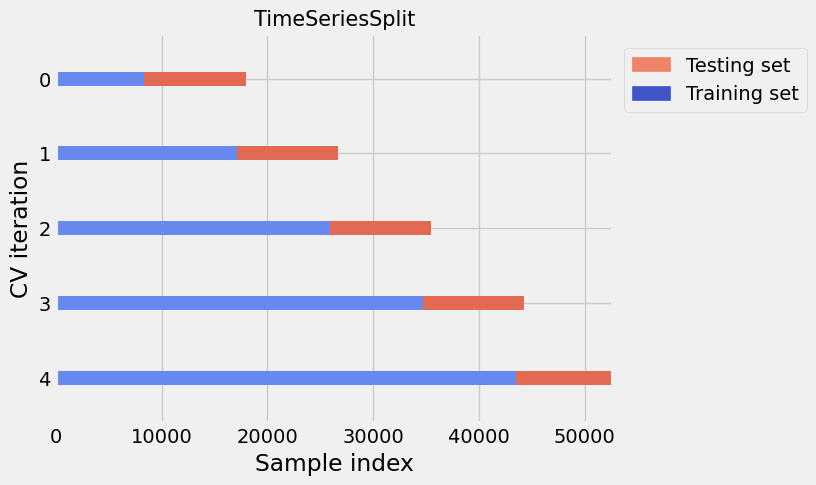

In [463]:
n_split = 5

tscv = TimeSeriesSplit(n_splits= 5)

plot_cv_indices(tscv, train_index, n_splits= 5)

In [424]:
# clf = lgb.LGBMClassifier(n_estimators = 4000)
# clf.fit(X_train, y_train, eval_metric = 'binary')

LGBMClassifier(n_estimators=4000)

In [425]:
# from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# # AUROC
# auroc = roc_auc_score(y_test, y_pred_proba)

# # AUPR
# precision, recall, threshold_recall = precision_recall_curve(y_test, y_pred_proba)
# aupr = auc(recall, precision)


In [428]:
import seaborn as sns
import matplotlib.pyplot as plt

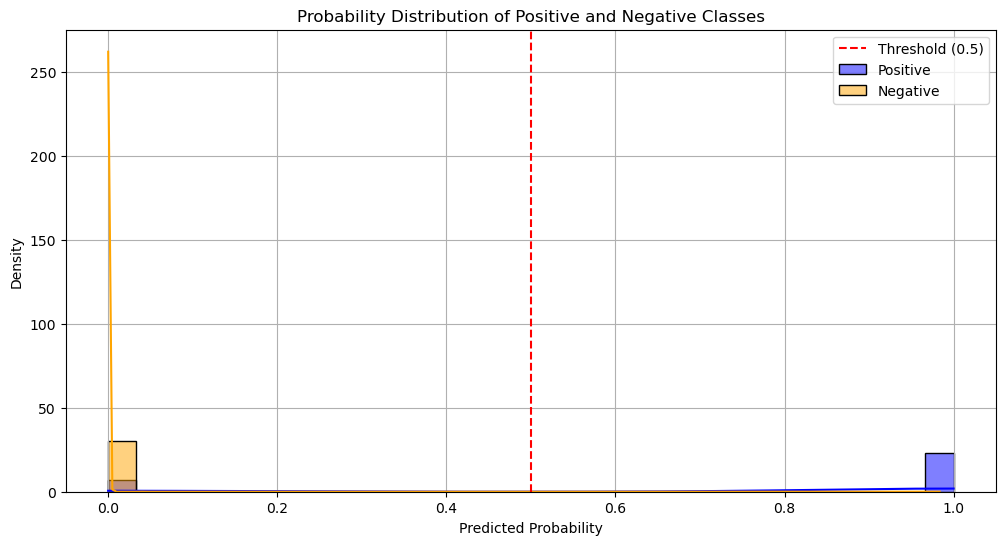

In [429]:
# y_pred_proba_positive = y_pred_proba[y_test == 1]
# y_pred_proba_negative = y_pred_proba[y_test == 0]

# plt.figure(figsize=(12, 6))

# sns.histplot(y_pred_proba_positive, color='blue', label='Positive', kde=True, stat="density", bins=30, alpha=0.5)
# sns.histplot(y_pred_proba_negative, color='orange', label='Negative', kde=True, stat="density", bins=30, alpha=0.5)


# plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold (0.5)')  # Threshold 선 그리기
# plt.title('Probability Distribution of Positive and Negative Classes')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Density')
# plt.legend()
# plt.grid()
# plt.show()

In [433]:
# y_pred = clf.predict(X_test)

# false_positives = y_pred_proba[(y_test == 0) & (y_pred == 1)]  
# false_negatives = y_pred_proba[(y_test == 1) & (y_pred == 0)] 
# print(len(false_positives))
# print(len(false_negatives))

1
30


In [434]:
# print((y_test == True).sum())
# print(len(y_test))

127
10525


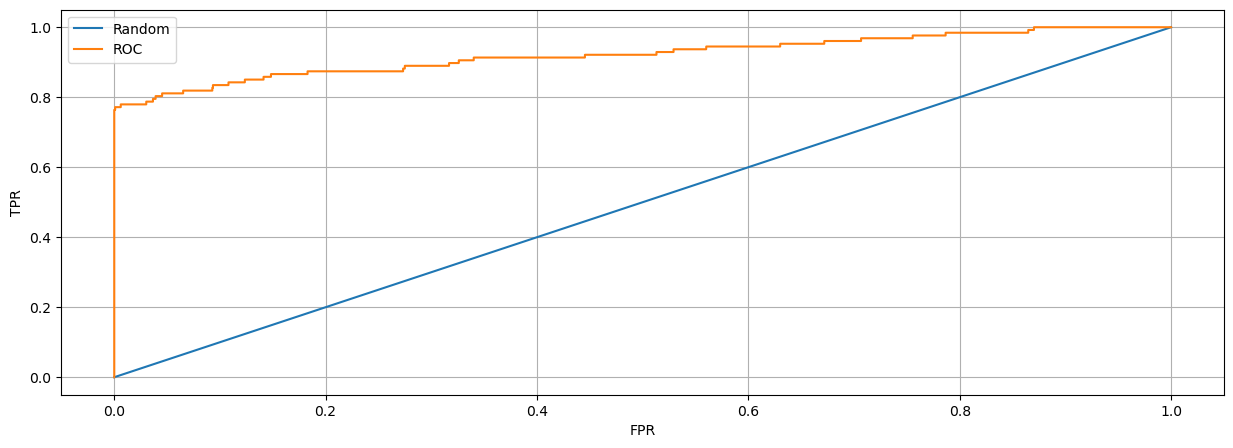

In [435]:
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# y_pred_proba = clf.predict_proba(X_test)[:, 1]

# fprs, tprs, thresholds = roc_curve(y_test, y_pred_proba)
# # precisions, recalss, thresholds = roc_curve(y_test, y_pred_proba)


# plt.figure(figsize = (15, 5))
# plt.plot([0, 1], [0, 1], label = 'Random')
# plt.plot(fprs, tprs, label = 'ROC')
# plt.ylabel('TPR')
# plt.legend()
# plt.grid()
# plt.xlabel('FPR')
# plt.show()

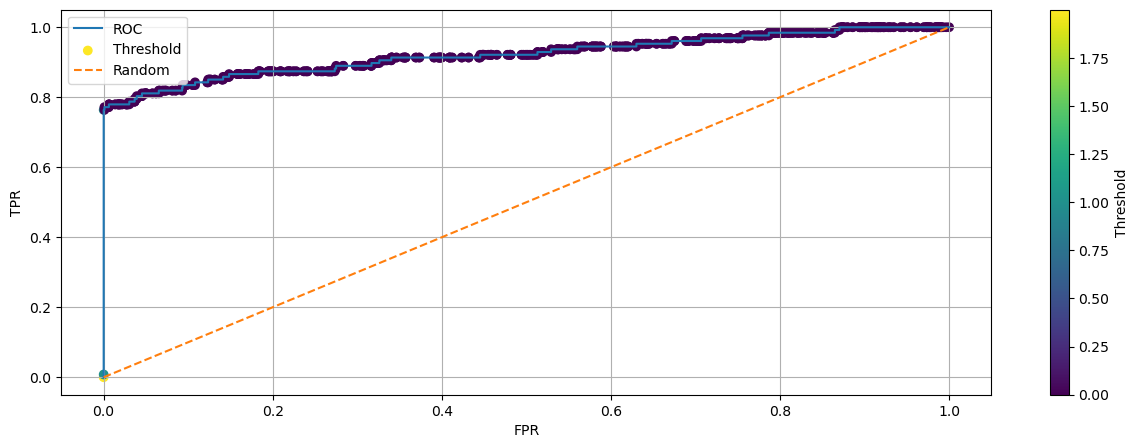

In [436]:
# plt.figure(figsize=(15, 5))

# # ROC curve 그리기
# plt.plot(fprs, tprs, label='ROC')

# # Scatter plot으로 threshold를 시각화 (threshold 값을 그대로 사용)
# plt.scatter(fprs, tprs, c=thresholds, cmap='viridis', label='Threshold')

# # Colorbar 추가
# plt.colorbar(label='Threshold')

# # Diagonal line 그리기
# plt.plot([0, 1], [0, 1], linestyle='--', label='Random')

# # Labels, Legend, and Grid
# plt.ylabel('TPR')
# plt.xlabel('FPR')
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
## AUROC : x축 FPR, y축 TPR

### Threshold 가 낮다 --> Positive probability 에 대해 후함 --> Positive 로 많이 예측한다
### Threshold 가 높다 --> Positive probability 에 엄격함 --> Negative 로 많이 예측한다
### 기존 : 0.5

In [ ]:
## AUROC : x축 FPR, y축 TPR

### Threshold 가 낮다 --> Positive probability 에 대해 후함 --> Positive 로 많이 예측한다
### Threshold 가 높다 --> Positive probability 에 엄격함 --> Negative 로 많이 예측한다
### 기존 : 0.5

## 그래프 해석

### 1. AUROC 가 기존 모델보다 약간 낮다 (Base: 0.94, my: 0.92)
### 2. FPR 이 낮을 때 TPR 이 그만큼 높지가 않다

### Threshold가 엄청 낮으면 True 로 많이 예측됨 --> 그런데도 TPR이 0.8정도 밖에 되지 않음 --> True를 Negative 로 예측한 것이 꽤 있다 (127개의 Positive 에서 25개 정도를 Negative 0.99 로 예측)
### Threshold 엄청 낮으면 False 로 예측되는 양 적음 --> 그런데도 FPR 낮음 --> Negative 에 대해서는 확신가짐

### True 데이터에 대해 기존 Base 모델보다 더 예측을 못해서 AUROC 가 낮은 것으로 해석

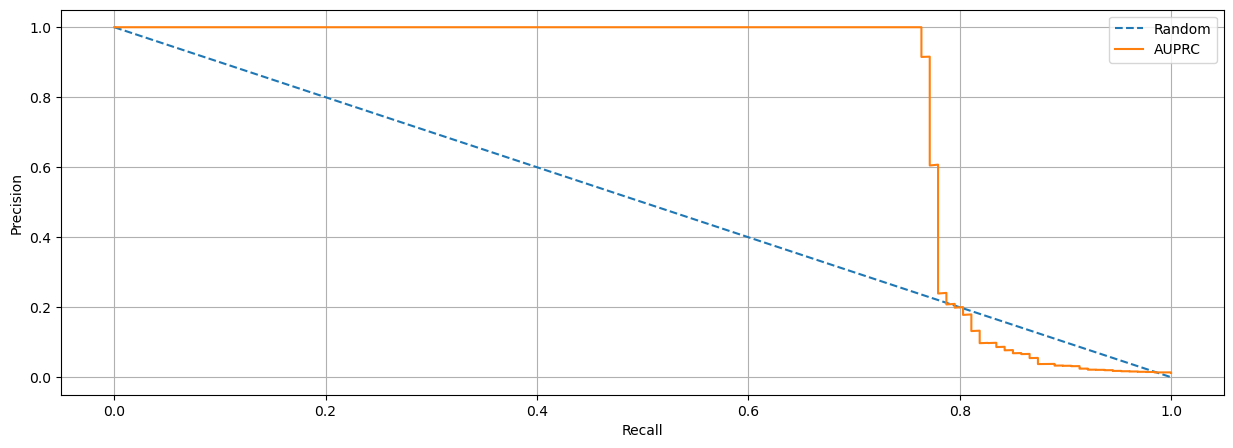

In [437]:
# plt.figure(figsize=(15, 5))
# plt.plot([0, 1], [1, 0], label='Random', linestyle='--')
# plt.plot(recall, precision, label='AUPRC')  # Use 'recall' and 'precision' from above
# plt.ylabel('Precision')
# plt.legend()
# plt.grid()
# plt.xlabel('Recall')
# plt.show()

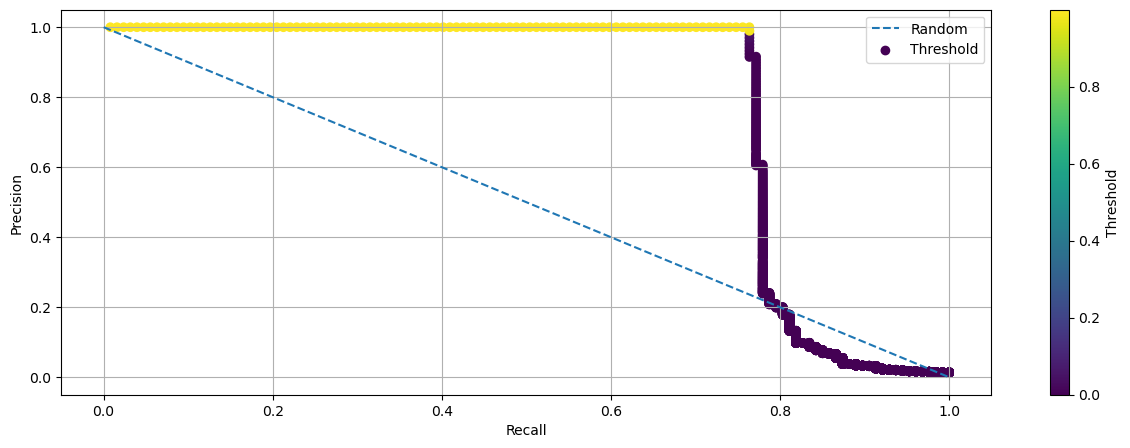

In [438]:
# plt.figure(figsize=(15, 5))

# # AUPRC 그리기 (recall vs precision)
# plt.plot([0, 1], [1, 0], label='Random', linestyle='--')

# # Scatter plot으로 threshold를 시각화 (threshold 값을 그대로 사용)
# plt.scatter(recall[:-1], precision[:-1], c=threshold_recall, cmap='viridis', label='Threshold')

# # Colorbar 추가
# plt.colorbar(label='Threshold')

# # Labels, Legend, and Grid 설정
# plt.ylabel('Precision')
# plt.xlabel('Recall')
# plt.legend()
# plt.grid()

# plt.show()

In [ ]:
## AUPR : x축 Recall (TPR), y축 Precision

### Threshold 높으면 Recall 낮고  precision 높음
### Threshold 낮으면 Recall 높고  precision 낮음

In [ ]:
## AUPR : x축 Recall (TPR), y축 Precision

### Threshold 높으면 Recall 낮고  precision 높음
### Threshold 낮으면 Recall 높고  precision 낮음

## 그래프 해석

### 1. AUPRC 가 기존 모델보다 높다
### 2. recall이 높을 때 precision이 그만큼 높지가 않다 (Threshold 낮을 때 )

### 해석: Threshold 가 엄청 낮으면, True 로 예측 많아짐-> precision이 엄청나게 감소하지는 않음 -> Negative 데이터에 대해 확신을 가짐

In [439]:
# import cv2


In [440]:
# import cv2


# filename = './Desktop/AUPR.png'
# image = cv2.imread(filename)
# image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plt.imshow(image1)

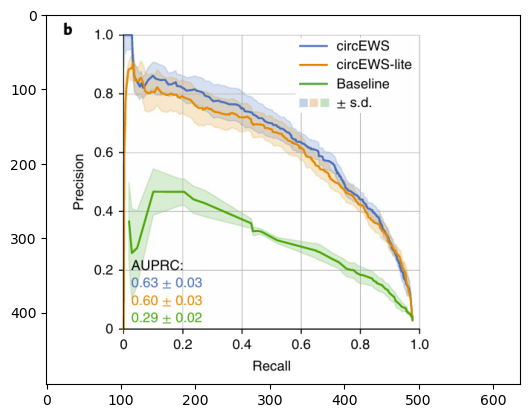

In [441]:
# plt.imshow(image1)

## 최종 해석

### 기존 모델의 AUPR 은 내 모델의 AUPR보다 낮지만 더 나선형을 가짐 --> 더 많은 Feature 및 데이터를 가지고 있으므로 나의 모델이 0.99로 극단적으로 많이 예측한 것과는 달리 모델이 쉽게 학습하지 않은듯 함 --> 나의 모델은 Feature 도 적고 데이터도 적어서 모델이 쉽게 학습해서 과적합이 일어난 것으로 예상

### 1에 가까운 aupr : 모든 Positive 값은 1, Negative 는 0의 확률분포

In [ ]:
preds = clf.predict(X_test)

In [ ]:
print(f'AUROC : {auroc}')
print(f'AUPR : {aupr}')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

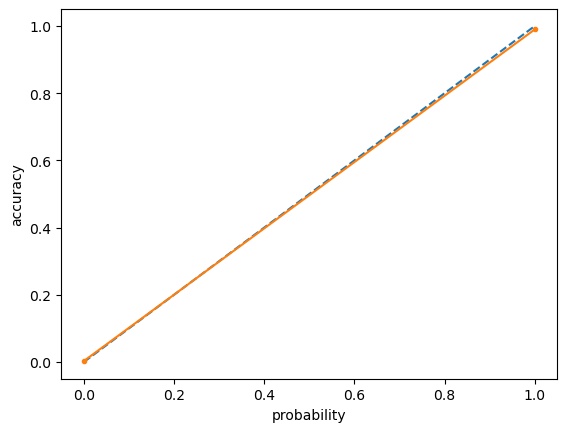

In [583]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

gb_y, gb_x = calibration_curve(y_test, preds, n_bins=10)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
plt.plot(gb_x, gb_y, marker='.')
plt.xlabel('probability')
plt.ylabel('accuracy')
plt.show()

In [573]:
accuracy = accuracy_score(y_test, preds)

In [574]:
accuracy

0.9970546318289786

In [575]:
aupr 

0.7905566040353785

## 기존의 모델과 하이퍼 파라미터 맞춘 모델

In [457]:
clf = lgb.LGBMModel(n_estimators = 5000,  num_leaves=32,  colsample_bytree=0.33, learning_rate=0.05)
clf.fit(X_train, y_train, eval_metric = 'binary')

ValueError: Unknown LGBMModel type.

In [456]:
clf = lgb.LGBMClassifier(n_estimators = 5000,  num_leaves=32,  colsample_bytree=0.33, learning_rate=0.05)
clf.fit(X_train, y_train, eval_metric = 'binary')

LGBMClassifier(colsample_bytree=0.33, learning_rate=0.05, n_estimators=5000,
               num_leaves=32)

In [451]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# AUROC
auroc = roc_auc_score(y_test, y_pred_proba)

# AUPR
precision, recall, threshold_recall = precision_recall_curve(y_test, y_pred_proba)
aupr = auc(recall, precision)

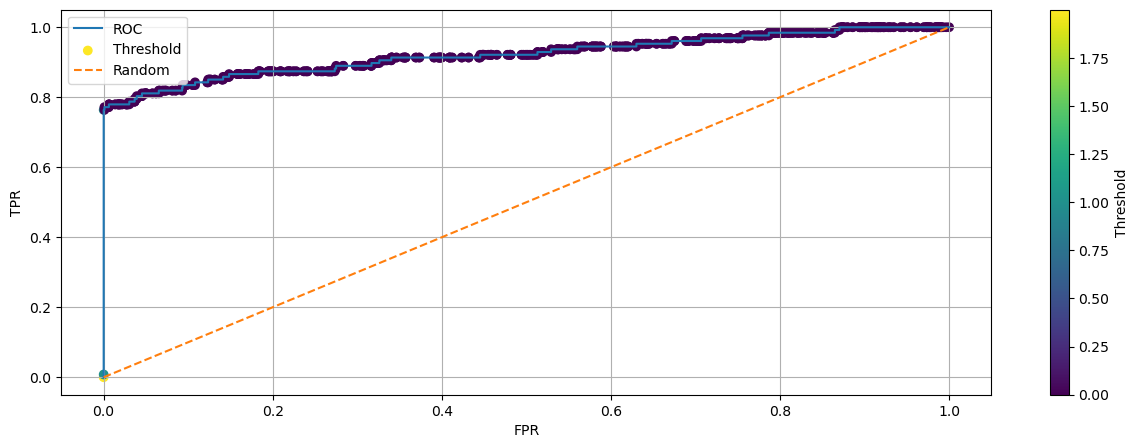

In [452]:
plt.figure(figsize=(15, 5))

# ROC curve 그리기
plt.plot(fprs, tprs, label='ROC')

# Scatter plot으로 threshold를 시각화 (threshold 값을 그대로 사용)
plt.scatter(fprs, tprs, c=thresholds, cmap='viridis', label='Threshold')

# Colorbar 추가
plt.colorbar(label='Threshold')

# Diagonal line 그리기
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')

# Labels, Legend, and Grid
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.grid()
plt.show()

In [453]:
print(auroc)
print(aupr)

0.9033403607295769
0.7868508224126356


## 모델 느낀점

### imputation 방식을 어떻게 수행하느냐에 따라 성능 많이 다름
#### 기존: 0.99 -> 데이터 과적합 
#### 수정: 0.92  

In [698]:
# selected_merged = df5
# selected_merged

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE
0,19,164328.0,2411-05-19T00:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
1,20,164328.0,2411-05-19T01:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
2,17,164328.0,2411-05-19T02:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
3,23,164328.0,2411-05-19T03:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
4,17,164328.0,2411-05-19T04:00:00,1.090004e+10,2411-05-18T10:51:00,70.0,RR,61
...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,2289-08-22T15:47:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849602,100.0,166465.0,2289-08-22T15:48:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849603,100.0,166465.0,2289-08-22T15:50:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63
849604,100.0,166465.0,2289-08-22T16:00:00,1.090008e+10,2289-08-22T13:35:00,NaN,FIO2,63


In [699]:
# selected_merged['CHARTTIME'] = selected_merged['CHARTTIME'].str.replace('T', ' ')
# selected_merged['INTIME'] = selected_merged['INTIME'].str.replace('T', ' ')

# selected_merged['CHARTTIME'] = selected_merged['CHARTTIME'].apply(lambda x: x[5:])
# selected_merged['INTIME'] = selected_merged['INTIME'].apply(lambda x: x[5:])

# selected_merged['CHARTTIME'] = pd.to_datetime(selected_merged['CHARTTIME'], format = '%m-%d %H:%M:%S')
# selected_merged['INTIME'] = pd.to_datetime(selected_merged['INTIME'], format = '%m-%d %H:%M:%S')


In [714]:
# selected_merged2 = selected_merged 

In [715]:
# selected_merged2['Time_since_ICU_admission'] = selected_merged2['CHARTTIME'] - selected_merged2['INTIME']
# selected_merged2[['start_days', 'dummy','start_hours']] = selected_merged2['Time_since_ICU_admission'].astype('str').str.split(' ', -1, expand=True)
# selected_merged2[['start_hours','min','sec']] = selected_merged2['start_hours'].str.split(':', -1, expand=True)
# resample_mode ='5min_intervals'

# if resample_mode == '5min_intervals':
#     selected_merged2['start_time'] = pd.to_numeric(selected_merged2['start_days'])*24*60 + pd.to_numeric(selected_merged2['start_hours'])*60 + pd.to_numeric(selected_merged2['min'])
#     selected_merged2['start_time'] = (selected_merged2['start_time'] // 5) * 5
# if resample_mode == '10min_intervals':
#     selected_merged2['start_time'] = pd.to_numeric(selected_merged2['start_days'])*24*60 + pd.to_numeric(selected_merged2['start_hours'])*60 + (selected_merged2['min'].astype('int')//10)*10
# elif resample_mode == 'hourly_intervals':
#     selected_merged['start_time'] = pd.to_numeric(selected_merged['start_days'])*24+pd.to_numeric(selected_merged['start_hours'])


,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission,start_days,dummy,start_hours,min,sec,start_time
0,19,164328.0,1900-05-19 00:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 13:09:00,0,days,13:09:00,09,00,785
1,20,164328.0,1900-05-19 01:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 14:09:00,0,days,14:09:00,09,00,845
2,17,164328.0,1900-05-19 02:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 15:09:00,0,days,15:09:00,09,00,905
3,23,164328.0,1900-05-19 03:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 16:09:00,0,days,16:09:00,09,00,965
4,17,164328.0,1900-05-19 04:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 17:09:00,0,days,17:09:00,09,00,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,1900-08-22 15:47:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:12:00,0,days,02:12:00,12,00,130
849602,100.0,166465.0,1900-08-22 15:48:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:13:00,0,days,02:13:00,13,00,130
849603,100.0,166465.0,1900-08-22 15:50:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:15:00,0,days,02:15:00,15,00,135
849604,100.0,166465.0,1900-08-22 16:00:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:25:00,0,days,02:25:00,25,00,145


In [716]:
# selected_merged2[['start_hours','min','sec']] = selected_merged2['start_hours'].str.split(':', -1, expand=True)
# selected_merged2

,VALUE,STAY_ID,CHARTTIME,SUBJECT_ID,INTIME,PATIENTWEIGHT,LABEL,ANCHOR_AGE,Time_since_ICU_admission,start_days,dummy,start_hours,min,sec,start_time
0,19,164328.0,1900-05-19 00:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 13:09:00,0,days,13,09,00,785
1,20,164328.0,1900-05-19 01:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 14:09:00,0,days,14,09,00,845
2,17,164328.0,1900-05-19 02:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 15:09:00,0,days,15,09,00,905
3,23,164328.0,1900-05-19 03:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 16:09:00,0,days,16,09,00,965
4,17,164328.0,1900-05-19 04:00:00,1.090004e+10,1900-05-18 10:51:00,70.0,RR,61,0 days 17:09:00,0,days,17,09,00,1025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849601,100.0,166465.0,1900-08-22 15:47:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:12:00,0,days,02,12,00,130
849602,100.0,166465.0,1900-08-22 15:48:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:13:00,0,days,02,13,00,130
849603,100.0,166465.0,1900-08-22 15:50:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:15:00,0,days,02,15,00,135
849604,100.0,166465.0,1900-08-22 16:00:00,1.090008e+10,1900-08-22 13:35:00,NaN,FIO2,63,0 days 02:25:00,0,days,02,25,00,145


In [717]:
# resample_mode ='5min_intervals'

# if resample_mode == '5min_intervals':
#     selected_merged2['start_time'] = pd.to_numeric(selected_merged2['start_days'])*24*60 + pd.to_numeric(selected_merged2['start_hours'])*60 + pd.to_numeric(selected_merged2['min'])
#     selected_merged2['start_time'] = (selected_merged2['start_time'] // 5) * 5
# if resample_mode == '10min_intervals':
#     selected_merged2['start_time'] = pd.to_numeric(selected_merged2['start_days'])*24*60 + pd.to_numeric(selected_merged2['start_hours'])*60 + (selected_merged2['min'].astype('int')//10)*10
# elif resample_mode == 'hourly_intervals':
#     selected_merged['start_time'] = pd.to_numeric(selected_merged['start_days'])*24+pd.to_numeric(selected_merged['start_hours'])

In [516]:
# selected_merged['Time_since_ICU_admission'] = selected_merged['CHARTTIME'] - selected_merged['INTIME']


# selected_merged[['start_days', 'dummy','start_hours']] = selected_merged['Time_since_ICU_admission'].astype('str').str.split(' ', -1, expand=True)
# selected_merged[['start_hours','min','sec']] = selected_merged['start_hours'].str.split(':', -1, expand=True)

# resample_mode ='10min_intervals'

# if resample_mode == '10min_intervals':
#     selected_merged['start_time'] = pd.to_numeric(selected_merged['start_days'])*24*60 + pd.to_numeric(selected_merged['start_hours'])*60 + (selected_merged['min'].astype('int')//10)*10
# elif resample_mode == 'hourly_intervals':
#     selected_merged['start_time'] = pd.to_numeric(selected_merged['start_days'])*24+pd.to_numeric(selected_merged['start_hours'])

In [406]:
# selected_merged2[pd.to_numeric(selected_merged2['min']) <= 30 & pd.to_numeric(selected_merged2['start_hours']) < 1]

In [ ]:
base_df[base_df['LABEL'].str.contains('T central', case=False, na=False)].head(50) 
### 이러한 경우가 있을 수 있으므로 자동화 하면 잘못된 수치 얻을 수 있음